# AIM OF CASE STUDY:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Check what is necessary here and delete the rest:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.width', 1000)
#pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

##  Task 1: Reading the data and Understanding the "Structure" of the Data->

#### Link to use relative path to input data set based on your directory structure:
https://stackoverflow.com/questions/50119792/python-import-excel-file-using-relative-path

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
df_ad = pd.read_csv(r'./../data/raw/application_data.csv')

In [4]:
# Check the number of rows and columns in the dataframe
df_ad.shape

(307511, 122)

In [5]:
# Check the column-wise info of the dataframe
df_ad.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
print(df_ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [7]:
df_ad.dtypes

SK_ID_CURR                      int64  
TARGET                          int64  
NAME_CONTRACT_TYPE              object 
CODE_GENDER                     object 
FLAG_OWN_CAR                    object 
FLAG_OWN_REALTY                 object 
CNT_CHILDREN                    int64  
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object 
NAME_INCOME_TYPE                object 
NAME_EDUCATION_TYPE             object 
NAME_FAMILY_STATUS              object 
NAME_HOUSING_TYPE               object 
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64  
DAYS_EMPLOYED                   int64  
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64  
OWN_CAR_AGE                     float64
FLAG_MOBIL                      int64  
FLAG_EMP_PHONE                  int64  
FLAG_WORK_PHONE                 int64  


In [8]:
df_ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
print(df_ad.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [10]:
df_ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                   -9461       -637           -3648.0              
1  0.003541                   -16765      -1188          -1186.0              
2  0.010032                   -19046      -225           -4260.0              
3  0.008019                   -19005      -3039          -9833.0              
4  0.028663                   -19932      -3038          -4311.0              

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0 -2120            NaN           1           1               0                 
1 -291             NaN           1           1               0                 
2 -2531             26.0         1           1               1                 
3 -2437            NaN           1           1               0                 
4 -3458            NaN           1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  1                 1           0           Laborers        1.0               
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               
3  1                 0           0           Laborers        2.0               
4  1                 0           0           Core staff      1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                     

In [11]:
df_ad.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506  456251      0       Cash loans         M           N             
307507  456252      0       Cash loans         F           N             
307508  456253      0       Cash loans         F           N             
307509  456254      1       Cash loans         F           N             
307510  456255      0       Cash loans         F           N             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506  N               0             157500.0          254700.0     
307507  Y               0             72000.0           269550.0     
307508  Y               0             153000.0          677664.0     
307509  Y               0             171000.0          370107.0     
307510  N               0             157500.0          675000.0     

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506  27558.0      225000.0         Unaccompanied   Working                
307507  12001.5      225000.0         Unaccompanied   Pensioner              
307508  29979.0      585000.0         Unaccompanied   Working                
307509  20205.0      319500.0         Unaccompanied   Commercial associate   
307510  49117.5      675000.0         Unaccompanied   Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special  Separated          With parents        
307507  Secondary / secondary special  Widow              House / apartment   
307508  Higher education               Separated          House / apartment   
307509  Secondary / secondary special  Married            House / apartment   
307510  Higher education               Married            House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506  0.032561                   -9327       -236             
307507  0.025164                   -20775       365243          
307508  0.005002                   -14966      -7921            
307509  0.005313                   -11961      -4786            
307510  0.046220                   -16856      -1262            

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506 -8456.0            -1982            NaN           1            
307507 -4388.0            -4090            NaN           1            
307508 -6737.0            -5150            NaN           1            
307509 -2562.0            -931             NaN           1            
307510 -5128.0            -410             NaN           1            

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506  1               0                1                 0            
307507  0               0                1                 1            
307508  1               0                1                 0            
307509  1               0                1                 0            
307510  1               1                1                 1            

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506  0           Sales staff     1.0              1                      
307507  0           NaN             1.0              2                      
307508  1           Managers        1.0              3                      
307509  0           Laborers        2.0              2                      
307510  0           Laborers        2.0              1                      

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506  1                            THURSDAY                    
307507  2                            MONDAY                      
307508  3                            THURSDAY                    
307509  2                            WEDNESDAY                   
307510  1                            THURSDAY                    

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506  15        

In [12]:
# Check the summary for the numeric columns
df_ad.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000  3.075110e+05       
mean   278180.518577  0.080729       0.417052       1.687979e+05       
std    102790.175348  0.272419       0.722121       2.371231e+05       
min    100002.000000  0.000000       0.000000       2.565000e+04       
25%    189145.500000  0.000000       0.000000       1.125000e+05       
50%    278202.000000  0.000000       0.000000       1.471500e+05       
75%    367142.500000  0.000000       1.000000       2.025000e+05       
max    456255.000000  1.000000       19.000000      1.170000e+08       

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000  3.072330e+05      
mean   5.990260e+05  27108.573909   5.383962e+05      
std    4.024908e+05  14493.737315   3.694465e+05      
min    4.500000e+04  1615.500000    4.050000e+04      
25%    2.700000e+05  16524.000000   2.385000e+05      
50%    5.135310e+05  24903.000000   4.500000e+05      
75%    8.086500e+05  34596.000000   6.795000e+05      
max    4.050000e+06  258025.500000  4.050000e+06      

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count  307511.000000               307511.000000  307511.000000   
mean   0.020868                   -16036.995067   63815.045904    
std    0.013831                    4363.988632    141275.766519   
min    0.000290                   -25229.000000  -17912.000000    
25%    0.010006                   -19682.000000  -2760.000000     
50%    0.018850                   -15750.000000  -1213.000000     
75%    0.028663                   -12413.000000  -289.000000      
max    0.072508                   -7489.000000    365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count  307511.000000      307511.000000    104582.000000  307511.000000   
mean  -4986.120328       -2994.202373      12.061091      0.999997        
std    3522.886321        1509.450419      11.944812      0.001803        
min   -24672.000000      -7197.000000      0.000000       0.000000        
25%   -7479.500000       -4299.000000      5.000000       1.000000        
50%   -4504.000000       -3254.000000      9.000000       1.000000        
75%   -2010.000000       -1720.000000      15.000000      1.000000        
max    0.000000           0.000000         91.000000      1.000000        

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean   0.819889        0.199368         0.998133          0.281066        
std    0.384280        0.399526         0.043164          0.449521        
min    0.000000        0.000000         0.000000          0.000000        
25%    1.000000        0.000000         1.000000          0.000000        
50%    1.000000        0.000000         1.000000          0.000000        
75%    1.000000        0.000000         1.000000          1.000000        
max    1.000000        1.000000         1.000000          1.000000        

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000  307509.000000    307511.000000          
mean   0.056720       2.152665         2.052463               
std    0.231307       0.910682         0.509034               
min    0.000000       1.000000         1.000000               
25%    0.000000       2.000000         2.000000               
50%    0.000000       2.000000         2.000000               
75%    0.000000       3.000000         2.000000               
max    1.000000       20.000000        3.000000               

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count  307511.000000                307511.000000             
mean   2.031521                     12.063419                 
std    0.502737                     3.265832                  
min    1.000000                     0.000000                  
25%    2.000000           

#### INFERENCE FOR TASK 1: Structure of Data: 
The Dataset has 307511 rows, 122 columns. Out of this 122 columns 65 columns have float datatypes, 41 columns have Integer Datatype and 16 columns have Object datatype. In our further analysis we will:
1. Treat Missing Values and Report Imputation Methods
2. Decipher whether the datatypes for associated columns are statistically and meaningully correct or not, If Not we treat them by getting them into desired datatype before analysis.

This data has a column named "TARGET" which has values either 1 or 0, 1 stands for the customer who has defaulted on the loan and 0 stands for customer who has not defaulted. Will be further progressing with our "Data Analysis" based on this target variable with univariate and bivariate analysis.

## Task 2: Missing Value Treatment and Reporting Imputation Methods

In [13]:
print("------------No of Nulls in df_ad Attribute Data-------------------------")
print(df_ad.isnull().sum())

------------No of Nulls in df_ad Attribute Data-------------------------
SK_ID_CURR                      0     
TARGET                          0     
NAME_CONTRACT_TYPE              0     
CODE_GENDER                     0     
FLAG_OWN_CAR                    0     
FLAG_OWN_REALTY                 0     
CNT_CHILDREN                    0     
AMT_INCOME_TOTAL                0     
AMT_CREDIT                      0     
AMT_ANNUITY                     12    
AMT_GOODS_PRICE                 278   
NAME_TYPE_SUITE                 1292  
NAME_INCOME_TYPE                0     
NAME_EDUCATION_TYPE             0     
NAME_FAMILY_STATUS              0     
NAME_HOUSING_TYPE               0     
REGION_POPULATION_RELATIVE      0     
DAYS_BIRTH                      0     
DAYS_EMPLOYED                   0     
DAYS_REGISTRATION               0     
DAYS_ID_PUBLISH                 0     
OWN_CAR_AGE                     202929
FLAG_MOBIL                      0     
FLAG_EMP_PHONE                

In [14]:
# Print the null percentage of each column of dataframe 'df_ad'.
percent_missing = df_ad.isnull().sum() * 100 / len(df_ad)
missing_value_df = pd.DataFrame({'column_name': df_ad.columns, 'No of Nulls':df_ad.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  No of Nulls  \
COMMONAREA_MEDI               COMMONAREA_MEDI               214865        
COMMONAREA_AVG                COMMONAREA_AVG                214865        
COMMONAREA_MODE               COMMONAREA_MODE               214865        
NONLIVINGAPARTMENTS_MODE      NONLIVINGAPARTMENTS_MODE      213514        
NONLIVINGAPARTMENTS_AVG       NONLIVINGAPARTMENTS_AVG       213514        
NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_MEDI      213514        
FONDKAPREMONT_MODE            FONDKAPREMONT_MODE            210295        
LIVINGAPARTMENTS_MODE         LIVINGAPARTMENTS_MODE         210199        
LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_AVG          210199        
LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_MEDI         210199        
FLOORSMIN_AVG                 FLOORSMIN_AVG                 208642        
FLOORSMIN_MODE                FLOORSMIN_MODE                208642        
FLOORSMIN_MEDI                FLOORSMIN_MEDI                208642        
YEARS_BUILD_MEDI              YEARS_BUILD_MEDI              204488        
YEARS_BUILD_MODE              YEARS_BUILD_MODE              204488        
YEARS_BUILD_AVG               YEARS_BUILD_AVG               204488        
OWN_CAR_AGE                   OWN_CAR_AGE                   202929        
LANDAREA_MEDI                 LANDAREA_MEDI                 182590        
LANDAREA_MODE                 LANDAREA_MODE                 182590        
LANDAREA_AVG                  LANDAREA_AVG                  182590        
BASEMENTAREA_MEDI             BASEMENTAREA_MEDI             179943        
BASEMENTAREA_AVG              BASEMENTAREA_AVG              179943        
BASEMENTAREA_MODE             BASEMENTAREA_MODE             179943        
EXT_SOURCE_1                  EXT_SOURCE_1                  173378        
NONLIVINGAREA_MODE            NONLIVINGAREA_MODE            169682        
NONLIVINGAREA_AVG             NONLIVINGAREA_AVG             169682        
NONLIVINGAREA_MEDI            NONLIVINGAREA_MEDI            169682        
ELEVATORS_MEDI                ELEVATORS_MEDI                163891        
ELEVATORS_AVG                 ELEVATORS_AVG                 163891        
ELEVATORS_MODE                ELEVATORS_MODE                163891        
WALLSMATERIAL_MODE            WALLSMATERIAL_MODE            156341        
APARTMENTS_MEDI               APARTMENTS_MEDI               156061        
APARTMENTS_AVG                APARTMENTS_AVG                156061        
APARTMENTS_MODE               APARTMENTS_MODE               156061        
ENTRANCES_MEDI                ENTRANCES_MEDI                154828        
ENTRANCES_AVG                 ENTRANCES_AVG                 154828        
ENTRANCES_MODE                ENTRANCES_MODE                154828        
LIVINGAREA_AVG                LIVINGAREA_AVG                154350        
LIVINGAREA_MODE               LIVINGAREA_MODE               154350        
LIVINGAREA_MEDI               LIVINGAREA_MEDI               154350        
HOUSETYPE_MODE                HOUSETYPE_MODE                154297        
FLOORSMAX_MODE                FLOORSMAX_MODE                153020        
FLOORSMAX_MEDI                FLOORSMAX_MEDI                153020        
FLOORSMAX_AVG                 FLOORSMAX_AVG                 153020        
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE  150007        
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI  150007        
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_AVG   150007        
TOTALAREA_MODE                TOTALAREA_MODE                148431        
EMERGENCYSTATE_MODE           EMERGENCYSTATE_MODE           145755        
OCCUPATION_TYPE               OCCUPATION_TYPE               96391         
EXT_SOURCE_3                  EXT_SOURCE_3                  60965         
AMT_REQ_CREDIT_BUREAU_HOUR    AMT_REQ_CREDIT_BUREAU_HOUR    41519         
AMT_REQ_CREDIT_BUREAU_DAY     AMT_REQ_CREDIT_BUREAU_DAY     41519       

In [15]:
missing_value_df.shape

(122, 3)

In [16]:
 #Obtain records(dataframe) columns which have greater than or equal to 45% null values and drop them for further analysis.
missing_value_45_df=missing_value_df[missing_value_df.percent_missing>=45]
missing_value_45_df

column_name  No of Nulls  \
COMMONAREA_MEDI               COMMONAREA_MEDI               214865        
COMMONAREA_AVG                COMMONAREA_AVG                214865        
COMMONAREA_MODE               COMMONAREA_MODE               214865        
NONLIVINGAPARTMENTS_MODE      NONLIVINGAPARTMENTS_MODE      213514        
NONLIVINGAPARTMENTS_AVG       NONLIVINGAPARTMENTS_AVG       213514        
NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_MEDI      213514        
FONDKAPREMONT_MODE            FONDKAPREMONT_MODE            210295        
LIVINGAPARTMENTS_MODE         LIVINGAPARTMENTS_MODE         210199        
LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_AVG          210199        
LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_MEDI         210199        
FLOORSMIN_AVG                 FLOORSMIN_AVG                 208642        
FLOORSMIN_MODE                FLOORSMIN_MODE                208642        
FLOORSMIN_MEDI                FLOORSMIN_MEDI                208642        
YEARS_BUILD_MEDI              YEARS_BUILD_MEDI              204488        
YEARS_BUILD_MODE              YEARS_BUILD_MODE              204488        
YEARS_BUILD_AVG               YEARS_BUILD_AVG               204488        
OWN_CAR_AGE                   OWN_CAR_AGE                   202929        
LANDAREA_MEDI                 LANDAREA_MEDI                 182590        
LANDAREA_MODE                 LANDAREA_MODE                 182590        
LANDAREA_AVG                  LANDAREA_AVG                  182590        
BASEMENTAREA_MEDI             BASEMENTAREA_MEDI             179943        
BASEMENTAREA_AVG              BASEMENTAREA_AVG              179943        
BASEMENTAREA_MODE             BASEMENTAREA_MODE             179943        
EXT_SOURCE_1                  EXT_SOURCE_1                  173378        
NONLIVINGAREA_MODE            NONLIVINGAREA_MODE            169682        
NONLIVINGAREA_AVG             NONLIVINGAREA_AVG             169682        
NONLIVINGAREA_MEDI            NONLIVINGAREA_MEDI            169682        
ELEVATORS_MEDI                ELEVATORS_MEDI                163891        
ELEVATORS_AVG                 ELEVATORS_AVG                 163891        
ELEVATORS_MODE                ELEVATORS_MODE                163891        
WALLSMATERIAL_MODE            WALLSMATERIAL_MODE            156341        
APARTMENTS_MEDI               APARTMENTS_MEDI               156061        
APARTMENTS_AVG                APARTMENTS_AVG                156061        
APARTMENTS_MODE               APARTMENTS_MODE               156061        
ENTRANCES_MEDI                ENTRANCES_MEDI                154828        
ENTRANCES_AVG                 ENTRANCES_AVG                 154828        
ENTRANCES_MODE                ENTRANCES_MODE                154828        
LIVINGAREA_AVG                LIVINGAREA_AVG                154350        
LIVINGAREA_MODE               LIVINGAREA_MODE               154350        
LIVINGAREA_MEDI               LIVINGAREA_MEDI               154350        
HOUSETYPE_MODE                HOUSETYPE_MODE                154297        
FLOORSMAX_MODE                FLOORSMAX_MODE                153020        
FLOORSMAX_MEDI                FLOORSMAX_MEDI                153020        
FLOORSMAX_AVG                 FLOORSMAX_AVG                 153020        
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE  150007        
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI  150007        
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_AVG   150007        
TOTALAREA_MODE                TOTALAREA_MODE                148431        
EMERGENCYSTATE_MODE           EMERGENCYSTATE_MODE           145755        

                              percent_missing  
COMMONAREA_MEDI               69.872297        
COMMONAREA_AVG                69.872297        
COMMONAREA_MODE               69.872297        
NONLIVINGAPARTMENTS_MODE      69.432963        
NONLIVINGAPARTMENTS_AVG       69.432963        
NONLIVIN

In [17]:
# no of columns to be dropped.
missing_value_45_df.shape

(49, 3)

In [18]:
#No of columns before dropping columns
df_ad.shape

(307511, 122)

In [19]:
# Drop the columns in "Application Data" dataframe which have more than 50% of missing values. That is here drop the 41 columns above
# Syntax is : df_ad.drop("column_name", axis=1,inplace=True)
# percent_missing = (df_ad.isnull().sum() * 100 / len(df_ad) )
# df_ad.drop(df_ad.columns[df_ad.apply(lambda col: (df_ad.isnull().sum() * 100 / len(df_ad) ) >= 50)], axis=1,inplace=True)

In [20]:
#Code to drop columns which have missing percentage greater than or equal to 45%
toRemove = set()
percent_missing = (df_ad.isnull().sum() * 100 / len(df_ad) )
for i in percent_missing.index:
    if(percent_missing[i]>=45):
         toRemove.add(i)
for i in toRemove:
    df_ad.drop(i, axis=1, inplace=True)

In [21]:
#No of columns after dropping columns:Note the no of columns reduce from 122 to 73
df_ad.shape

(307511, 73)

In [22]:
# Code to find columns who have missing values less than or equal to 13%
missing_value_13_df=missing_value_df[(missing_value_df.percent_missing>0) & (missing_value_df.percent_missing<=13)]
missing_value_13_df

column_name  No of Nulls  \
NAME_TYPE_SUITE           NAME_TYPE_SUITE           1292          
OBS_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  1021          
DEF_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  1021          
OBS_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  1021          
DEF_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  1021          
EXT_SOURCE_2              EXT_SOURCE_2              660           
AMT_GOODS_PRICE           AMT_GOODS_PRICE           278           
AMT_ANNUITY               AMT_ANNUITY               12            
CNT_FAM_MEMBERS           CNT_FAM_MEMBERS           2             
DAYS_LAST_PHONE_CHANGE    DAYS_LAST_PHONE_CHANGE    1             

                          percent_missing  
NAME_TYPE_SUITE           0.420148         
OBS_30_CNT_SOCIAL_CIRCLE  0.332021         
DEF_30_CNT_SOCIAL_CIRCLE  0.332021         
OBS_60_CNT_SOCIAL_CIRCLE  0.332021         
DEF_60_CNT_SOCIAL_CIRCLE  0.332021         
EXT_SOURCE_2              0.214626         
AMT_GOODS_PRICE           0.090403         
AMT_ANNUITY               0.003902         
CNT_FAM_MEMBERS           0.000650         
DAYS_LAST_PHONE_CHANGE    0.000325

Description of the above columns:
1. NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan.
2. OBS_30_CNT_SOCIAL_CIRCLE: How many observation of client's social surroundings with observable 30 DPD (days past due) default
3. DEF_30_CNT_SOCIAL_CIRCLE:How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
4. EXT_SOURCE_2: Normalized score from external data source
5. AMT_GOODS_PRICE:For consumer loans it is the price of the goods for which the loan is given
6. AMT_ANNUITY	:Loan annuity
7. CNT_FAM_MEMBERS:How many family members does client have
8. DAYS_LAST_PHONE_CHANGE:How many days before application did client change phone

In [23]:
missing_value_13_df.shape

(10, 3)

In [24]:
df_ad[df_ad['NAME_TYPE_SUITE'].isnull()].shape

(1292, 73)

In [25]:
#Check the most common value(mode value) in the "NAME_TYPE_SUITE" column
df_ad['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family             40149 
Spouse, partner    11370 
Children           3267  
Other_B            1770  
Other_A            866   
Group of people    271   
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
#Check the most common value in the "NAME_TYPE_SUITE" column
df_ad['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [27]:
#Similarly for other columns, categorical columns find the mode value and for numerical columns find the mean or median to 
#report it.
df_ad.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean     1.422245     
std      2.400989     
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      2.000000     
max      348.000000   
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [28]:
df_ad.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0      48783 
2.0      29808 
3.0      20322 
4.0      14143 
5.0      9553  
6.0      6453  
7.0      4390  
8.0      2967  
9.0      2003  
10.0     1376  
11.0     852   
12.0     652   
13.0     411   
14.0     258   
15.0     166   
16.0     133   
17.0     88    
18.0     46    
19.0     44    
20.0     30    
21.0     29    
22.0     22    
23.0     15    
24.0     11    
25.0     11    
27.0     5     
26.0     3     
30.0     2     
28.0     1     
348.0    1     
29.0     1     
47.0     1     
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [29]:
df_ad.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

In [30]:
df_ad.DEF_30_CNT_SOCIAL_CIRCLE.mean()

0.1434206662533851

In [31]:
df_ad.OBS_60_CNT_SOCIAL_CIRCLE.mean()

1.4052921791901856

In [32]:
df_ad.DEF_60_CNT_SOCIAL_CIRCLE.mean()

0.10004894123788705

In [33]:
#df_ad.EXT_SOURCE_2.dtype

In [34]:
#df_ad.EXT_SOURCE_2.value_counts()

In [35]:
df_ad.EXT_SOURCE_2.mean()

0.5143926741308463

In [36]:
#df_ad.AMT_GOODS_PRICE.value_counts()

In [37]:
df_ad.AMT_GOODS_PRICE.mean()

538396.2074288895

In [38]:
#df_ad.AMT_ANNUITY.value_counts()

In [39]:
df_ad.AMT_ANNUITY.mean()

27108.573909183444

In [40]:
df_ad.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean     2.152665     
std      0.910682     
min      1.000000     
25%      2.000000     
50%      2.000000     
75%      3.000000     
max      20.000000    
Name: CNT_FAM_MEMBERS, dtype: float64

In [41]:
df_ad.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean    -962.858788   
std      826.808487   
min     -4292.000000  
25%     -1570.000000  
50%     -757.000000   
75%     -274.000000   
max      0.000000     
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [42]:
df_ad.DAYS_LAST_PHONE_CHANGE.mean()

-962.8587883320868

In [43]:
#Detecting duplicate rows and dropping them if any
#Selecting duplicate rows except first occurrence based on all columns 
duplicate = df_ad[df_ad.duplicated()] 
duplicate.head()

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [44]:
duplicate.shape

(0, 73)

#### INFERENCE FOR TASK 2: Data Quality Check and Missing Value:Identifying columns that have missing values less than 13 % and reporting imputation method:
There are total of 10 columns who have missing values less than 13%, out of which with business and logical understand we report 5 columns which can be treated with imputation and thier imputation method.
1. Column One: 'NAME_TYPE_SUITE': Categorical Variable, Imputation Method: Mode Value which is 'Unaccompanied'.
2. Columns Two: 'AMT_GOODS_PRICE': Numerical Variable, Imputation Method: Mean Value which is '538396.2074288895'.
3. Column Three: 'AMT_ANNUITY': Numerical Variable, Imputation Method: Mean Value which is '27108.573909183444'.
4. Column Four: 'CNT_FAM_MEMBERS': Numerical Variable, Imputation  Method: Median  Value which is '2.0'.
5. Column Five: 'DAYS_LAST_PHONE_CHANGE':  Numerical Variable, Imputation  Method: Median  Value which is '-757.000000'.

Also we checked for Duplicate Rows and we found out that there are no duplicate rows in the dataframe and thus question of dropping them does not arise.

## Task 3: Data Cleaning and Manipulation
1. Check datatypes of all columns and change the datatype like negative age and date
2. For numerical columns check the outliers
3. Binning of continuous variables. Check if you need to bin any variable in different categories

In [45]:
# Check the column-wise info of the dataframe
df_ad.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [46]:
df_ad.NAME_CONTRACT_TYPE.dtype

dtype('O')

### Check whether all 'object' datatype columns are categorical/String columns->

In [47]:
df_ad.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans    29279 
Name: NAME_CONTRACT_TYPE, dtype: int64

In [48]:
df_ad.CODE_GENDER.value_counts()

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

In [49]:
df_ad.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [50]:
df_ad.FLAG_OWN_REALTY.value_counts()

Y    213312
N    94199 
Name: FLAG_OWN_REALTY, dtype: int64

In [51]:
df_ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family             40149 
Spouse, partner    11370 
Children           3267  
Other_B            1770  
Other_A            866   
Group of people    271   
Name: NAME_TYPE_SUITE, dtype: int64

In [52]:
df_ad.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate    71617 
Pensioner               55362 
State servant           21703 
Unemployed              22    
Student                 18    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64

In [53]:
df_ad.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                 74863 
Incomplete higher                10277 
Lower secondary                  3816  
Academic degree                  164   
Name: NAME_EDUCATION_TYPE, dtype: int64

In [54]:
df_ad.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married    45444 
Civil marriage          29775 
Separated               19770 
Widow                   16088 
Unknown                 2     
Name: NAME_FAMILY_STATUS, dtype: int64

In [55]:
df_ad.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents           14840 
Municipal apartment    11183 
Rented apartment       4881  
Office apartment       2617  
Co-op apartment        1122  
Name: NAME_HOUSING_TYPE, dtype: int64

In [56]:
df_ad.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4653 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64

In [57]:
df_ad.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [58]:
df_ad.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                    8893 
Trade: type 7             7831 
Kindergarten              6880 
Construction              6721 
Business Entity Type 1    5984 
Transport: type 4         5398 
Trade: type 3             3492 
Industry: type 9          3368 
Industry: type 3          3278 
Security                  3247 
Housing                   2958 
Industry: type 11         2704 
Military                  2634 
Bank                      2507 
Agriculture               2454 
Police                    2341 
Transport: type 2         2204 
Postal                    2157 
Security Ministries       1974 
Trade: type 2             1900 
Restaurant                1811 
Services                  1575 
University                1327 
Industry: type 7          1307 
Transpor

### Check whether columns that represent 'age' or 'date' do not have negative values, if have convert to abs()-->

In [59]:
df_ad.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
-10292    40
-14395    39
-14267    39
-13263    39
-11664    39
-13584    38
-15565    38
-13788    38
-13480    38
-15042    38
-13634    38
-13891    38
-14791    38
-13217    37
-15450    37
-10136    37
-20074    37
-15048    37
-16690    37
-10107    37
-15563    37
-14790    37
-14767    37
-10192    37
-14890    37
-16257    37
-12806    37
-11108    37
-14276    37
-13706    36
-13904    36
-15322    36
-14926    36
-13708    36
-13643    36
-11524    36
-13271    36
-10519    36
-14137    36
-14776    36
-14386    36
-10213    35
-16490    35
-10123    35
-11588    35
-9981     35
-11266    35
-15044    35
-10088    35
-14120    35
-15073    35
-14825    35
-11097    35
-12776    35
-15155    35
-13254    35
-13273    35
-13922    35
-14099    35
-10223    35
-10978    35
-12682    35
-15164    35
-16185    35
-11135    35
-14131    35
-15009    35
-14384    35
-12433    35
-14350    35
-16830    35
-13687    35

In [60]:
df_ad.DAYS_EMPLOYED.value_counts()

 365243    55374
-200       156  
-224       152  
-199       151  
-230       151  
-212       150  
-229       143  
-384       143  
-231       140  
-215       138  
-207       138  
-188       137  
-216       137  
-116       136  
-196       136  
-222       135  
-193       134  
-195       133  
-214       132  
-213       131  
-254       131  
-381       130  
-201       130  
-233       128  
-185       128  
-237       127  
-194       127  
-184       126  
-234       126  
-209       125  
-348       125  
-241       124  
-745       123  
-137       123  
-139       122  
-382       122  
-238       122  
-198       122  
-240       120  
-205       120  
-191       120  
-218       120  
-223       119  
-225       119  
-118       119  
-430       118  
-227       118  
-244       118  
-181       118  
-370       117  
-132       117  
-115       117  
-228       117  
-133       117  
-268       117  
-129       116  
-204       116  
-119       116  
-208       115

In [61]:
df_ad.DAYS_ID_PUBLISH.value_counts()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
-4151    157
-4032    157
-4200    156
-4214    155
-4171    155
-4285    154
-4270    154
-4096    154
-4047    154
-4263    153
-4375    152
-4291    151
-4074    150
-4220    150
-4144    150
-4166    149
-4319    148
-4389    148
-4320    148
-4130    148
-4312    147
-4081    147
-4221    147
-4264    146
-4073    146
-4039    146
-4109    146
-4215    146
-4536    145
-4017    144
-4061    144
-4100    143
-4186    143
-4025    143
-4123    143
-4298    142
-4193    142
-4262    141
-4103    141
-4145    141
-4305    141
-4445    141
-4452    141
-4382    141
-4376    140
-4396    140
-4250    140
-4586    140
-4390    140
-4236    140
-4571    139
-4410    139
-4143    139
-4137    139
-4368    139
-4158    138
-4172    138
-4354    138
-4067    138
-4333    138
-4066    138
-4438    138
-4129    138
-4370    138
-4194    137
-4126    137
-4080    137
-4087    137
-4271    137
-4150    136
-4102    136
-4283    136

In [62]:
df_ad.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0       2812 
-2.0       2318 
-3.0       1763 
-4.0       1285 
-5.0       824  
-6.0       537  
-7.0       442  
-8.0       278  
-476.0     222  
-352.0     213  
-392.0     211  
-364.0     209  
-479.0     204  
-329.0     203  
-358.0     203  
-293.0     202  
-350.0     201  
-399.0     200  
-441.0     200  
-404.0     199  
-463.0     198  
-9.0       198  
-11.0      198  
-301.0     197  
-496.0     195  
-362.0     195  
-304.0     195  
-483.0     195  
-308.0     195  
-355.0     194  
-500.0     194  
-391.0     193  
-427.0     193  
-334.0     193  
-347.0     192  
-448.0     192  
-415.0     191  
-413.0     191  
-447.0     190  
-546.0     190  
-469.0     190  
-499.0     189  
-566.0     188  
-353.0     188  
-428.0     187  
-420.0     187  
-417.0     186  
-315.0     186  
-475.0     186  
-574.0     186  
-511.0     185  
-296.0     185  
-534.0     185  
-484.0     185  
-454.0     185  
-509.0     184  
-291.0     183  
-421.0     183

In [63]:
df_ad.DAYS_REGISTRATION.value_counts()

-1.000000        113
-7.000000        98 
-6.000000        96 
-2.000000        92 
-4.000000        92 
-5.000000        86 
-9.000000        84 
-3.000000        84 
 0.000000        80 
-21.000000       80 
-14.000000       80 
-10.000000       79 
-11.000000       67 
-511.000000      66 
-15.000000       66 
-8.000000        65 
-56.000000       65 
-23.000000       64 
-41.000000       63 
-621.000000      63 
-20.000000       62 
-19.000000       62 
-13.000000       62 
-34.000000       62 
-69.000000       62 
-70.000000       62 
-29.000000       61 
-812.000000      61 
-742.000000      61 
-679.000000      61 
-735.000000      61 
-569.000000      60 
-827.000000      60 
-389.000000      60 
-342.000000      60 
-4606.000000     60 
-42.000000       60 
-630.000000      59 
-542.000000      59 
-923.000000      59 
-47.000000       59 
-393.000000      59 
-889.000000      59 
-251.000000      59 
-434.000000      58 
-490.000000      58 
-300.000000      58 
-371.000000  

In [64]:
df_ad.DAYS_BIRTH=df_ad.DAYS_BIRTH.abs()

In [65]:
df_ad.DAYS_EMPLOYED=df_ad.DAYS_EMPLOYED.abs()

In [66]:
df_ad.DAYS_ID_PUBLISH=df_ad.DAYS_ID_PUBLISH.abs()

In [67]:
df_ad.DAYS_LAST_PHONE_CHANGE=df_ad.DAYS_LAST_PHONE_CHANGE.abs()

In [68]:
df_ad.DAYS_REGISTRATION=df_ad.DAYS_REGISTRATION.abs()

In [69]:
#Just confirm once whether the negative values are converted to thier abs equivalent
df_ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461        637            3648.0              
1  0.003541                    16765       1188           1186.0              
2  0.010032                    19046       225            4260.0              
3  0.008019                    19005       3039           9833.0              
4  0.028663                    19932       3038           4311.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  2531             1           1               1                 
3  2437             1           1               0                 
4  3458             1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  1                 1           0           Laborers        1.0               
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               
3  1                 0           0           Laborers        2.0               
4  1                 0           0           Core staff      1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0          

### Check for outliers for all numerical columns-->

In [70]:
# Find columns with numeric dtypes and store in variable which is a column list, used to subset and get a new dataframe
num_cols = df_ad.select_dtypes([np.number]).columns
print (num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [71]:
#Create a new dataframe which has only numeric columns. We need this to iterate over the dataset to find outliers in such columns
df_ad_numeric=df_ad.loc[:,num_cols]

In [72]:
df_ad_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  FLAG_MOBIL                   307511 non-null  int64  
 13 

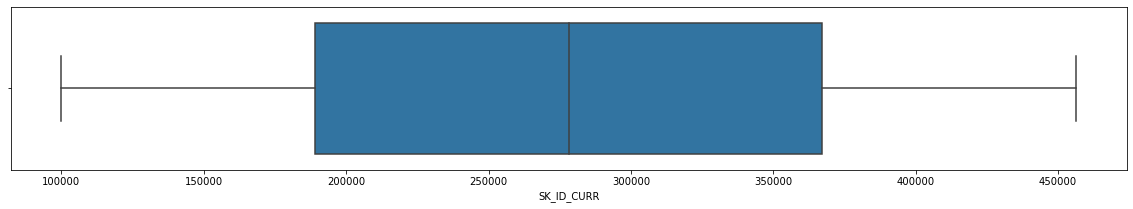

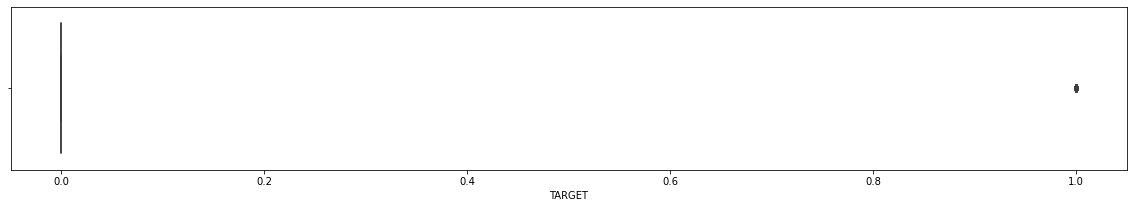

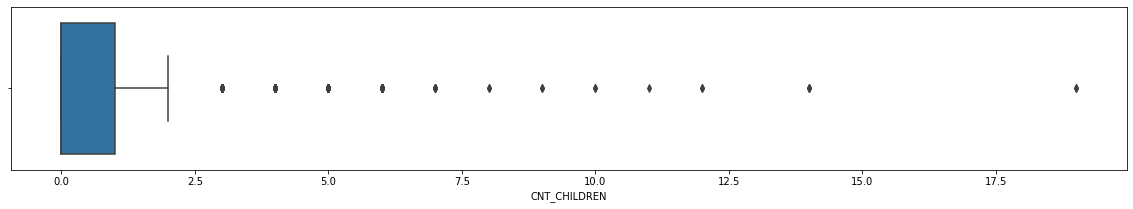

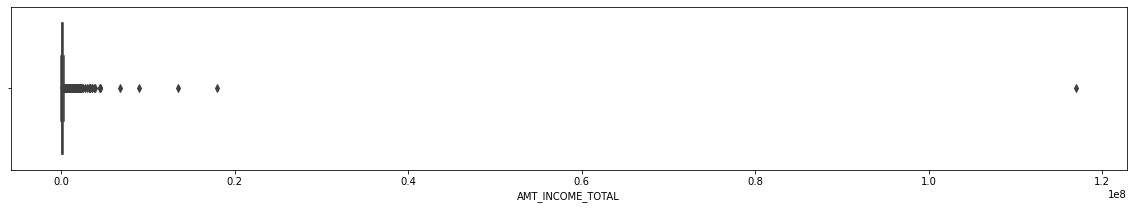

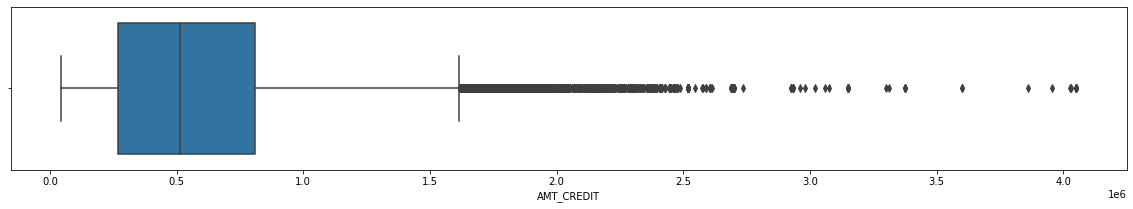

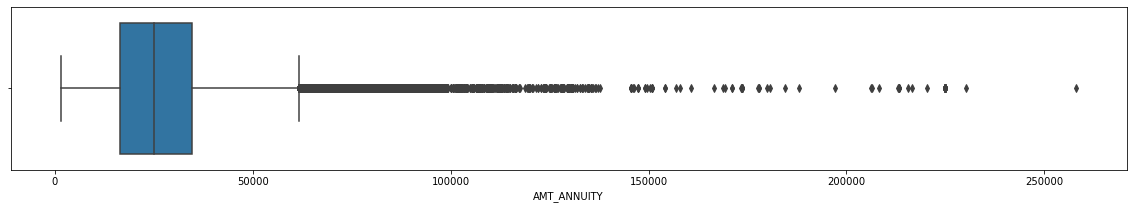

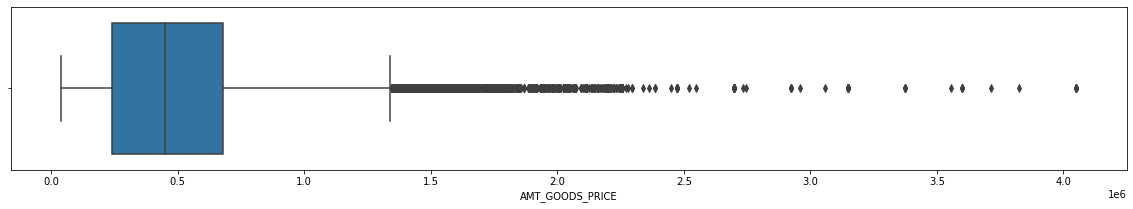

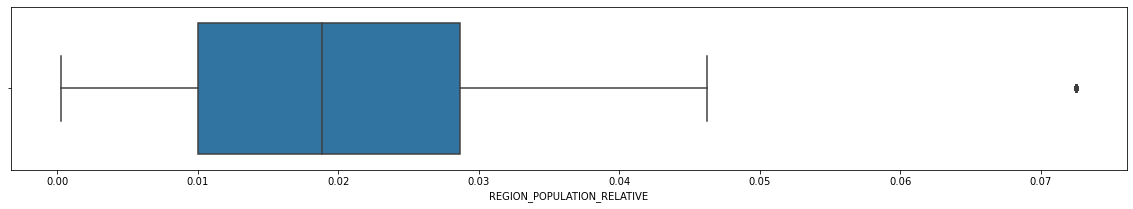

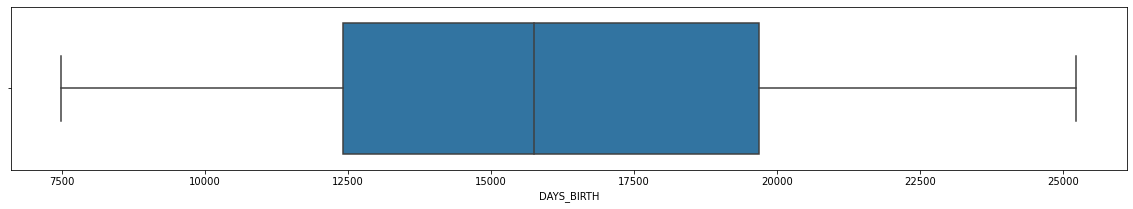

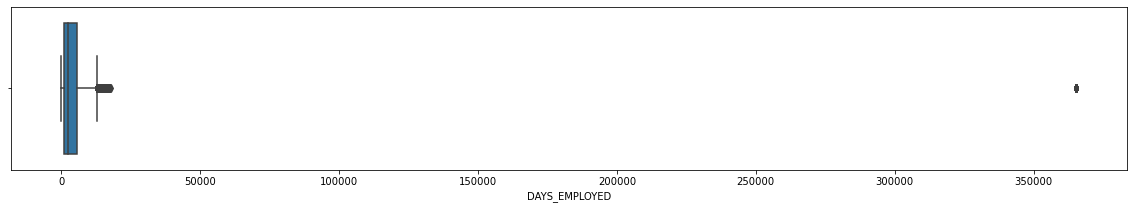

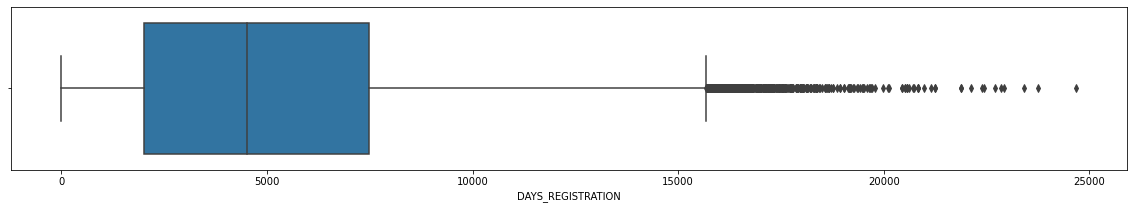

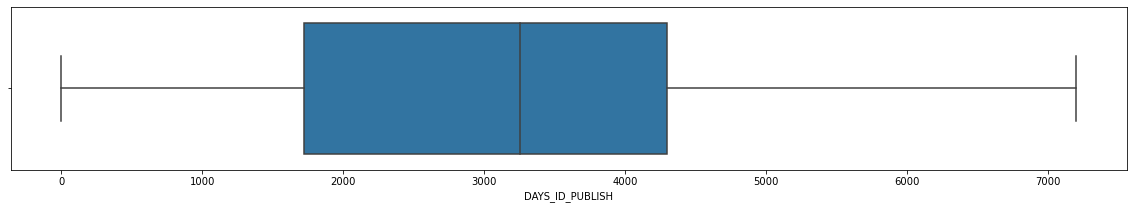

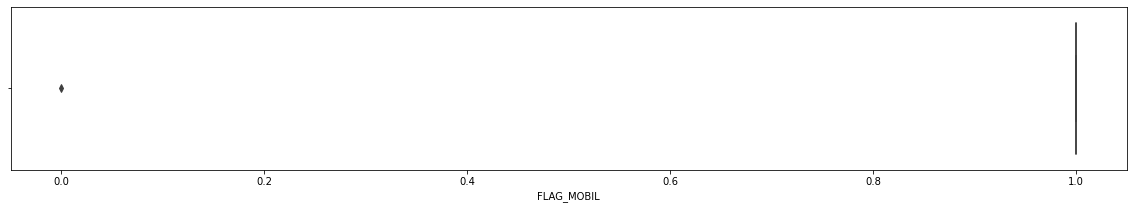

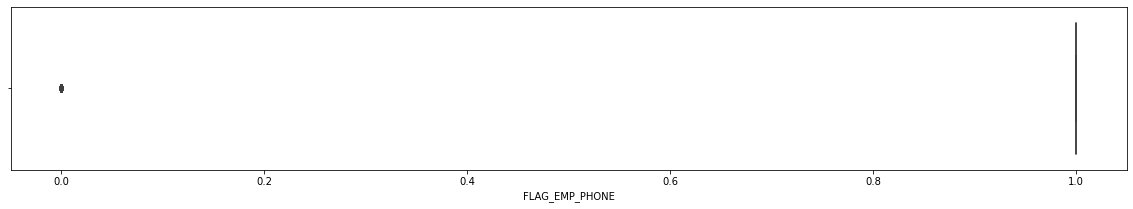

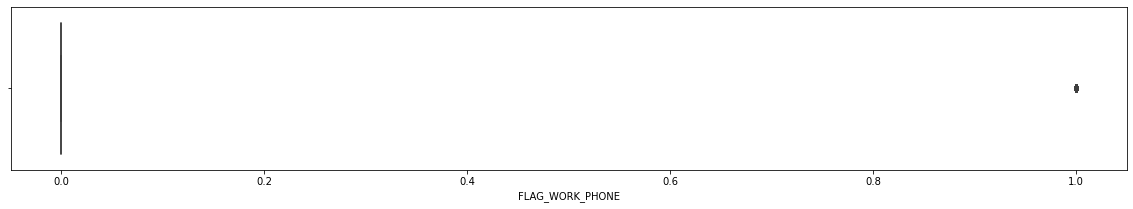

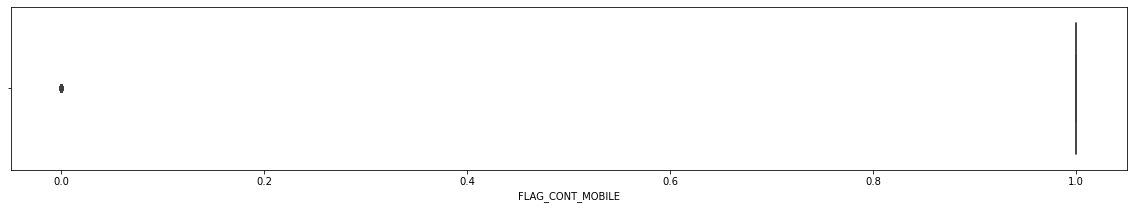

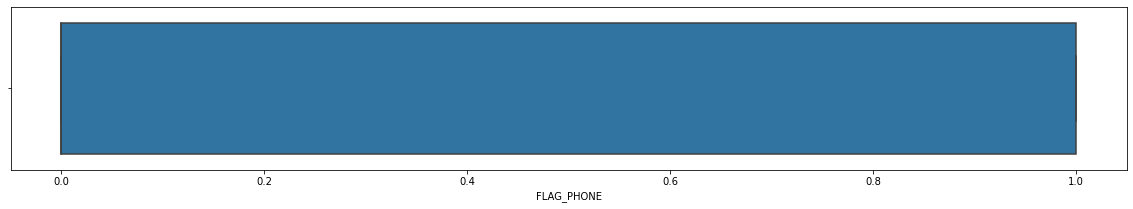

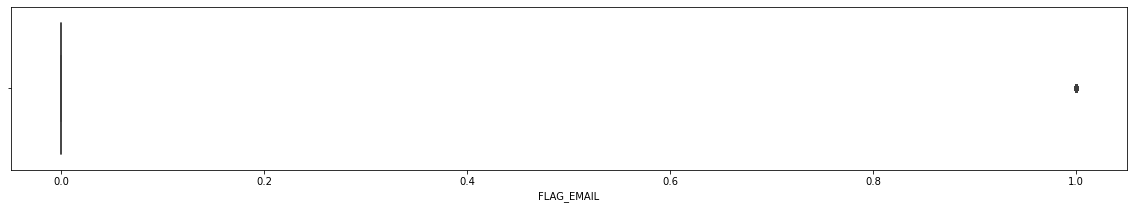

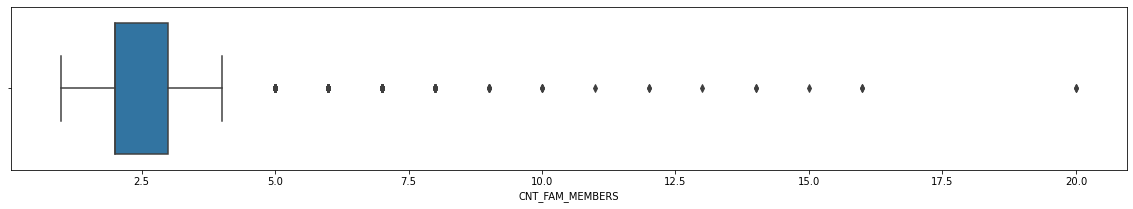

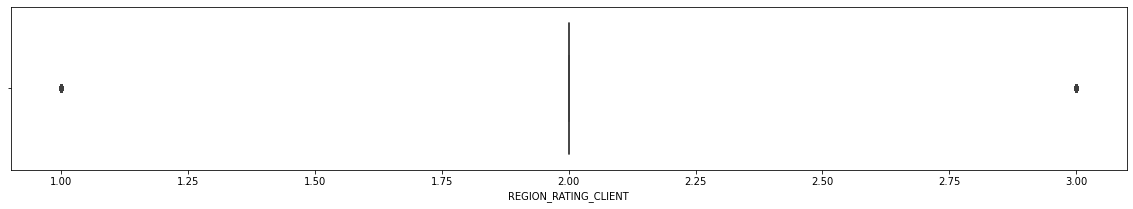

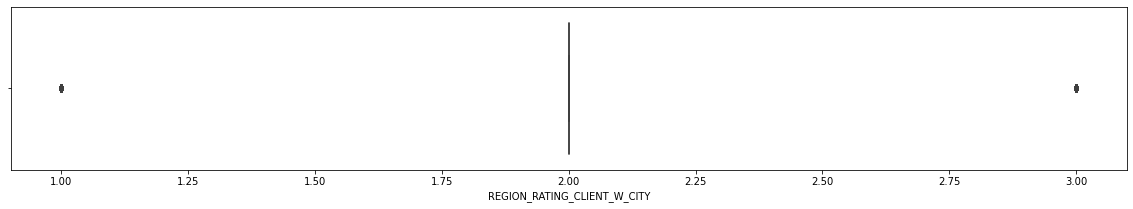

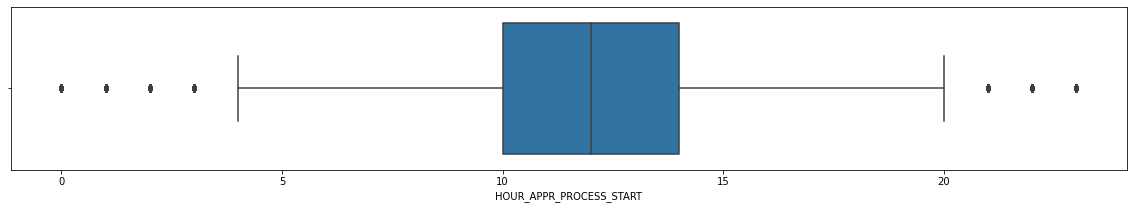

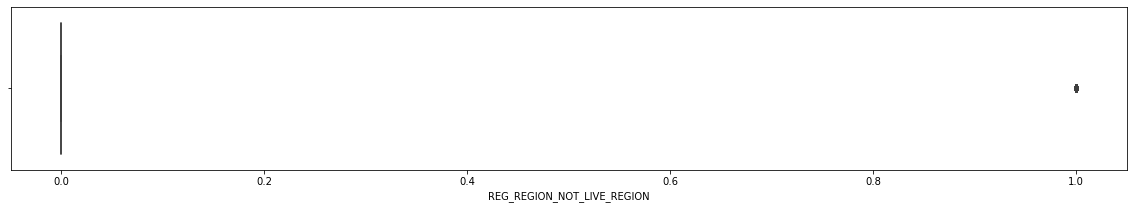

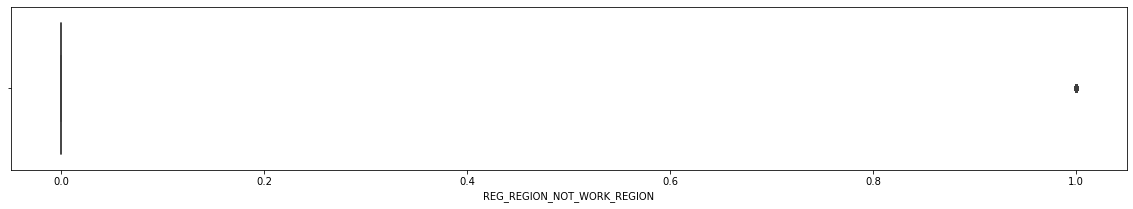

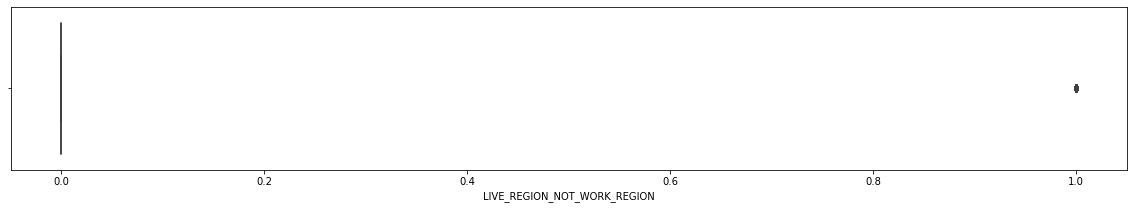

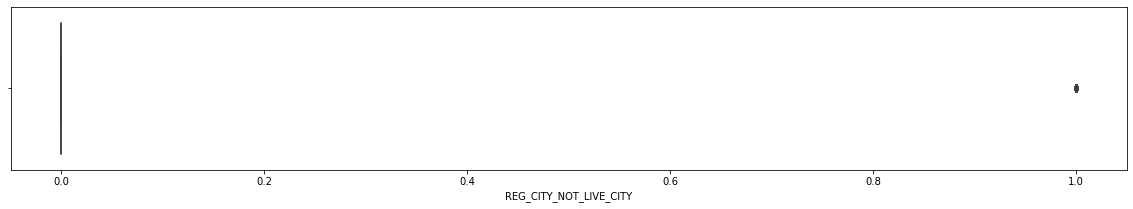

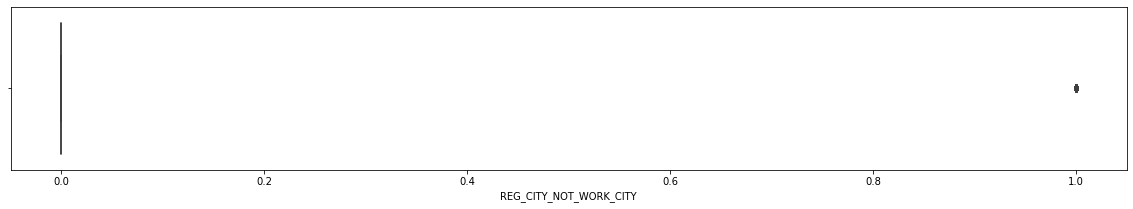

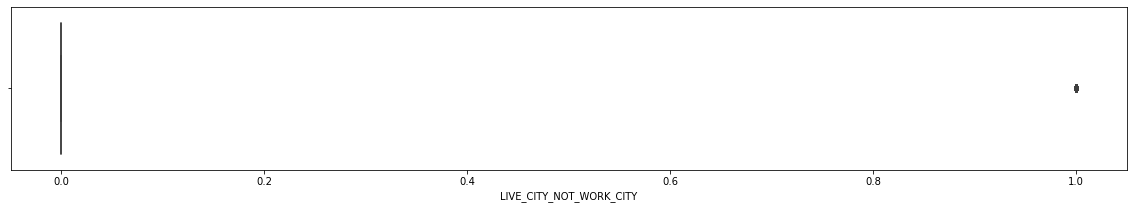

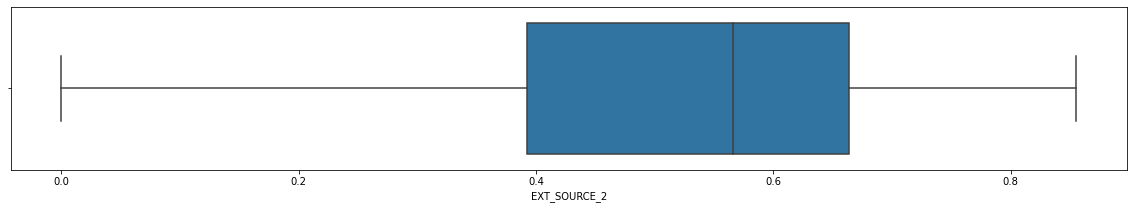

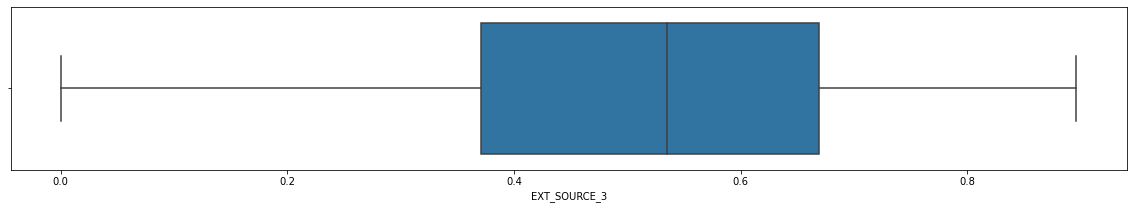

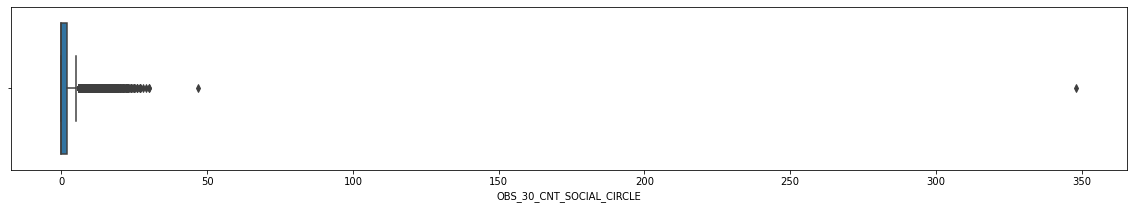

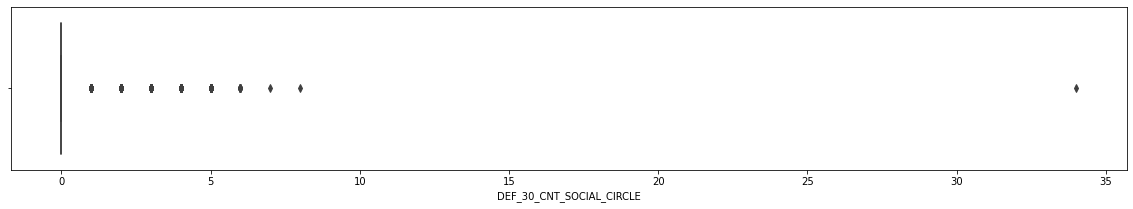

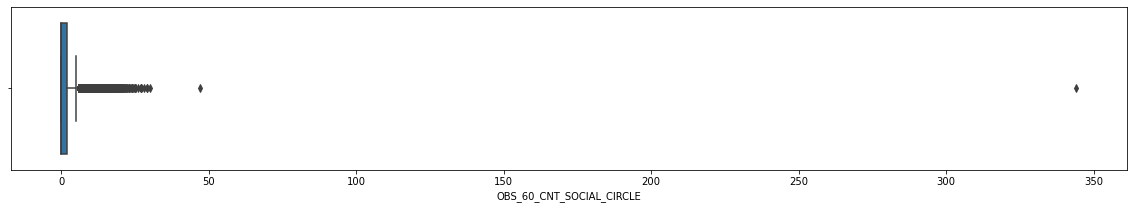

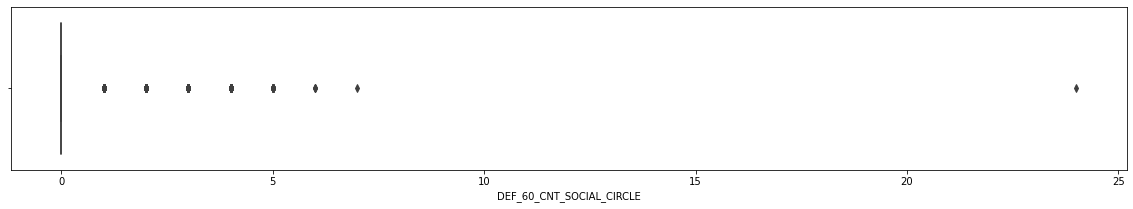

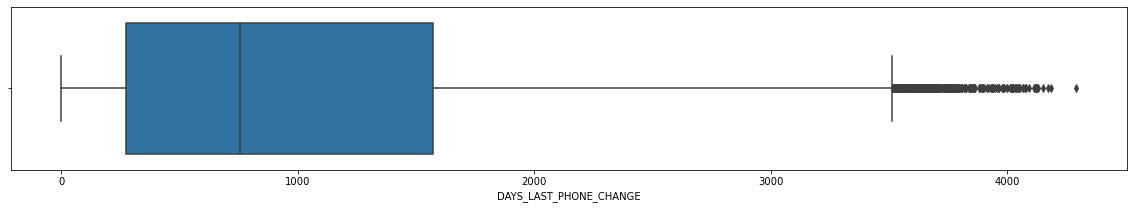

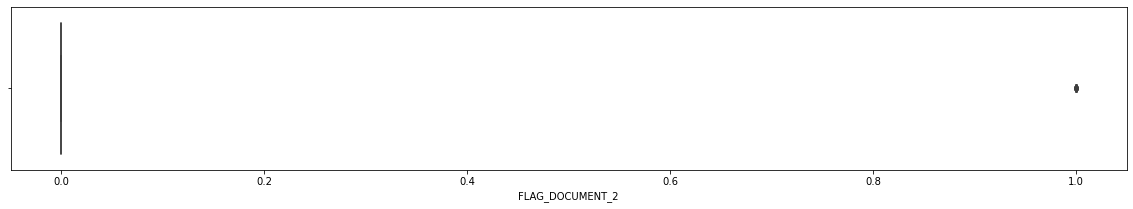

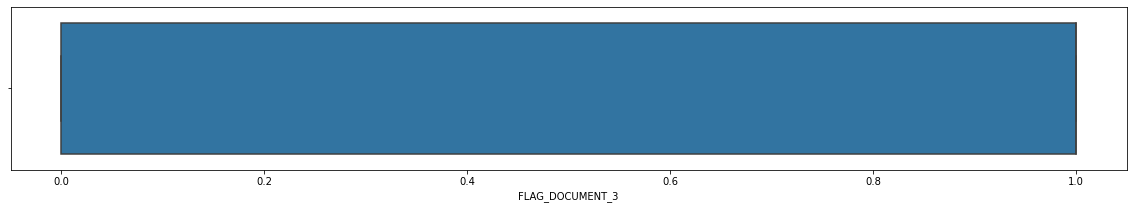

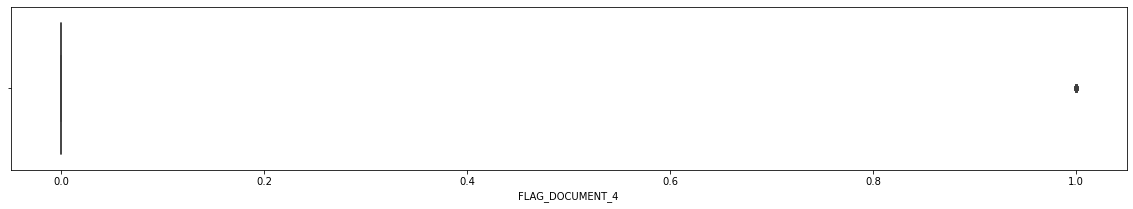

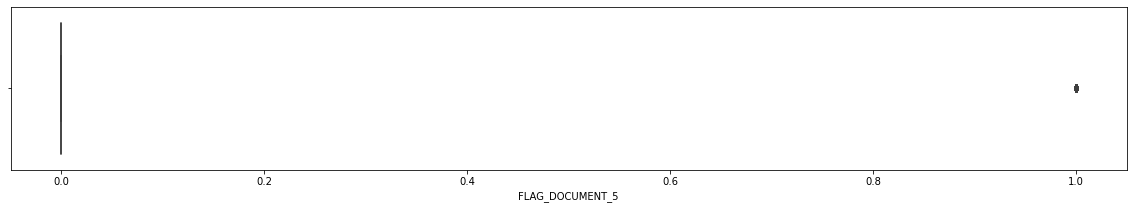

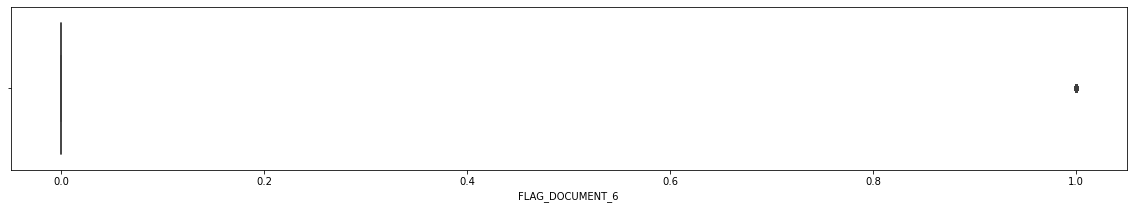

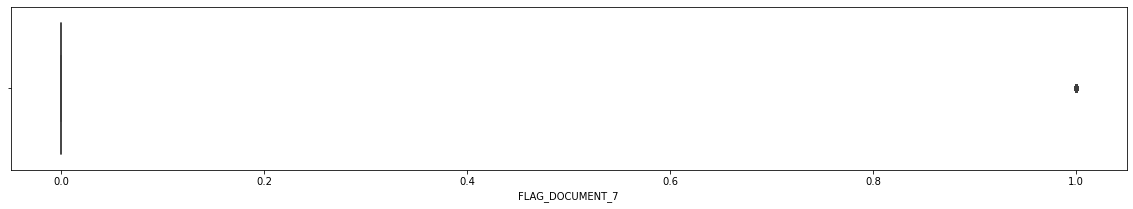

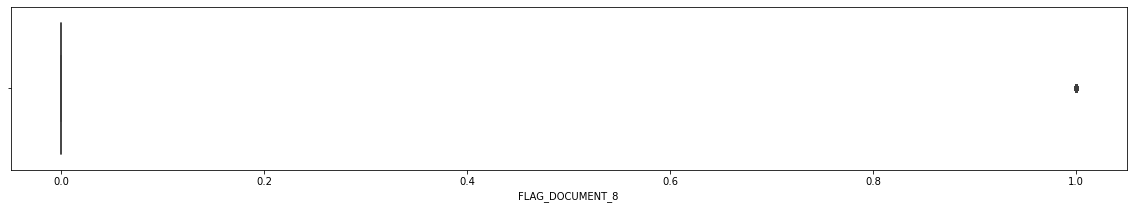

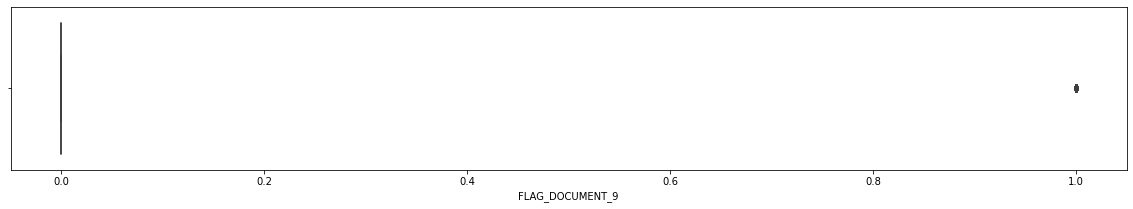

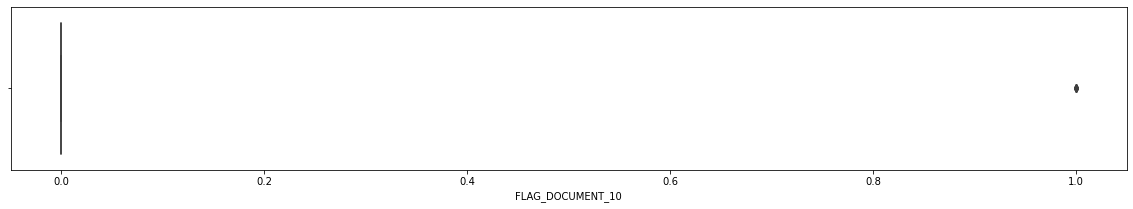

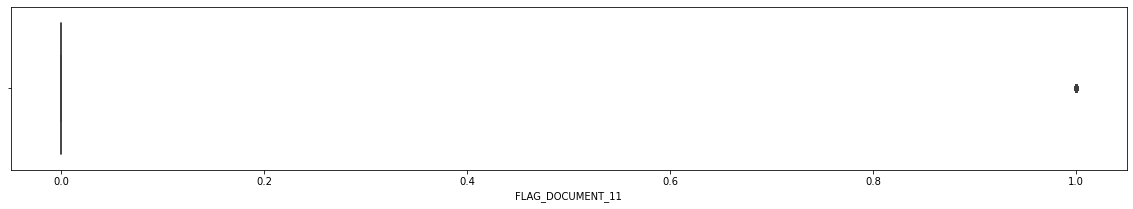

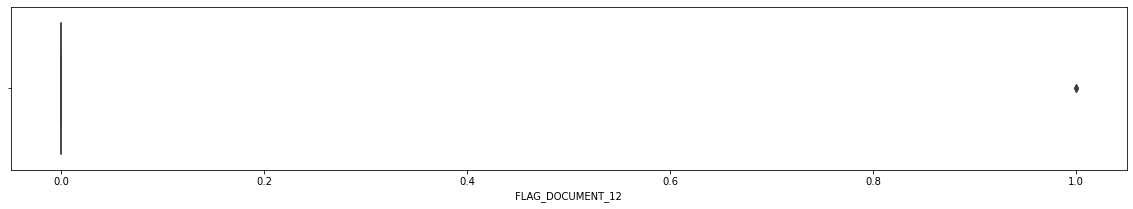

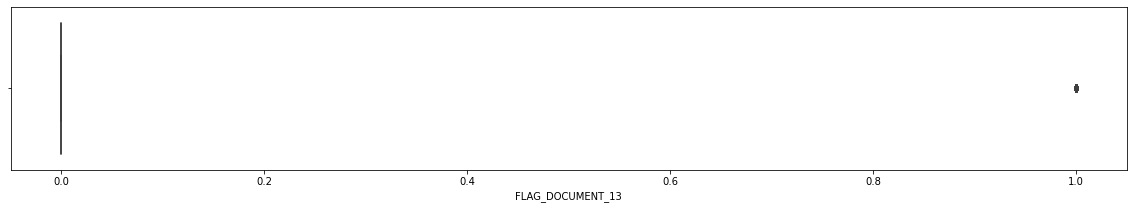

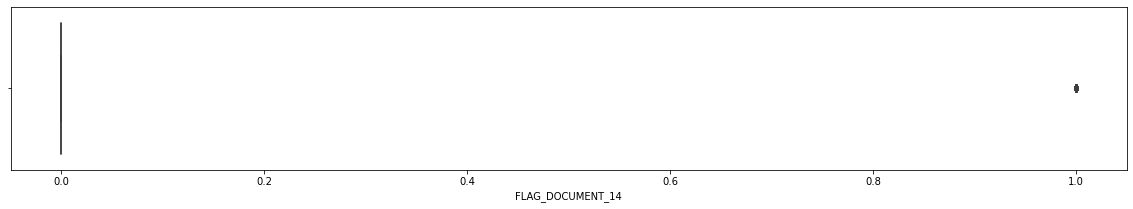

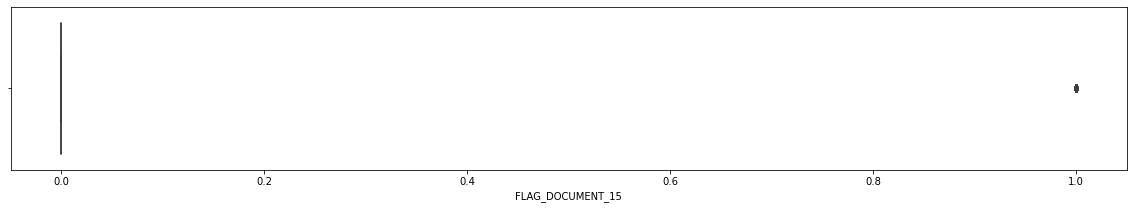

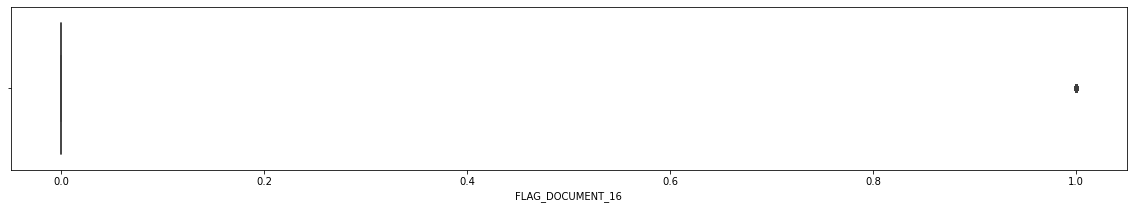

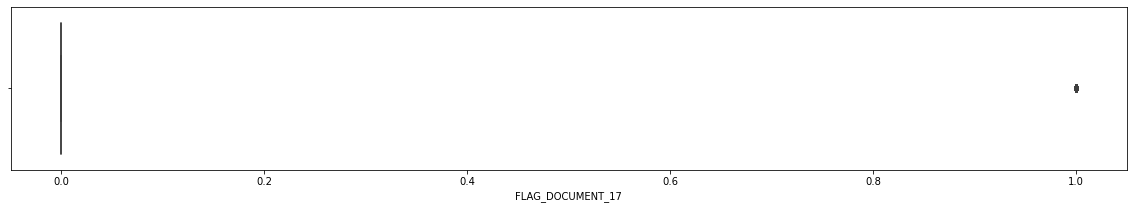

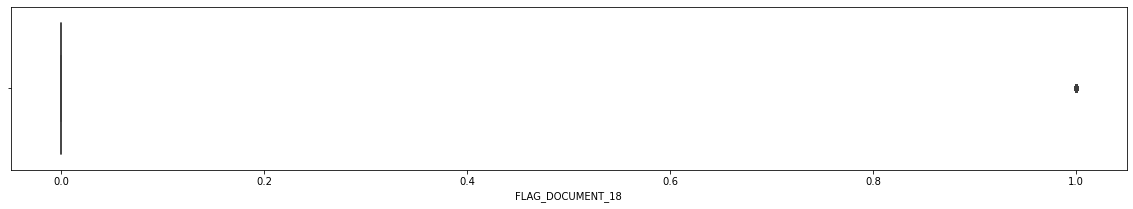

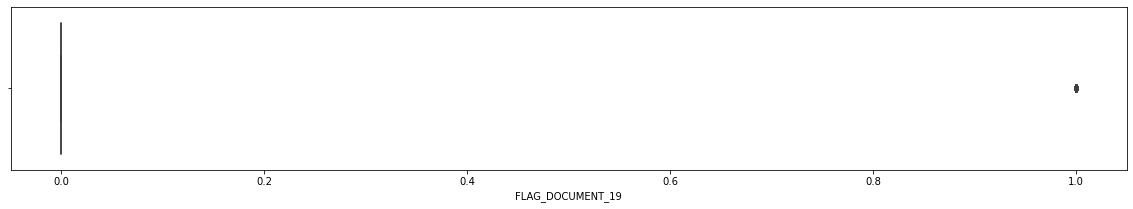

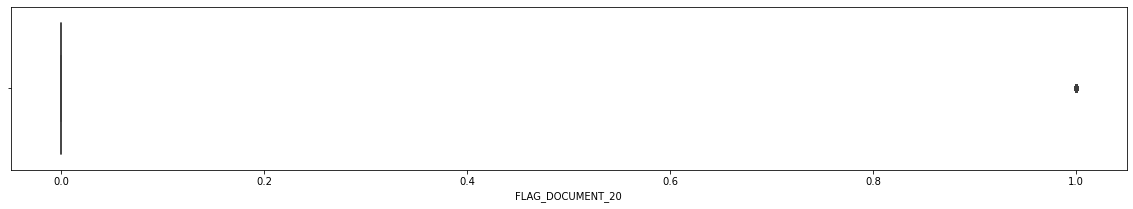

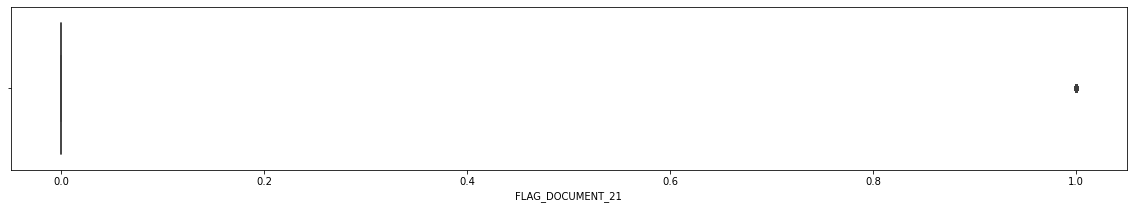

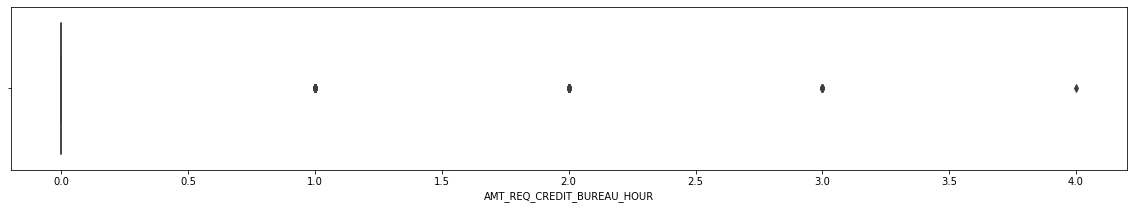

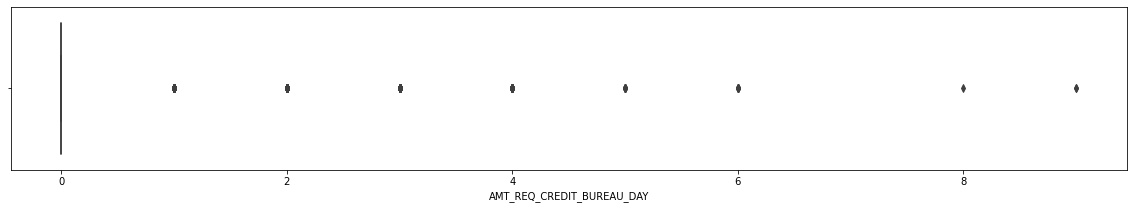

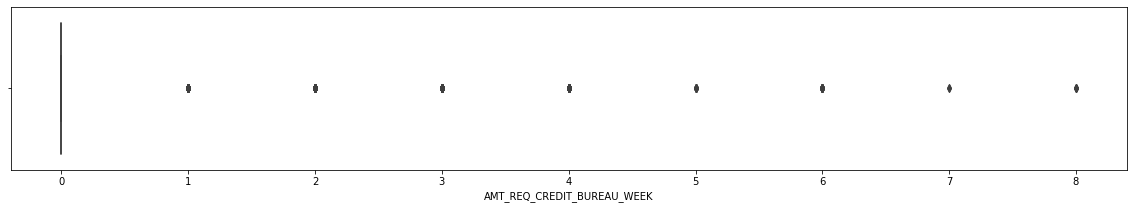

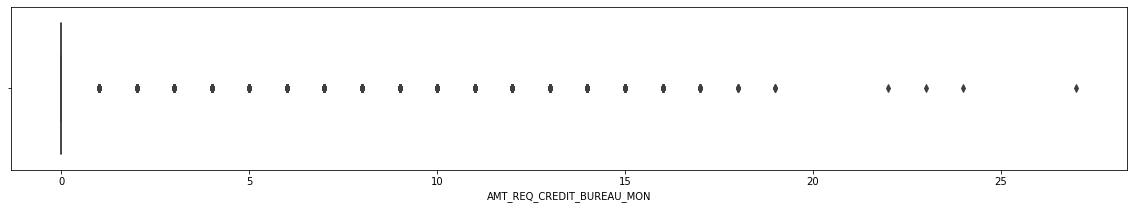

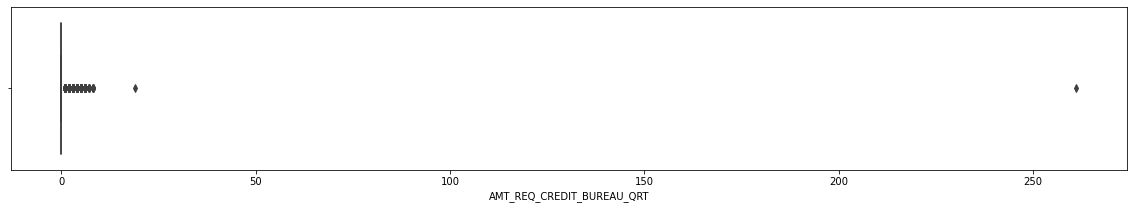

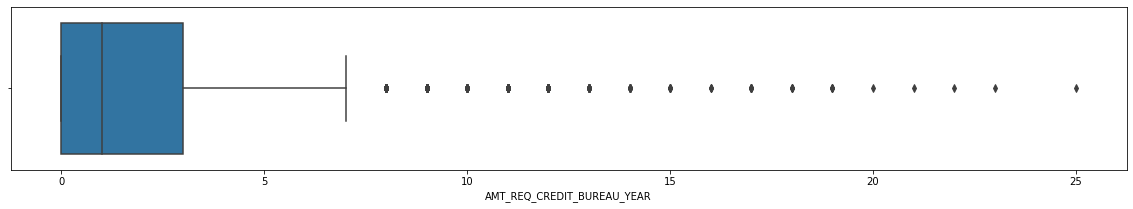

In [73]:
#For each numeric column draw a boxplot:
for column in df_ad_numeric:
    plt.figure(figsize=[20,3])
#     df_ad.boxplot([column])
    sns.boxplot(df_ad_numeric[column])
    plt.show()

### Inference for Outliers using Box Plots in Application Data set- and Reporting Them
1. The Following columns have outliers and need to dealt with accordingly
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. AMT_CREDIT
4. AMT_ANNUITY
5. AMT_GOODS_PRICE
6. DAYS_EMPLOYED
7. DAYS_REGISTRATION
8. CNT_FAM_MEMBERS
9. HOUR_APPR_PROCESS_START
10. OBS_30_CNT_SOCIAL_CIRCLE
11. DEF_30_SNT_SOCIAL_CIRCLE
12. OBS_60_CNT_SOCIAL_CIRCLE
13. DEF_60_CNT_SOCIAO_CIRCLE
14. DAYS_LAST_PHONE_CHANGE
15. AMT_REQ_CREDIT_BUREAU_HOUR
16. AMT_REQ_CREDIT_BUREAU_DAY
17. AMT_REQ_CREDIT_BUREAU_WEEK
18. AMT_REQ_CREDIT_BUREAU_MON
19. AMT_REQ_CREDIT_BUREAU_QRT
20. AMT_REQ_CREDIT_BUREAU_YEAR


Out of the Above columns below are the most important columns where we can drop rows with high outliers and further streamline our dataset for analysis. Such columns are:(atleast five colums to be reported)
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. AMT_CREDIT
4. AMT_ANNUITY
5. AMT_GOODS_PRICE
6. DAYS_EMPLOYED
7. CNT_FAM_MEMBERS
8. HOUR_APPR_PROCESS_START

### Binning the Most Important Numeric Columns/Variables that affect the 'Target' column
The Most Important Numeric Columns selected for Binning are:
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. AMT_GOODS_PRICE
5. DAYS_EMPLOYED
6. DAYS_BIRTH

In [74]:
## Convert numerical field to categorical field by using pd.qcut
##Prepare buckets for the 'AMT_INCOME_TOTAL' column using pd.qcut
df_ad["AMT_INCOME_TOTAL_BIN"]=pd.qcut(df_ad.AMT_INCOME_TOTAL, [0, .25, .75, 1],["Low","Medium","High"])

In [75]:
df_ad.AMT_INCOME_TOTAL_BIN.value_counts()

Medium    135395
Low       100578
High      71538 
Name: AMT_INCOME_TOTAL_BIN, dtype: int64

In [76]:
df_ad["AMT_CREDIT_BIN"]=pd.qcut(df_ad.AMT_CREDIT, [0, .25, .75, 1],["Low","Medium","High"])

In [77]:
df_ad.AMT_CREDIT_BIN.value_counts()

Medium    153214
Low       78421 
High      75876 
Name: AMT_CREDIT_BIN, dtype: int64

In [78]:
df_ad["AMT_ANNUITY_BIN"]=pd.qcut(df_ad.AMT_ANNUITY, [0, .25, .75, 1],["Low","Medium","High"])

In [79]:
df_ad.AMT_ANNUITY_BIN.value_counts()

Medium    153842
Low       76893 
High      76764 
Name: AMT_ANNUITY_BIN, dtype: int64

In [80]:
df_ad["AMT_GOODS_PRICE_BIN"]=pd.qcut(df_ad.AMT_GOODS_PRICE, [0, .25, .75, 1],["Low","Medium","High"])

In [81]:
df_ad.AMT_GOODS_PRICE_BIN.value_counts()

Medium    151822
Low       79877 
High      75534 
Name: AMT_GOODS_PRICE_BIN, dtype: int64

In [82]:
df_ad["DAYS_EMPLOYED_BIN"]=pd.qcut(df_ad.DAYS_EMPLOYED, [0, .25, .75, 1],["Low","Medium","High"])

In [83]:
df_ad.DAYS_EMPLOYED_BIN.value_counts()

Medium    153716
Low       76932 
High      76863 
Name: DAYS_EMPLOYED_BIN, dtype: int64

In [84]:
df_ad.DAYS_BIRTH.value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
10292    40
14267    39
13263    39
11664    39
14395    39
15042    38
14791    38
13788    38
13480    38
13634    38
13891    38
13584    38
15565    38
13217    37
15563    37
16257    37
14790    37
14890    37
16690    37
10107    37
12806    37
15048    37
15450    37
10192    37
11108    37
14767    37
20074    37
14276    37
10136    37
14386    36
14137    36
13708    36
11524    36
13904    36
14776    36
14926    36
13706    36
15322    36
10519    36
13643    36
13271    36
12433    35
13922    35
11266    35
13273    35
9981     35
14099    35
15009    35
16490    35
13254    35
14384    35
10088    35
12682    35
15155    35
11097    35
13687    35
15044    35
10978    35
17873    35
15164    35
15073    35
12776    35
14825    35
14297    35
10223    35
14350    35
10213    35
14120    35
11135    35
14131    35
11588    35
15901    35
10123    35
16830    35
16185    35
14848    34
14061    34
14775    34
1997

In [85]:
#Note this is not a quantile cut, its just a normal cut with explicit labels and thus binning them
# Convert Days to Years by multiplying no of years with 365 days in cut:
df_ad["AGE_BIN"]=pd.cut(df_ad.DAYS_BIRTH,[0,10950,14600,18250,21900,999999], labels=["<30","30-40","40-50","50-60","60+"])

In [86]:
df_ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461        637            3648.0              
1  0.003541                    16765       1188           1186.0              
2  0.010032                    19046       225            4260.0              
3  0.008019                    19005       3039           9833.0              
4  0.028663                    19932       3038           4311.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  2531             1           1               1                 
3  2437             1           1               0                 
4  3458             1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  1                 1           0           Laborers        1.0               
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               
3  1                 0           0           Laborers        2.0               
4  1                 0           0           Core staff      1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0          

### Binning the Most Important Categorical Columns-->
1. NAME_FAMILY_STATUS
2. OCCUPATION_TYPE
3. ORGANIZATION_TYPE

In [87]:
# Syntax of defining a 'Dictionary Mapping'
# df = pd.DataFrame({"x":['a', 'b', 'c', 'a', 'b']})
# value_dict = {'a':'A', 'b':'A', 'c':'B'}
# df['x'] = df['x'].replace(value_dict)

In [88]:
df_ad.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married    45444 
Civil marriage          29775 
Separated               19770 
Widow                   16088 
Unknown                 2     
Name: NAME_FAMILY_STATUS, dtype: int64

In [89]:
#Define a Dictionary Mapping for Categorical Variable Binning: 'Civil marriage' is also treated as 'married'
value_dict_NAME_FAMILY_STATUS = {'Married':'Married', 
              'Civil marriage':'Married', 
              'Single / not married':'Single / not married', 
              'Separated':'Separated',
              'Widow':'Widow'}

In [90]:
# Use the 'Dictionary Mapping' to form new bins for the categorical Variable.
df_ad['NAME_FAMILY_STATUS'] = df_ad['NAME_FAMILY_STATUS'].replace(value_dict_NAME_FAMILY_STATUS)

In [91]:
#the value counts for 'Civil marriage' gets added up to the value counts of 'Married'
df_ad.NAME_FAMILY_STATUS.value_counts()

Married                 226207
Single / not married    45444 
Separated               19770 
Widow                   16088 
Unknown                 2     
Name: NAME_FAMILY_STATUS, dtype: int64

## TASK 4:DATA ANALYSIS

## Univariate Analysis

#### Imbalance Percentage:
First we check the proportion of defaulters(1) and non defaulters(0)

In [92]:
df_ad.TARGET.value_counts()

0    282686
1    24825 
Name: TARGET, dtype: int64

In [93]:
#calculate the percentage of each 'TARGET' category.
df_ad.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

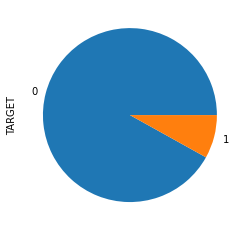

In [94]:
#plot the pie chart of 'TARGET' categories
df_ad.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

#### Inference: We see that around 8% from the data set have defaulted on loans and 92% have not defaulted

#### SEGMENTATION OF DATAFRAME:Next we create two dataframe, df_1 for defaulters and df_0 for non defaulters. 
And later we perform distinct univariate and bivariate analyses on each dataframes to draw insights as which variables and how they affect defaulters and non defaulters.

In [95]:
df_1=df_ad[df_ad.TARGET==1]

In [96]:
df_1.shape

(24825, 79)

In [97]:
df_0=df_ad[df_ad.TARGET==0]

In [98]:
df_0.shape

(282686, 79)

## Univariate Analysis(Categorical Columns) for Defaulters(df_1) and non Defaulters(df_0)

Next we choose the categorical unordered and categorical ordered variables for univariate analyses and draw bar plots respectively

In [99]:
df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   24825 non-null  int64   
 1   TARGET                       24825 non-null  int64   
 2   NAME_CONTRACT_TYPE           24825 non-null  object  
 3   CODE_GENDER                  24825 non-null  object  
 4   FLAG_OWN_CAR                 24825 non-null  object  
 5   FLAG_OWN_REALTY              24825 non-null  object  
 6   CNT_CHILDREN                 24825 non-null  int64   
 7   AMT_INCOME_TOTAL             24825 non-null  float64 
 8   AMT_CREDIT                   24825 non-null  float64 
 9   AMT_ANNUITY                  24825 non-null  float64 
 10  AMT_GOODS_PRICE              24804 non-null  float64 
 11  NAME_TYPE_SUITE              24755 non-null  object  
 12  NAME_INCOME_TYPE             24825 non-null  object  
 13  

In [100]:
# select non-numeric columns, these are your categorical columns
cat_cols = df_ad.select_dtypes(exclude=[np.number]).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'AMT_INCOME_TOTAL_BIN', 'AMT_CREDIT_BIN', 'AMT_ANNUITY_BIN',
       'AMT_GOODS_PRICE_BIN', 'DAYS_EMPLOYED_BIN', 'AGE_BIN'],
      dtype='object')

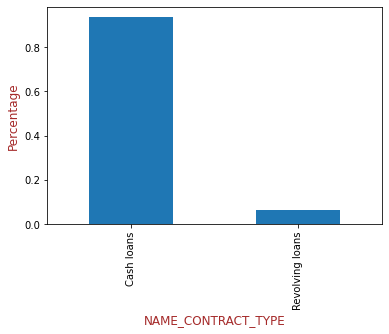

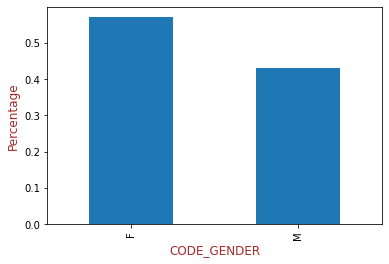

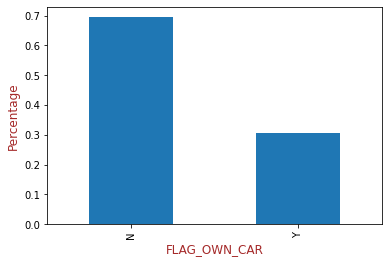

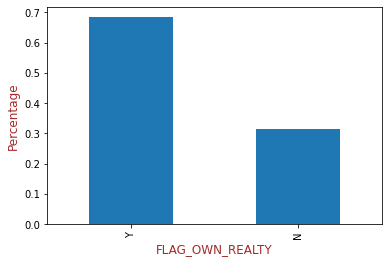

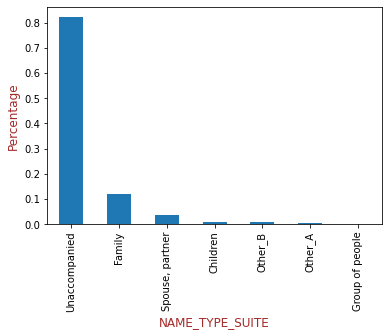

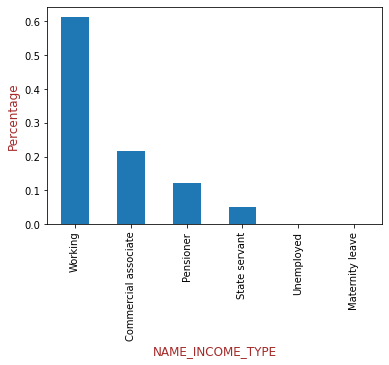

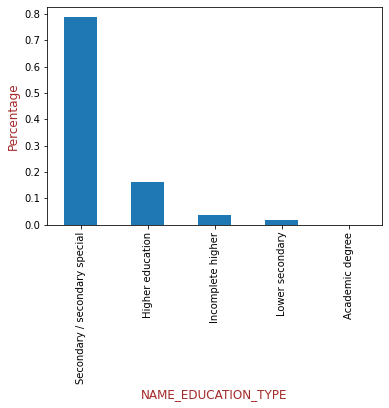

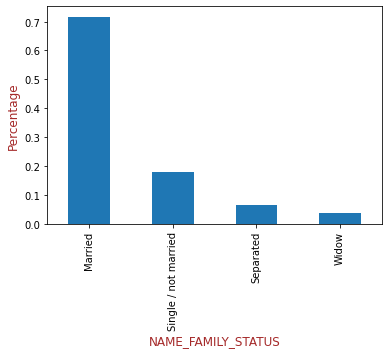

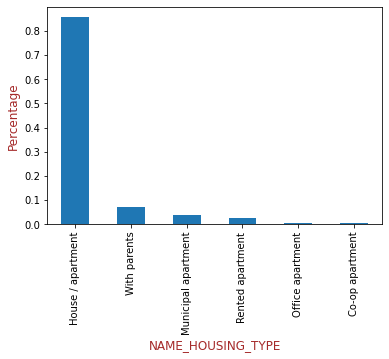

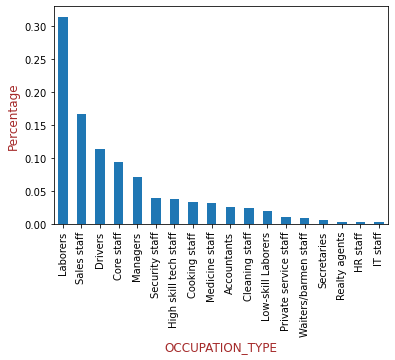

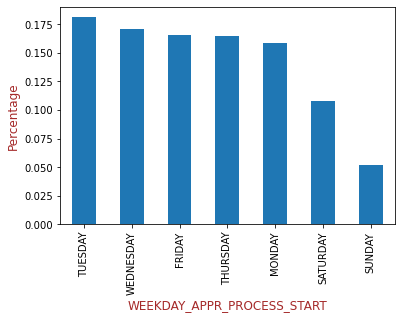

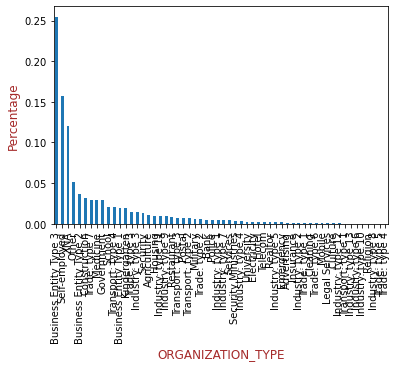

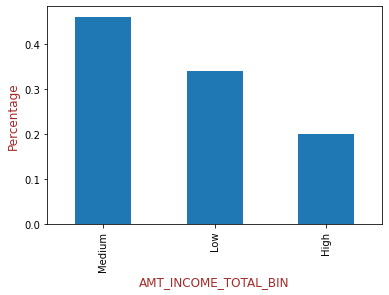

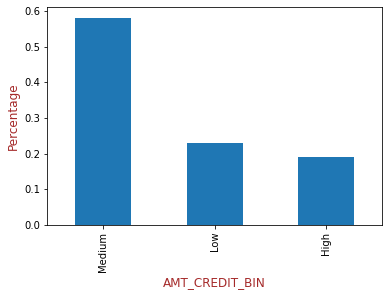

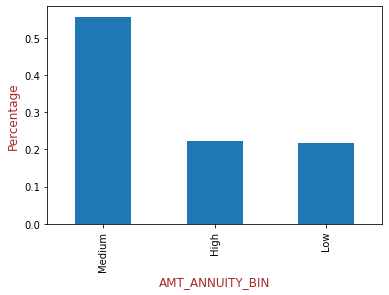

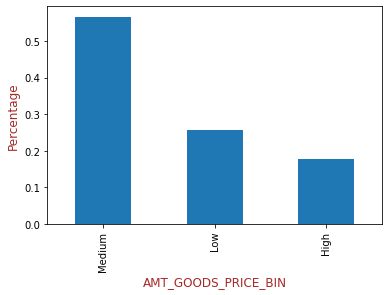

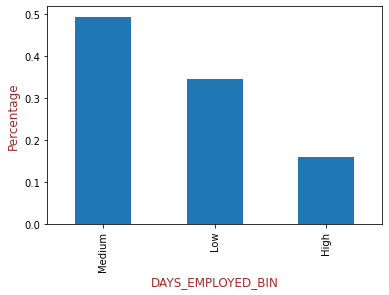

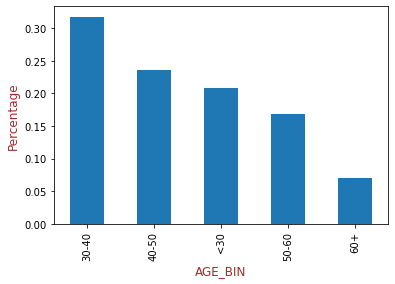

In [101]:
#For each categorical column in df_1 draw a barplot:(PEOPLE WHO HAVE DEFAULTED ON LOANS)
for column in cat_cols:
    df_1[column].value_counts(normalize=True).plot.bar()
    plt.xlabel(column, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

#### INFERENCE: 
The most striking inferences drawn from the above bar plots that people who have defaulted on the loans 
1. Have taken Cash Loans
2. Females have defaulted more than males
3. Do not own a car
4. Own real estate
5. Have usually come unaccompanied to get the loan
6. Are married, working , have secondary education living in a house/apartment and are labourers.
7. Have medium Incomes, and the price of the goods for consumer loans lies in 'medium' range.

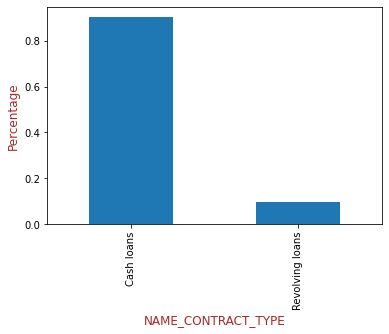

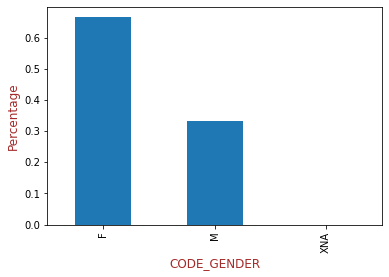

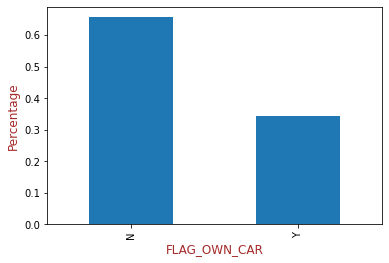

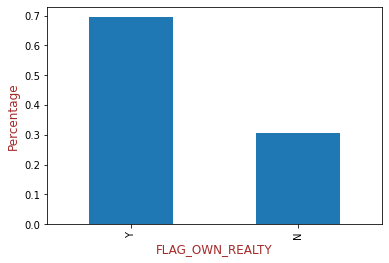

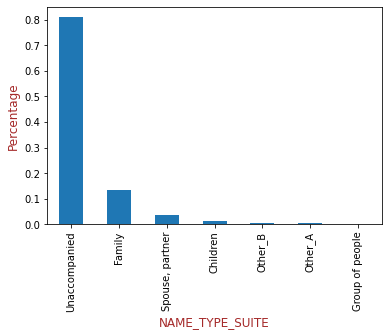

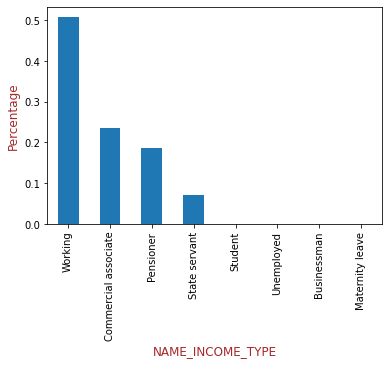

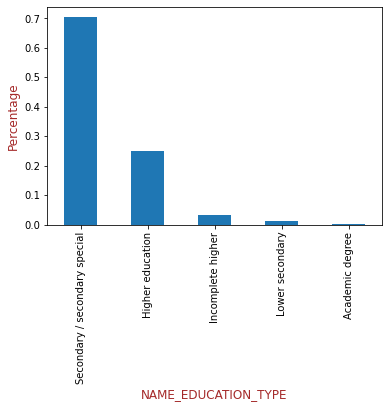

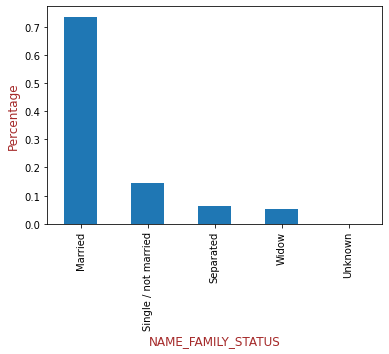

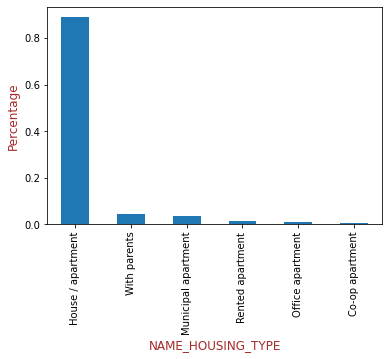

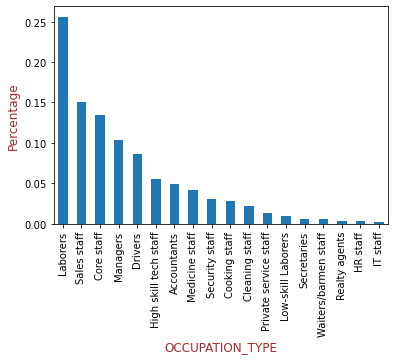

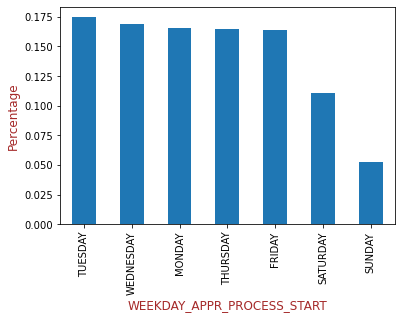

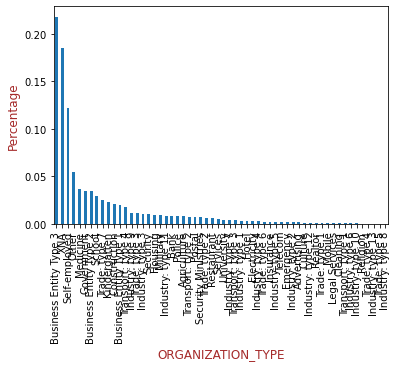

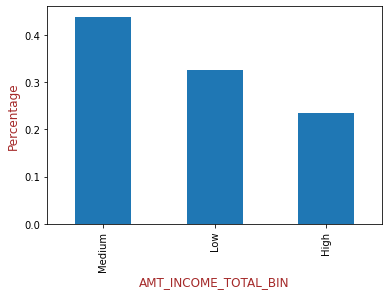

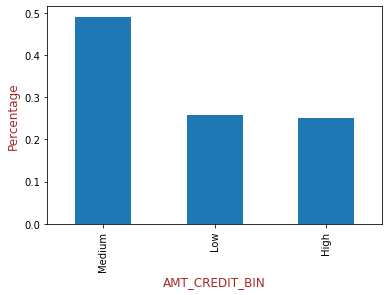

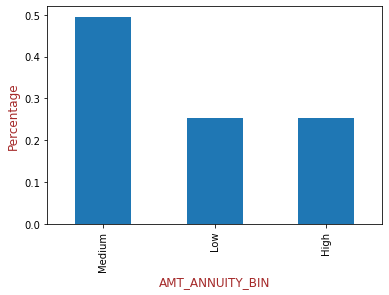

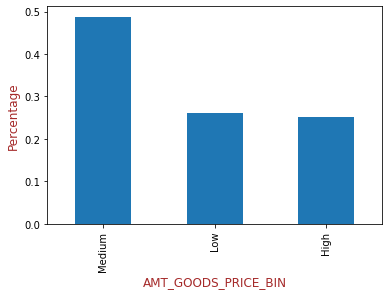

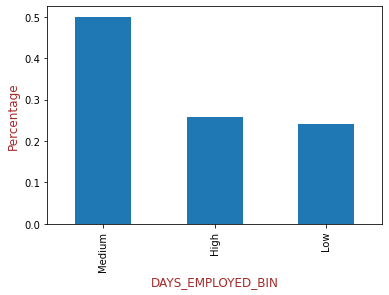

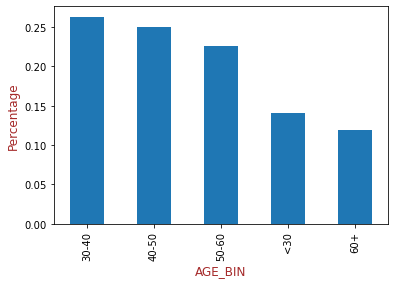

In [102]:
#For each categorical column in df_0 draw a barplot:(PEOPLE WHO HAVE NOT DEFAULTED ON LOANS)
for column in cat_cols:
    df_0[column].value_counts(normalize=True).plot.bar()
    plt.xlabel(column, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

#### INFERENCE:
The inference of univariate analyses of categorical columns are kind of same for both defaulters and non defaulters, thus cannot draw any distinct insight yet from our univariate analysis on categorical columns.



## Univariate Analysis(Numerical Columns) for Defaulters(df_1) and non Defaulters(df_0)

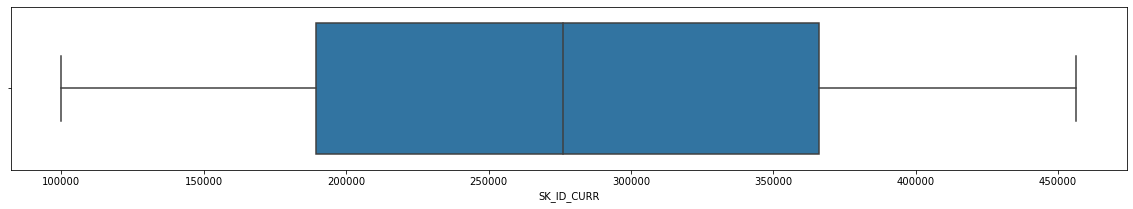

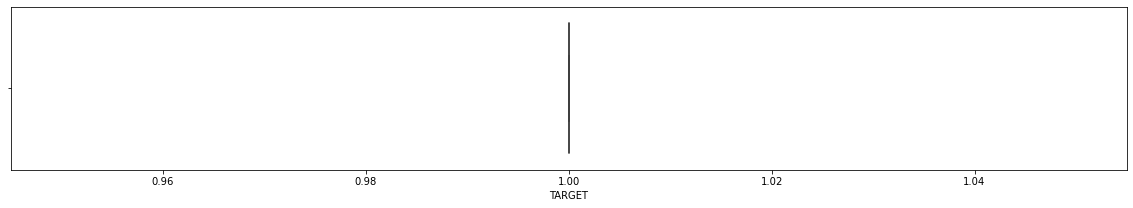

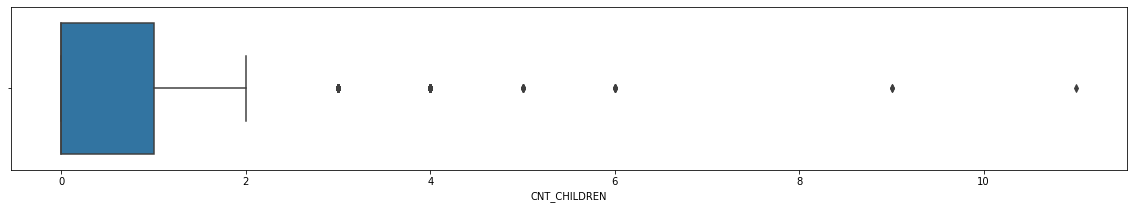

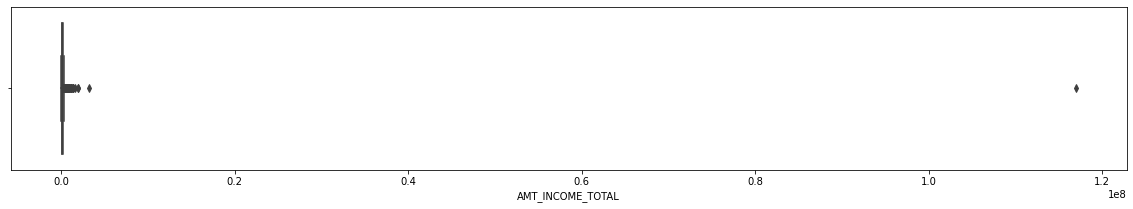

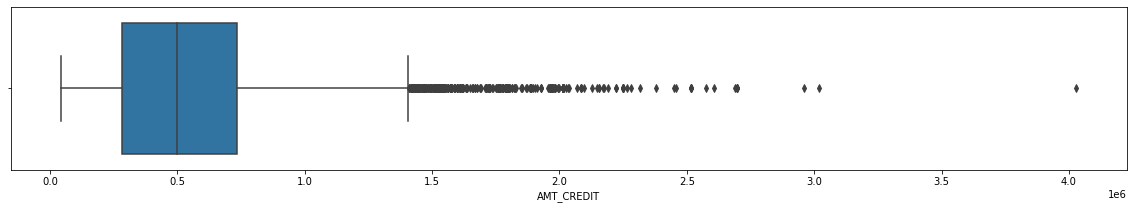

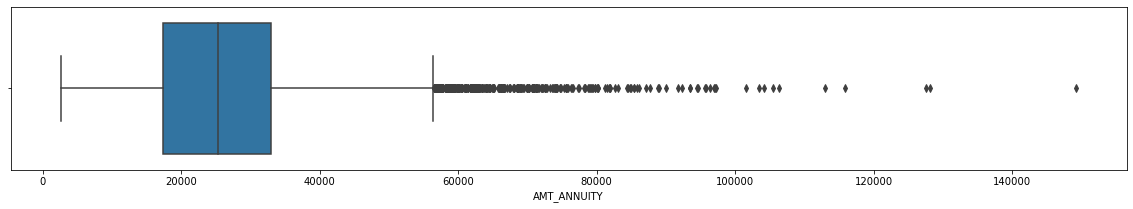

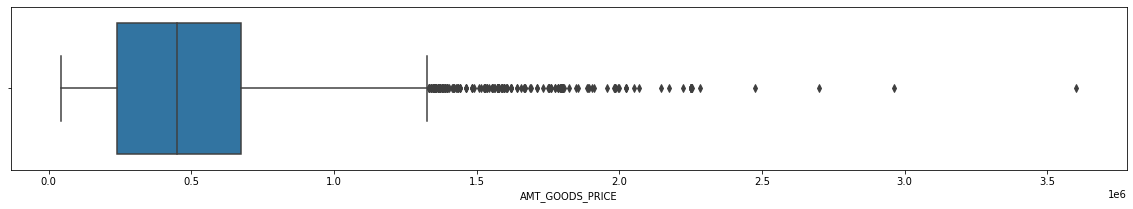

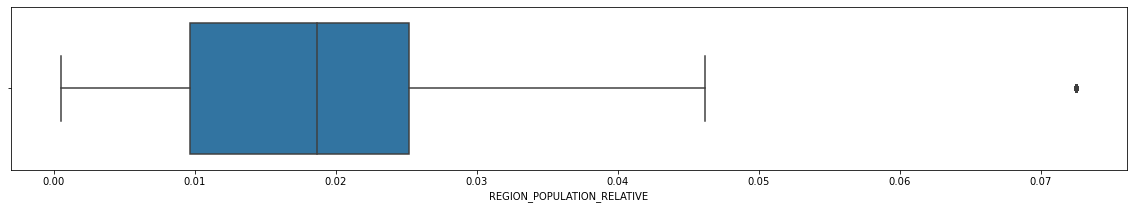

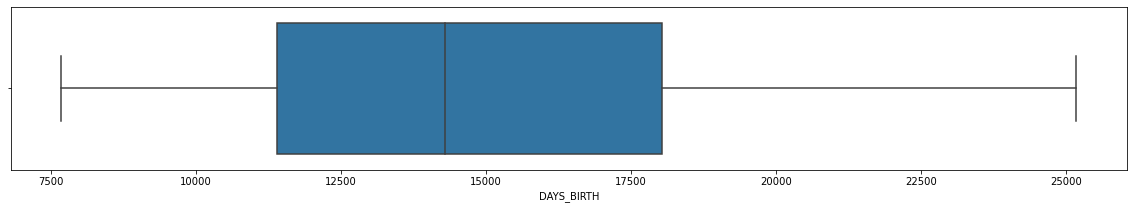

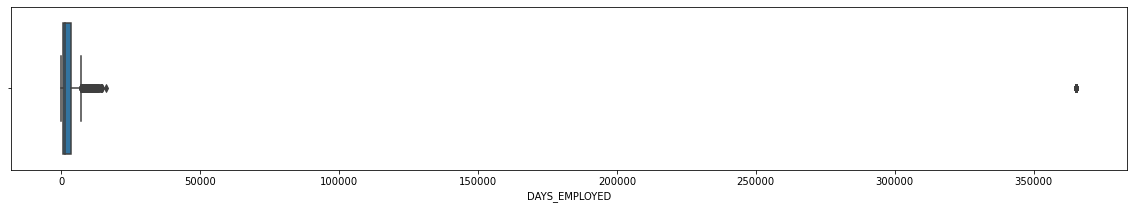

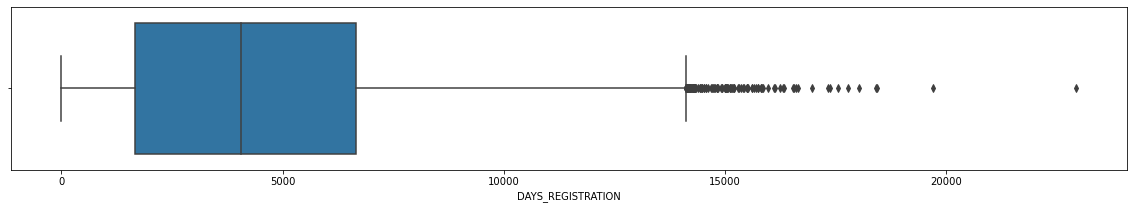

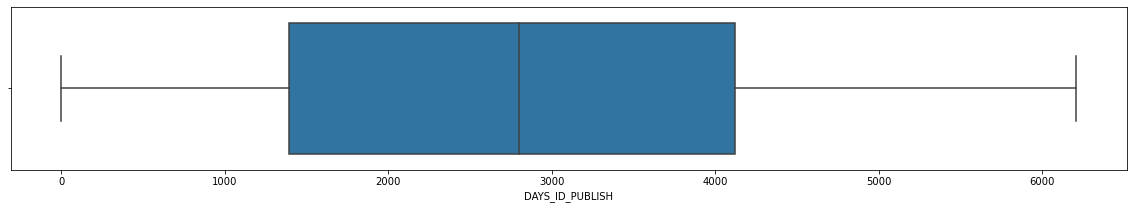

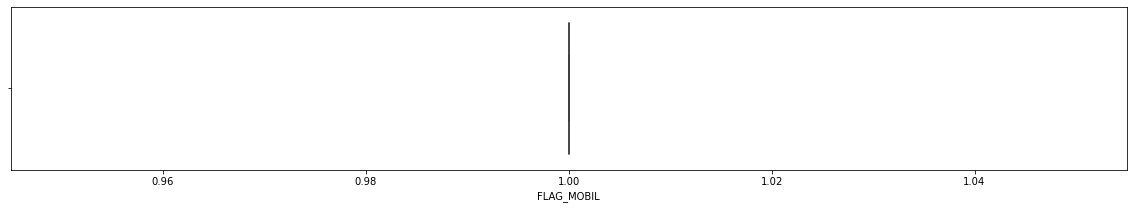

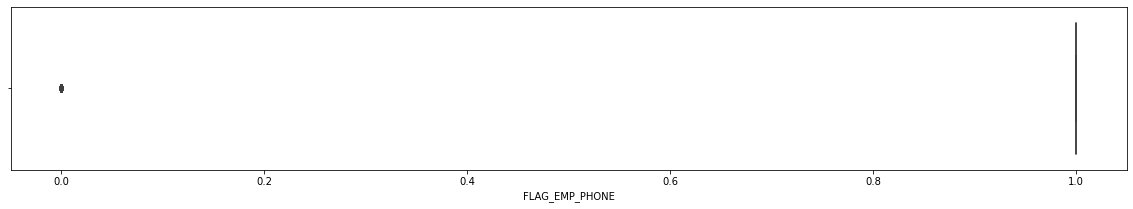

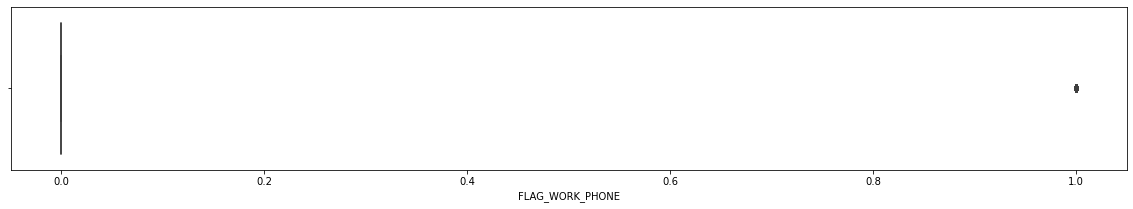

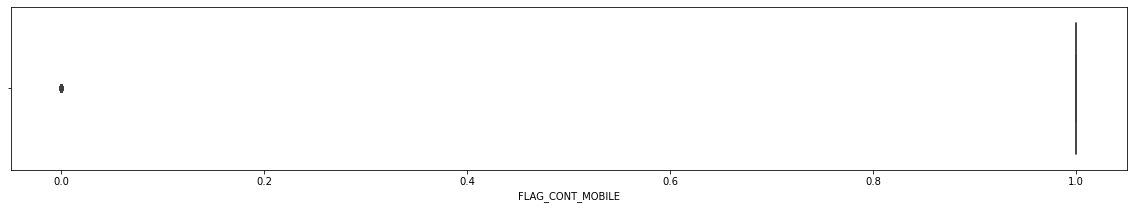

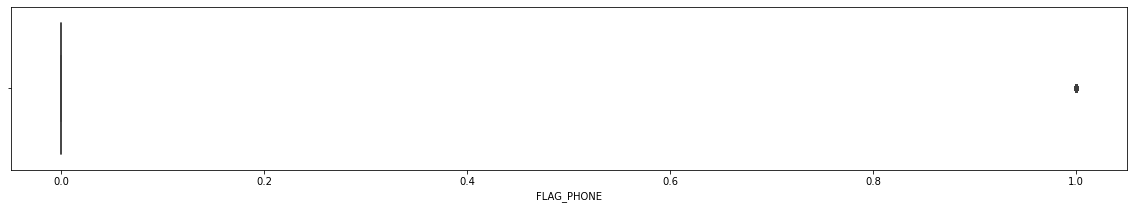

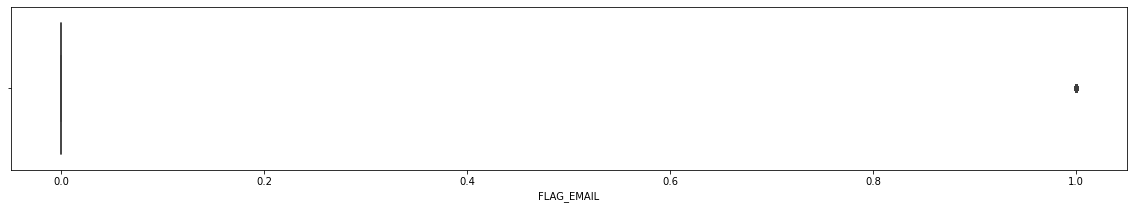

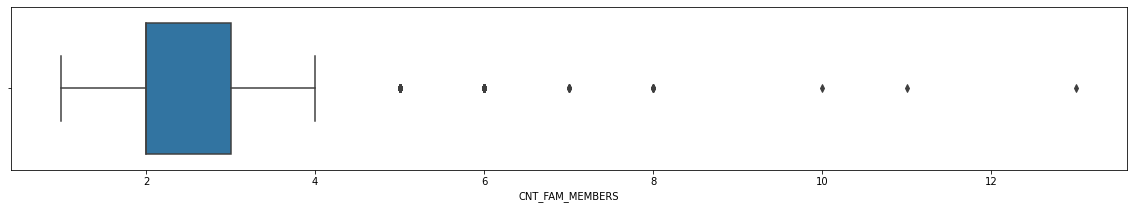

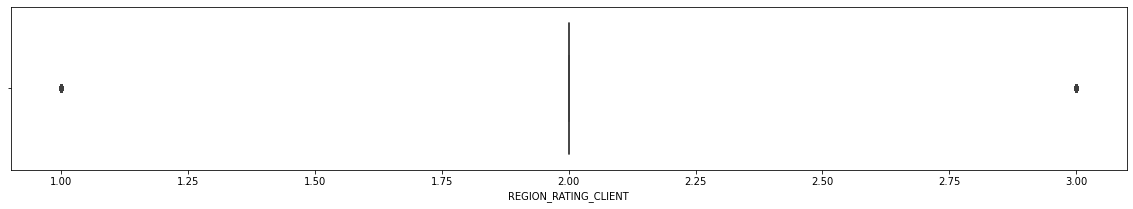

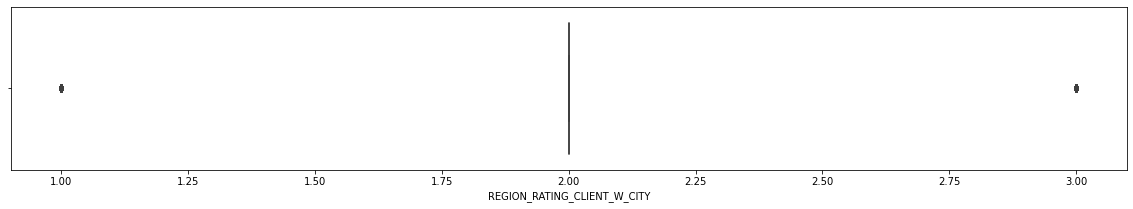

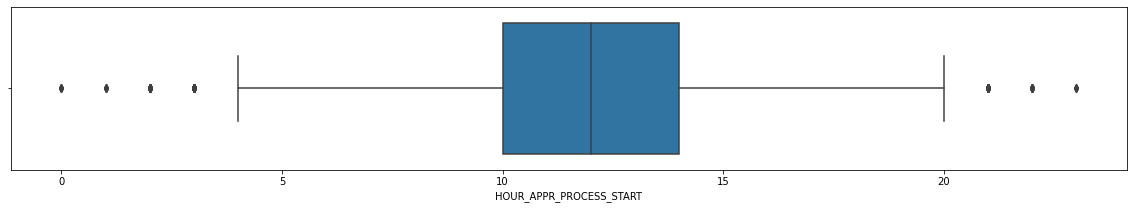

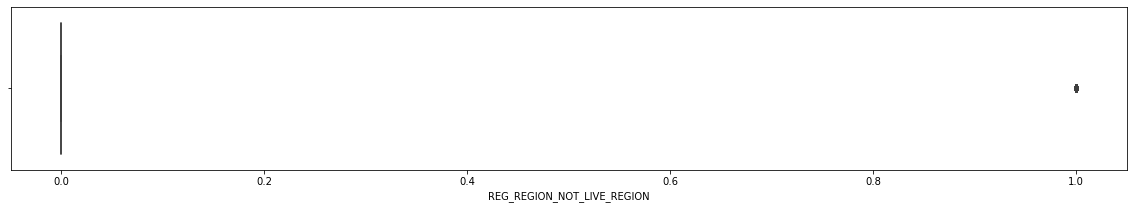

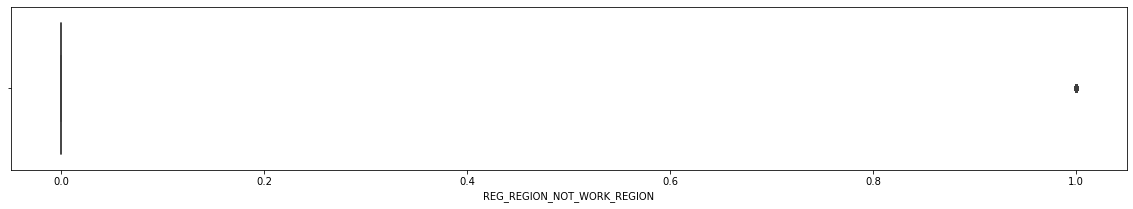

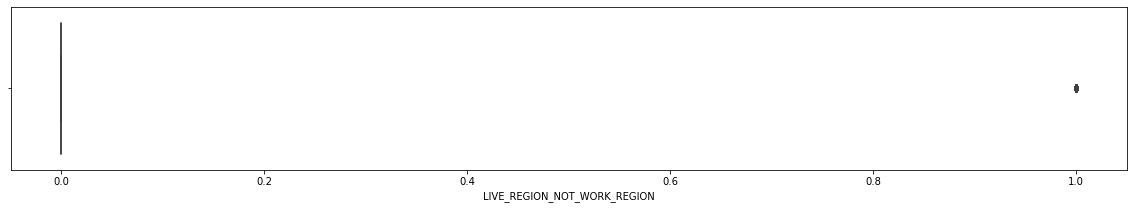

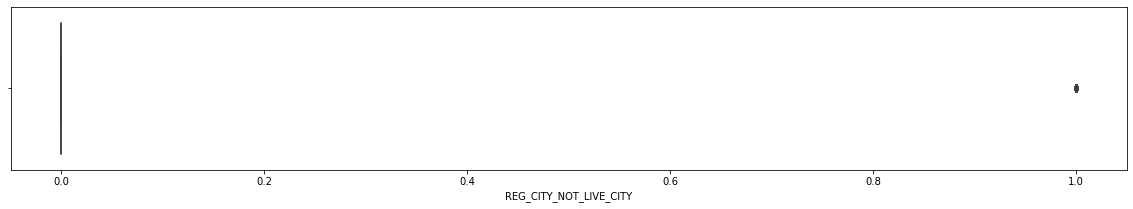

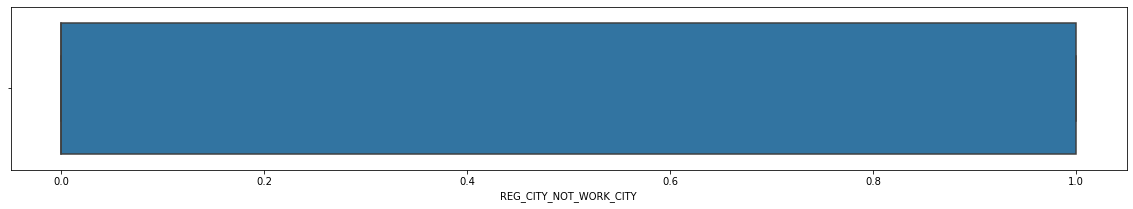

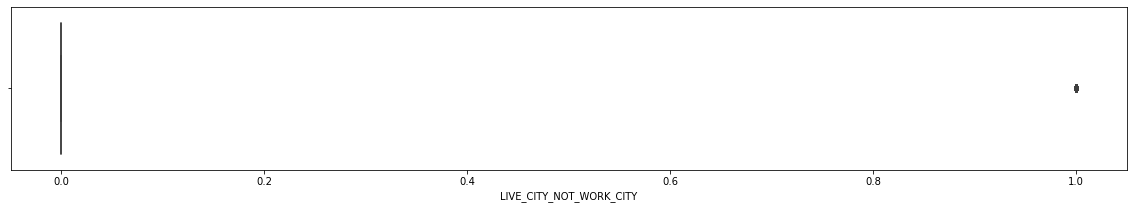

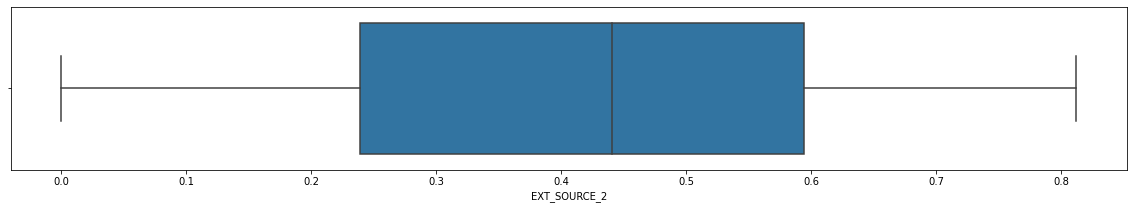

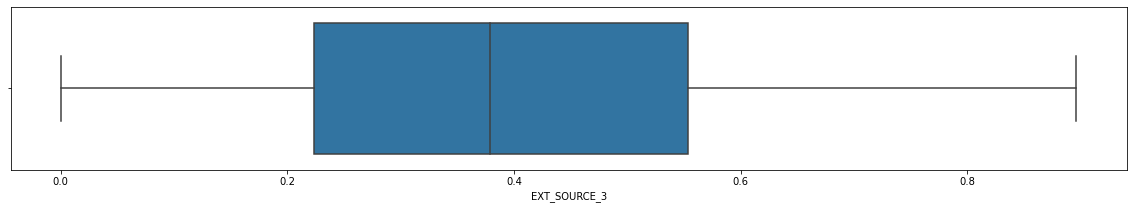

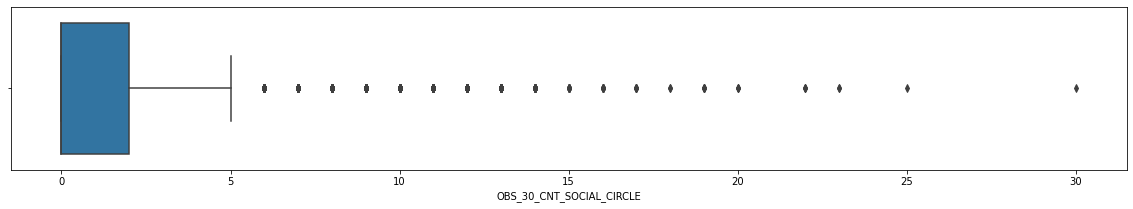

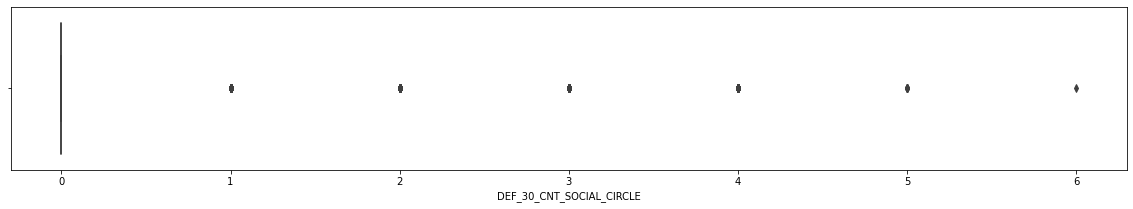

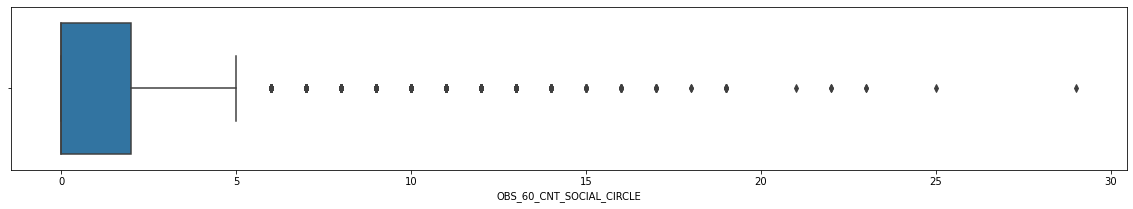

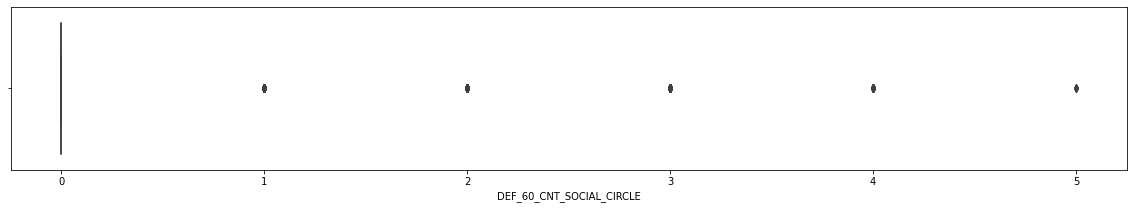

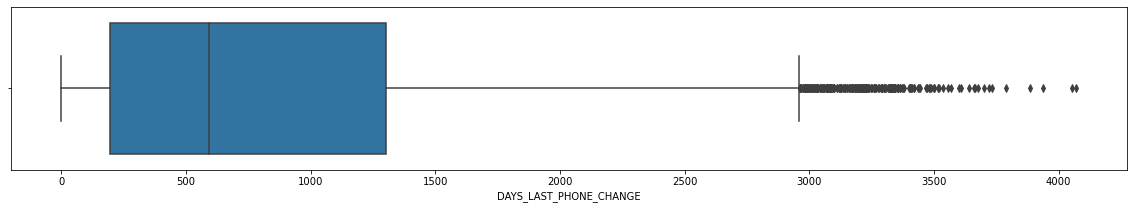

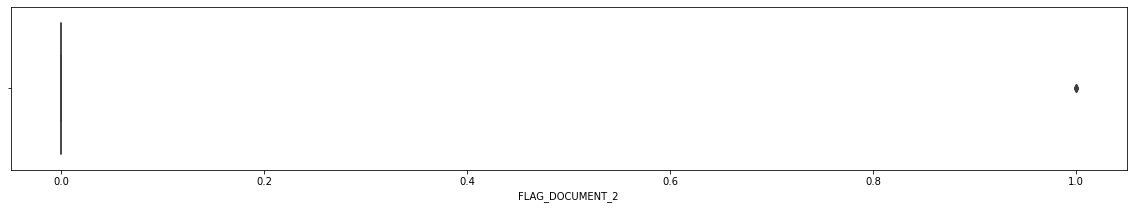

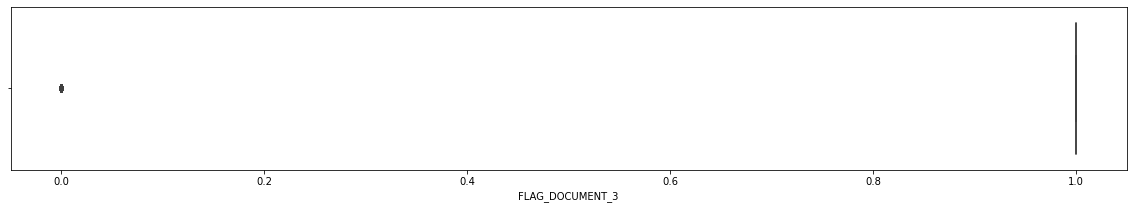

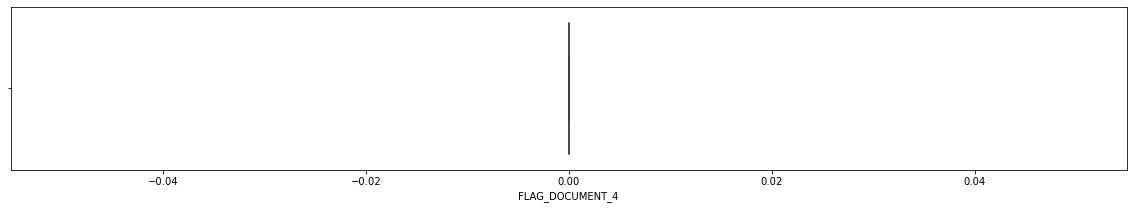

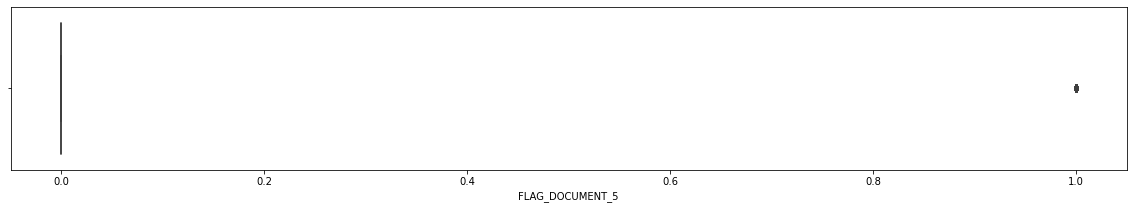

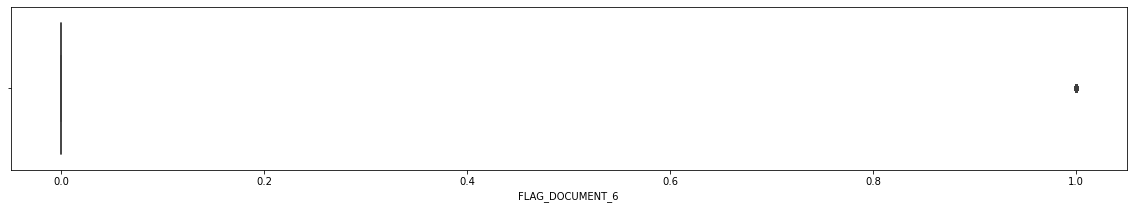

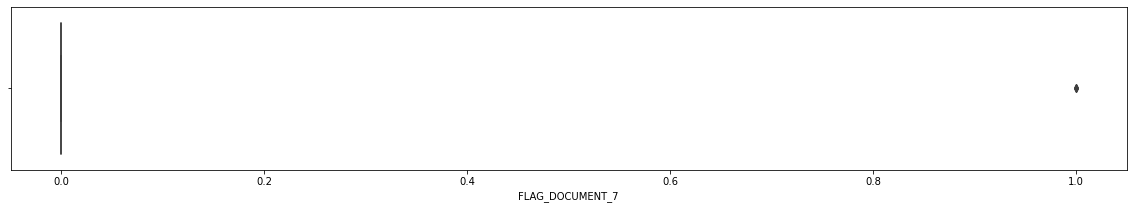

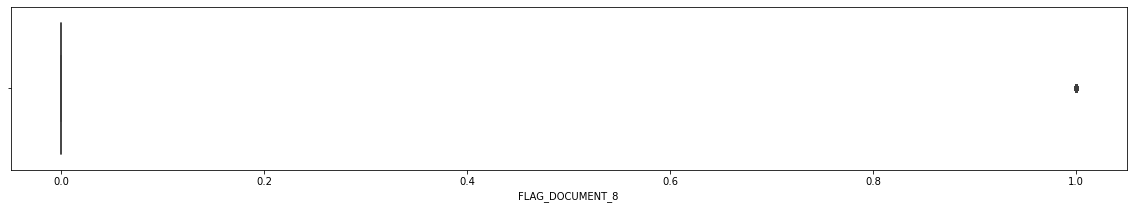

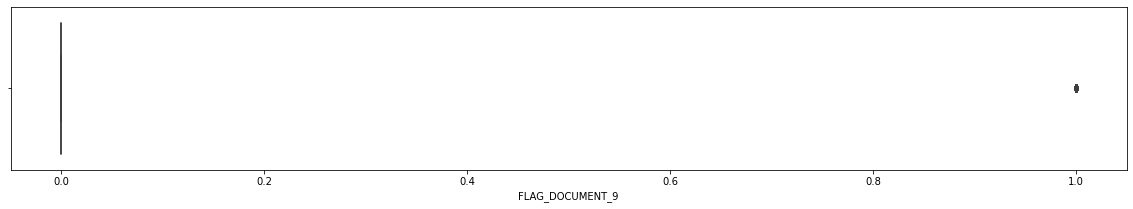

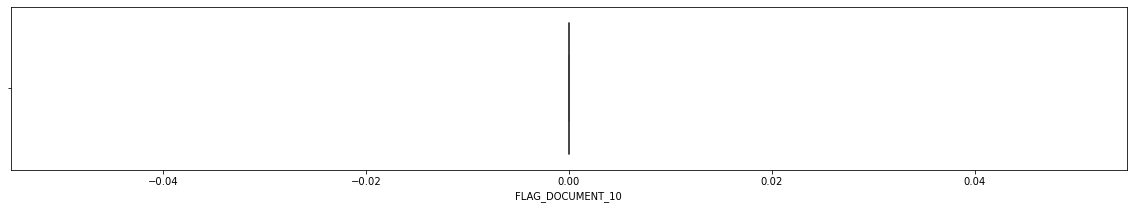

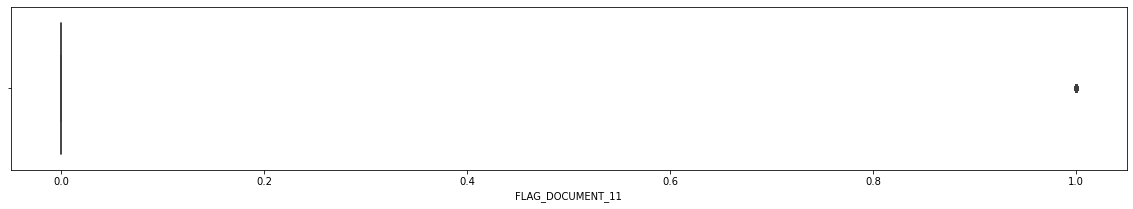

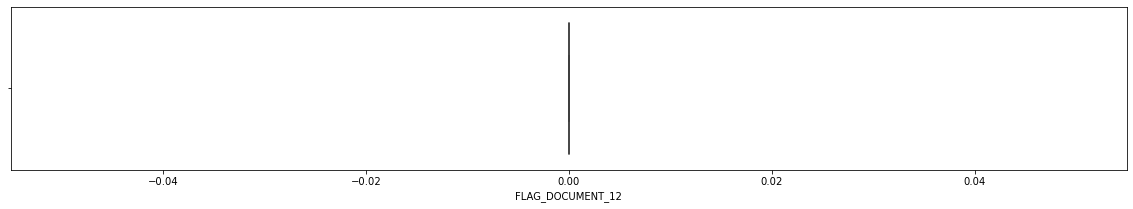

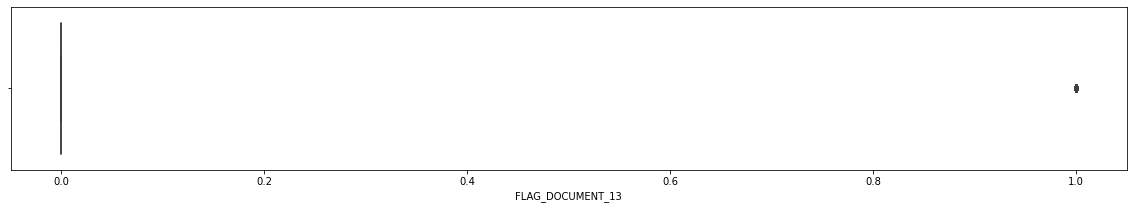

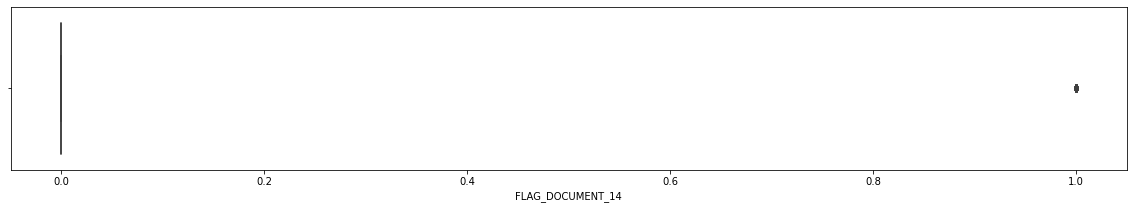

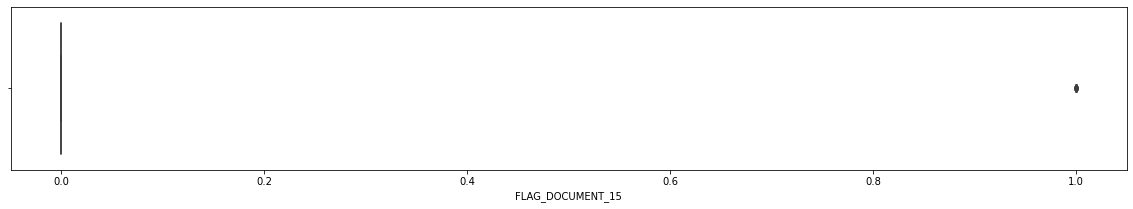

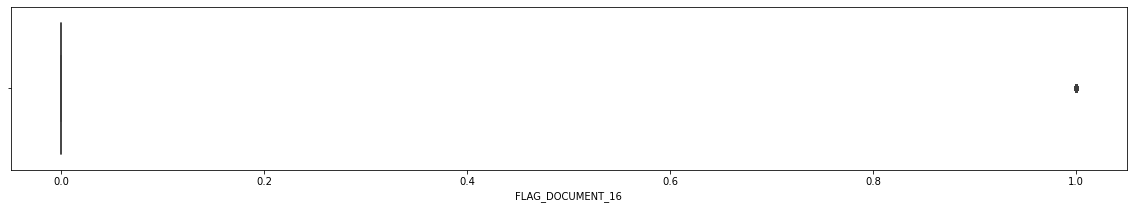

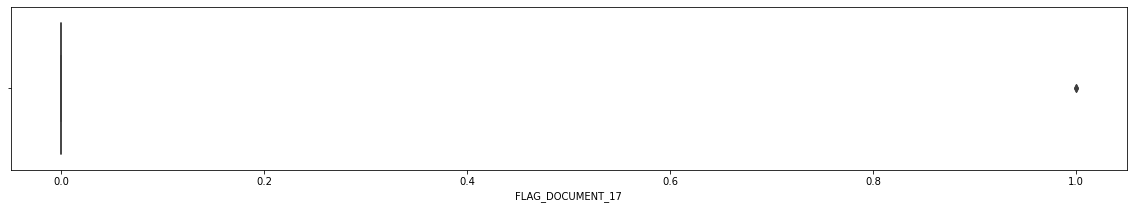

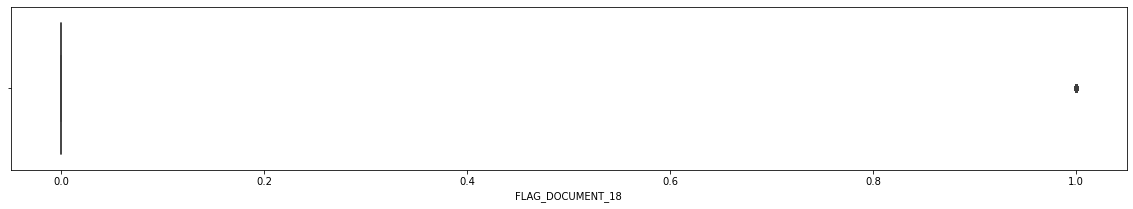

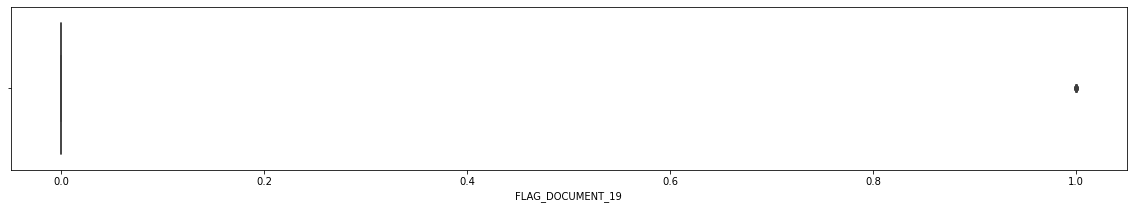

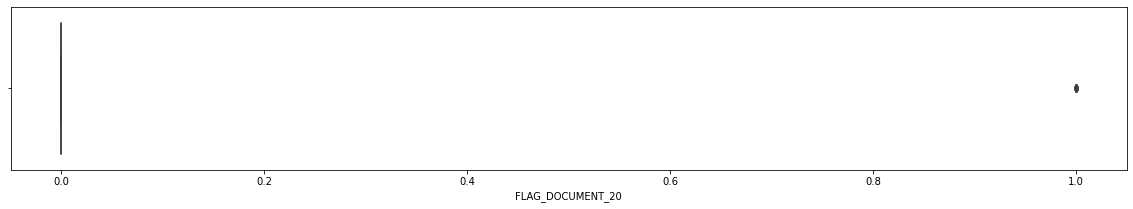

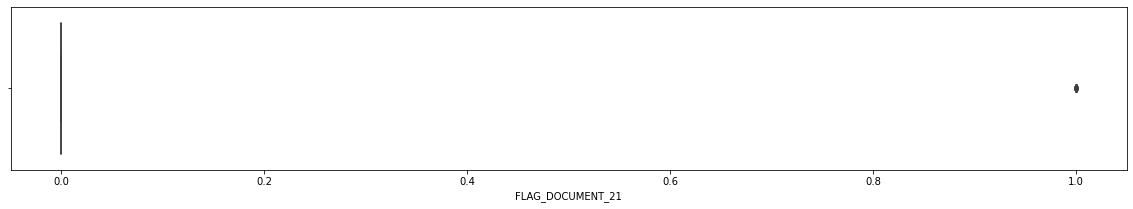

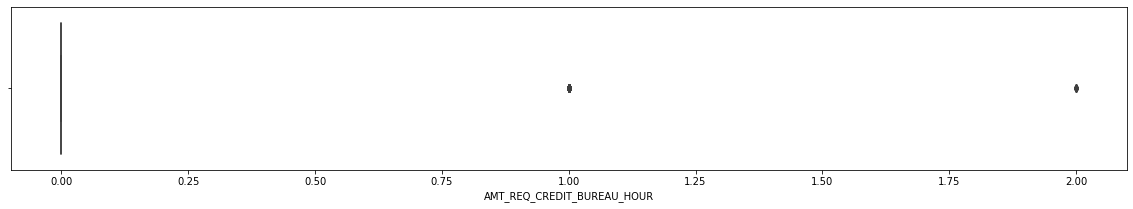

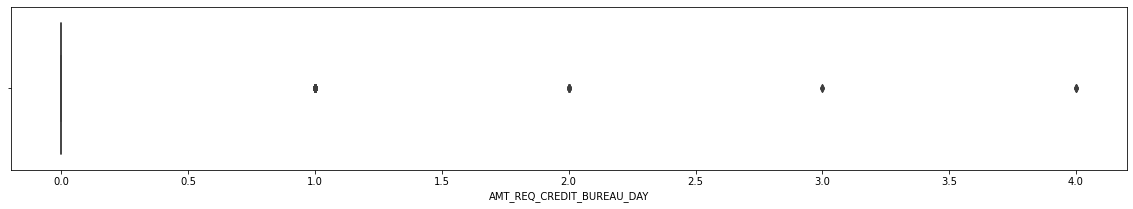

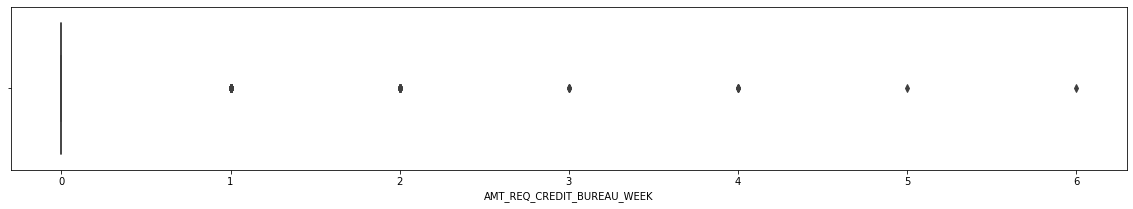

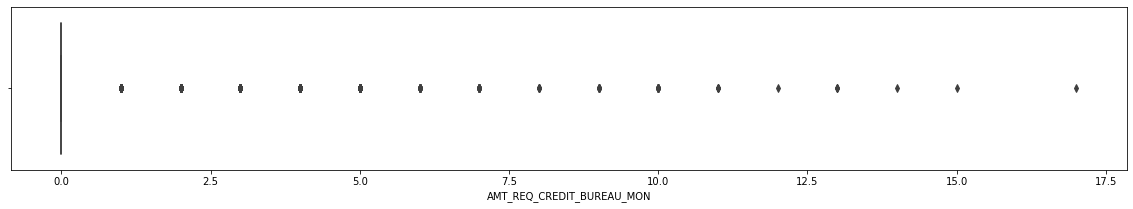

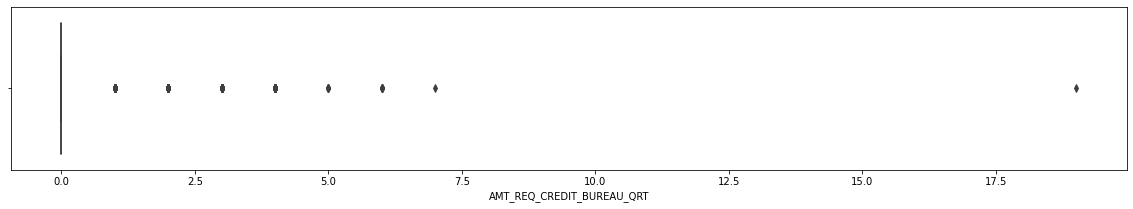

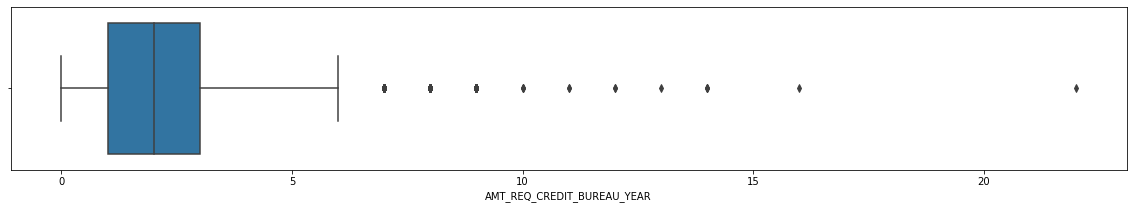

In [103]:
#For each numeric column in df_1 Dataframe draw a boxplot to perform univariate analysis
for column in num_cols:
    plt.figure(figsize=[20,3])
#     df_1.boxplot([column])
    sns.boxplot(df_1[column])
    plt.show()

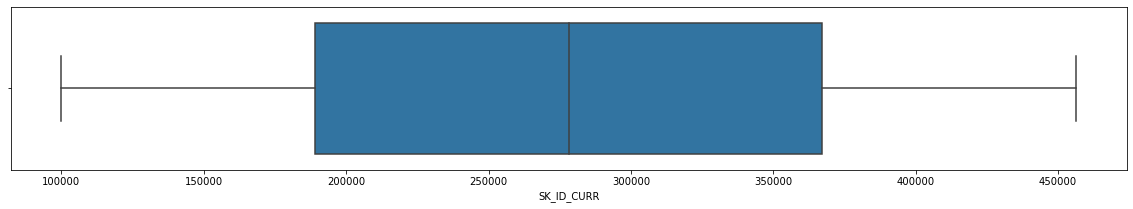

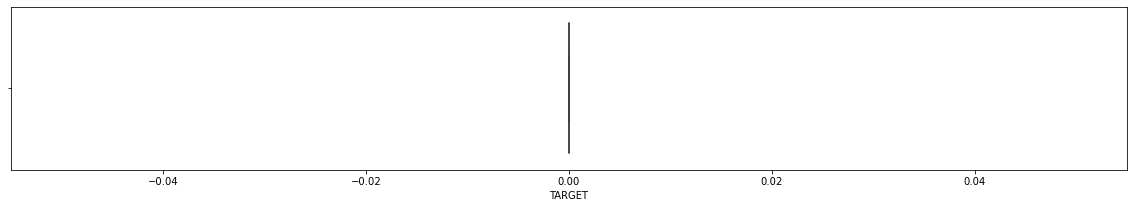

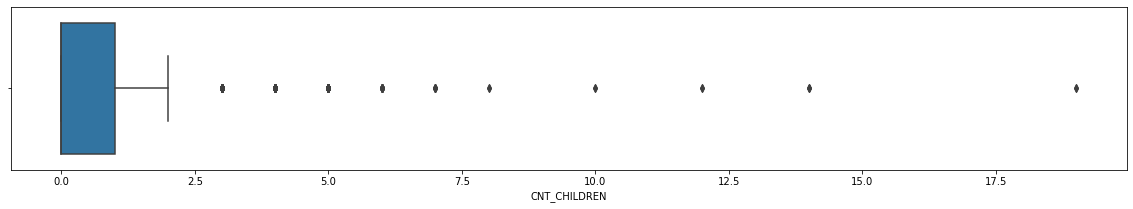

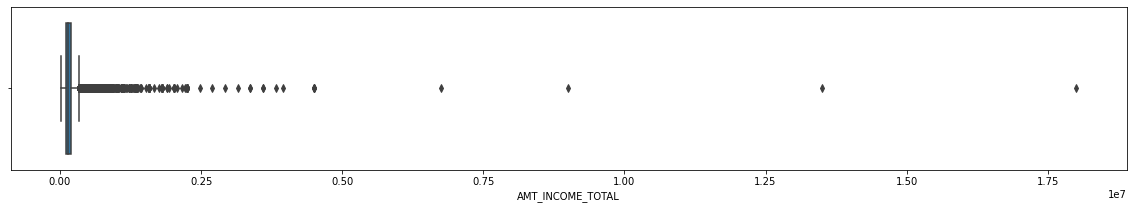

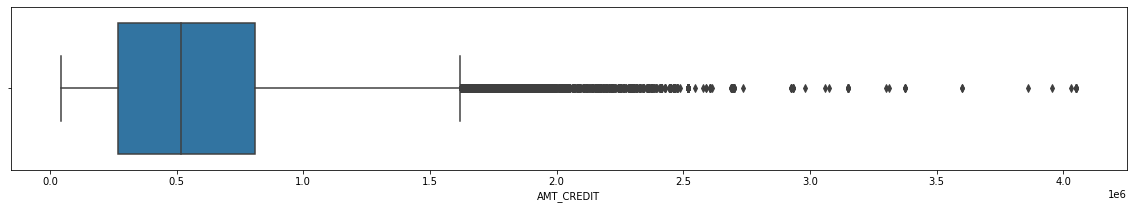

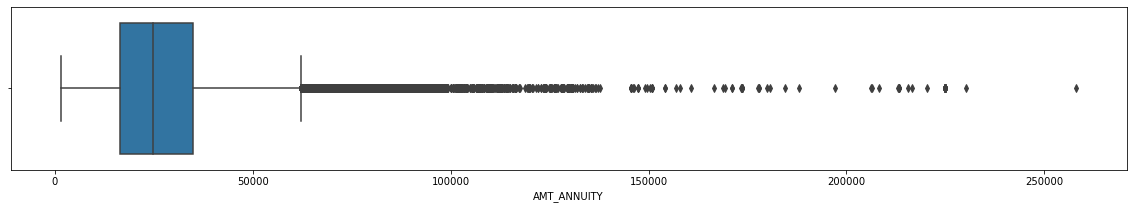

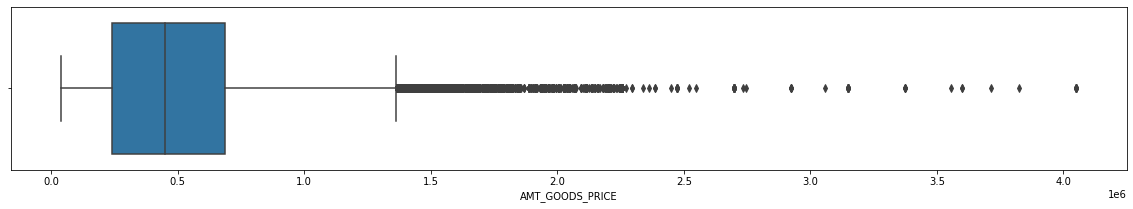

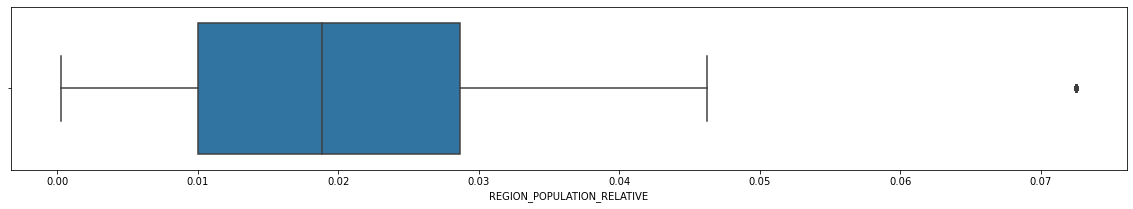

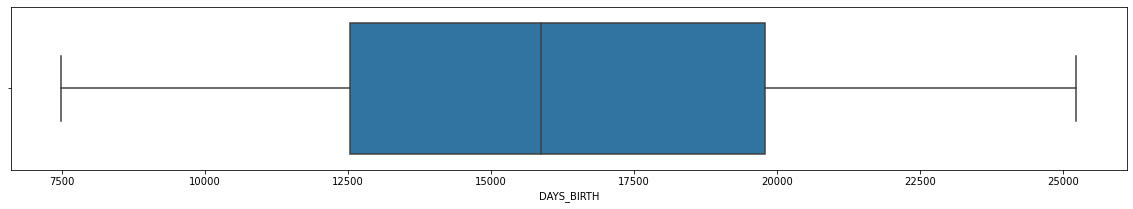

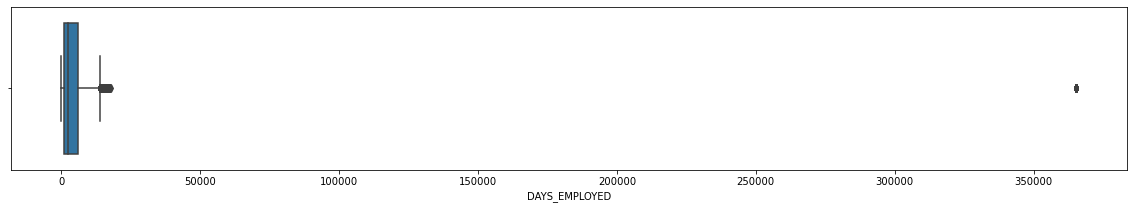

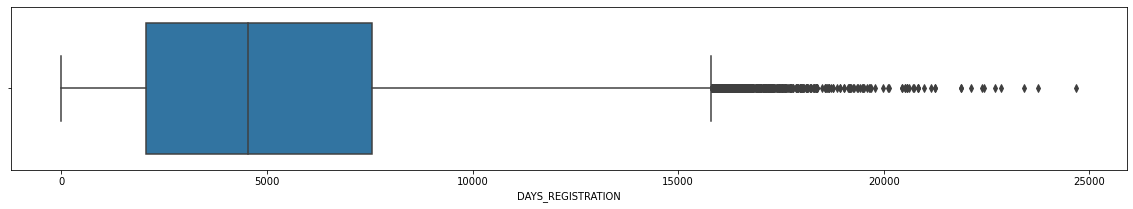

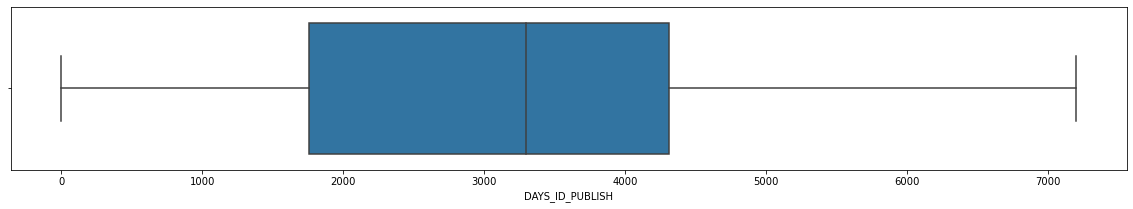

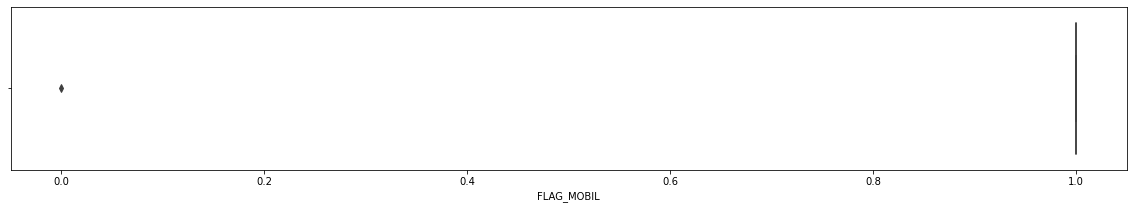

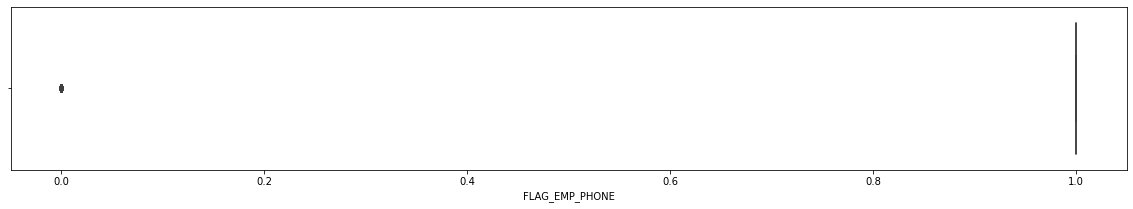

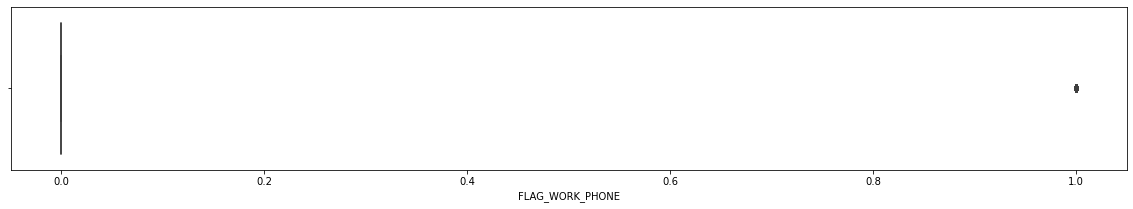

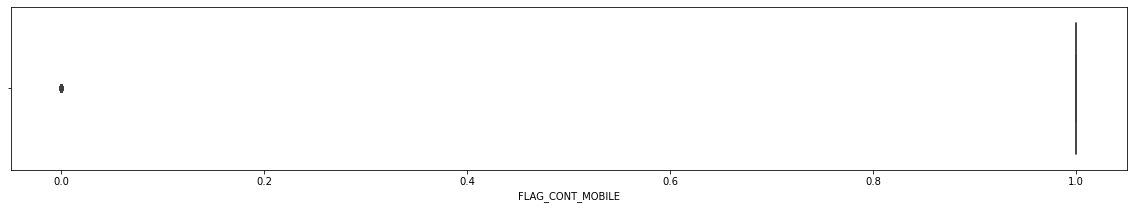

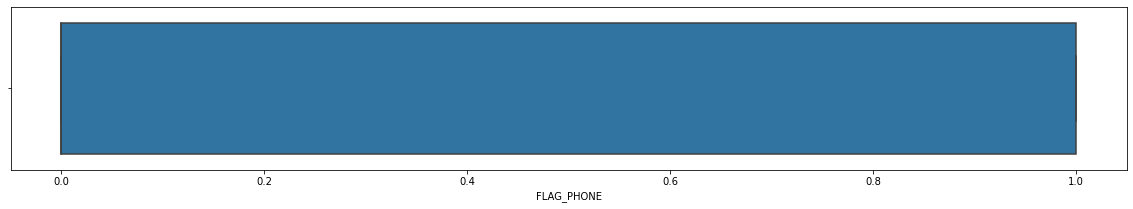

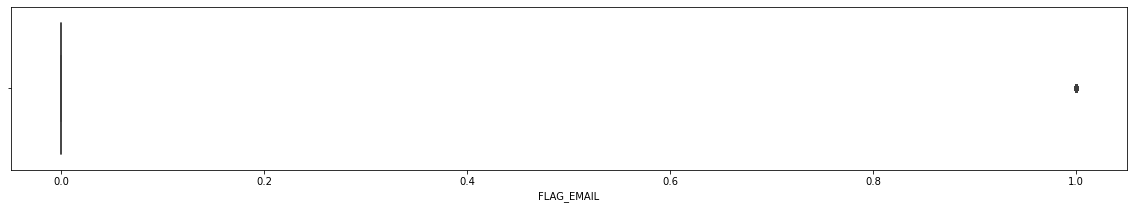

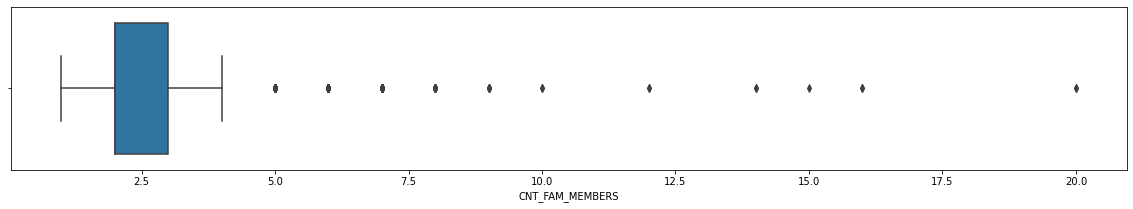

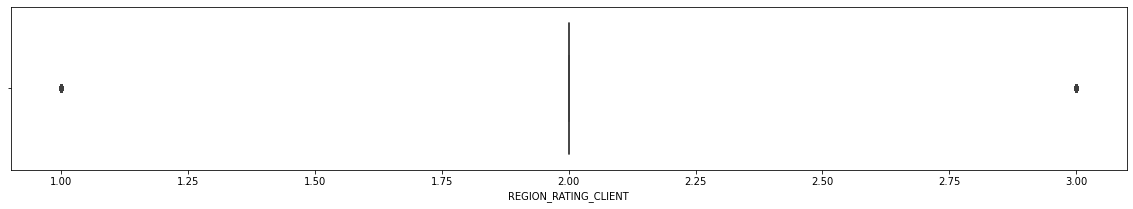

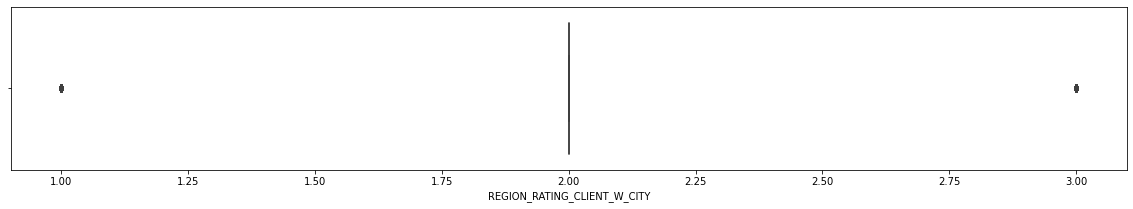

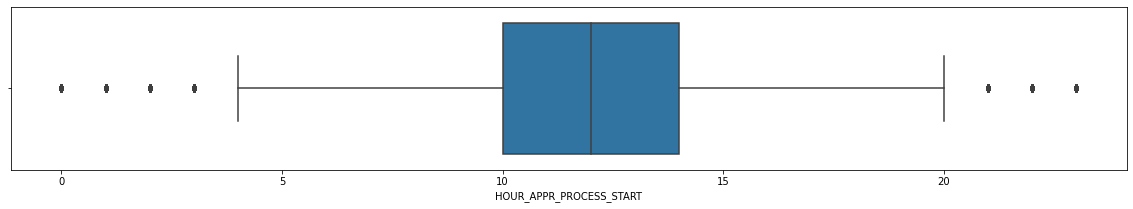

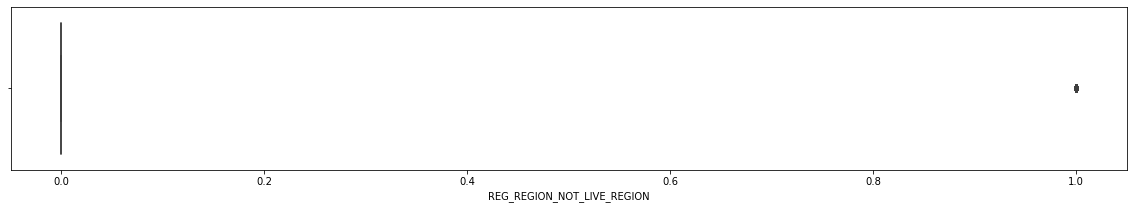

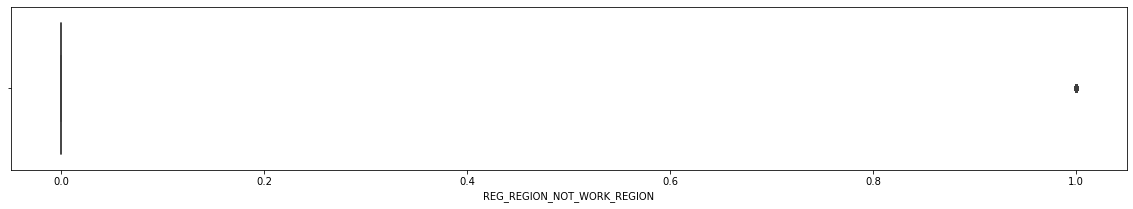

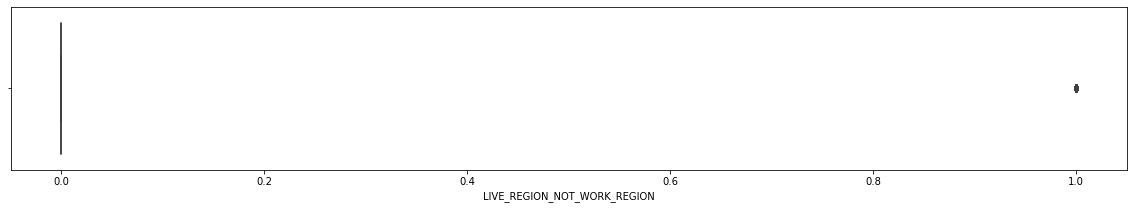

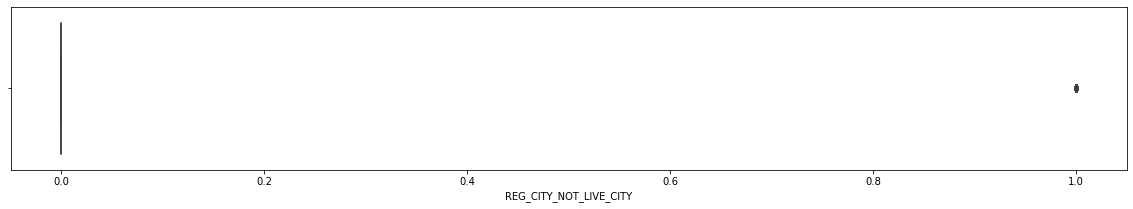

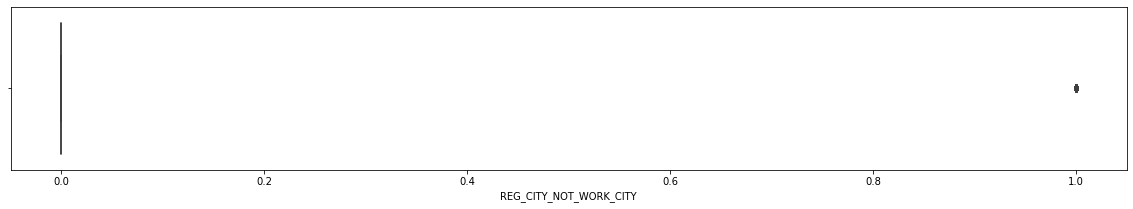

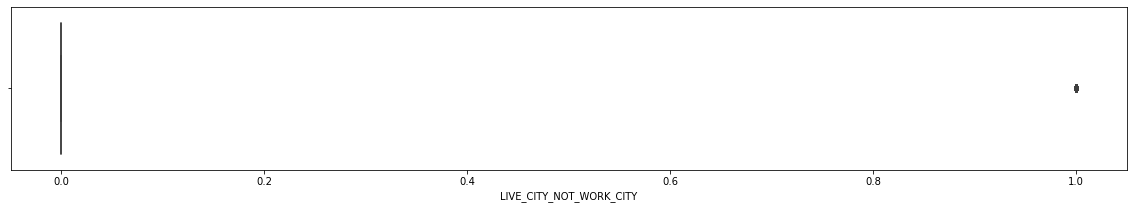

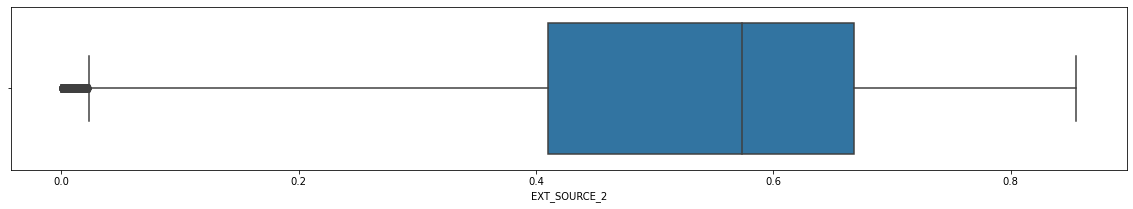

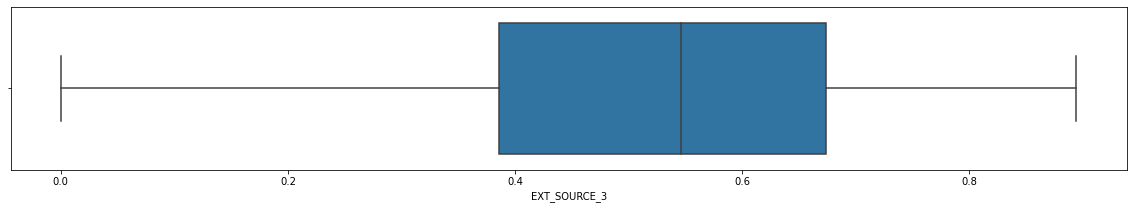

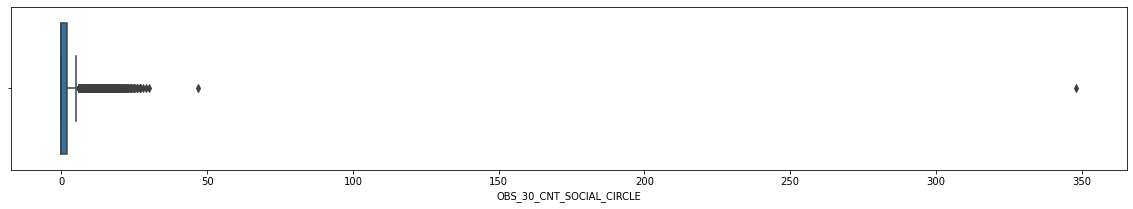

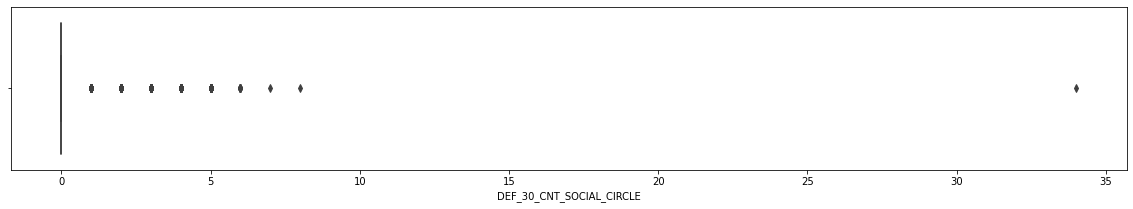

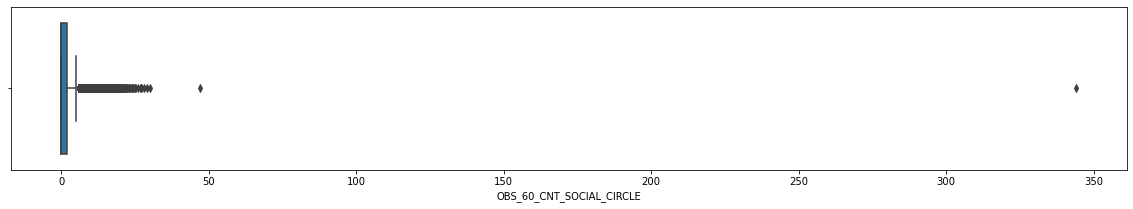

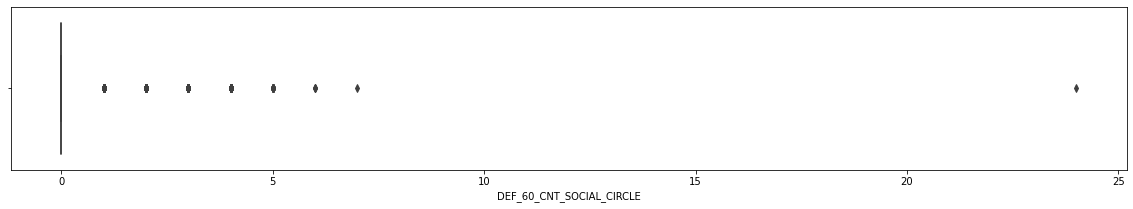

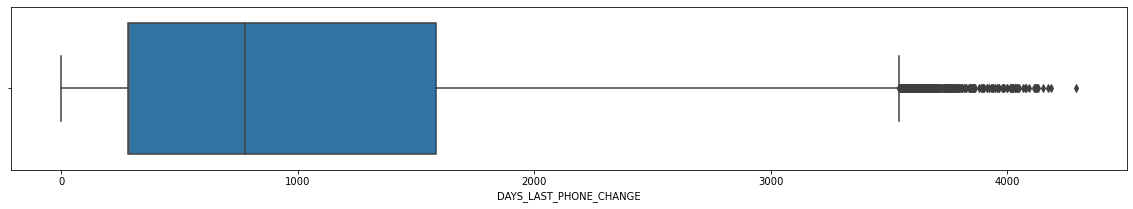

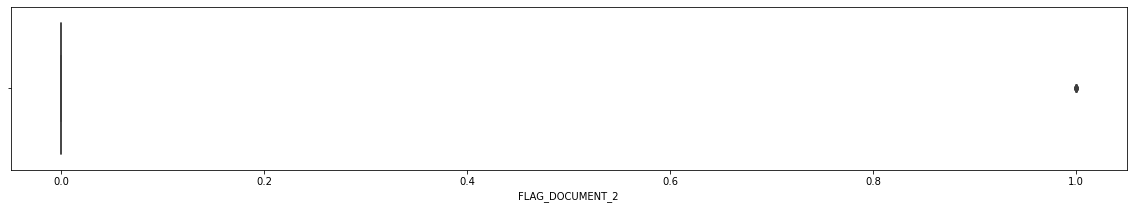

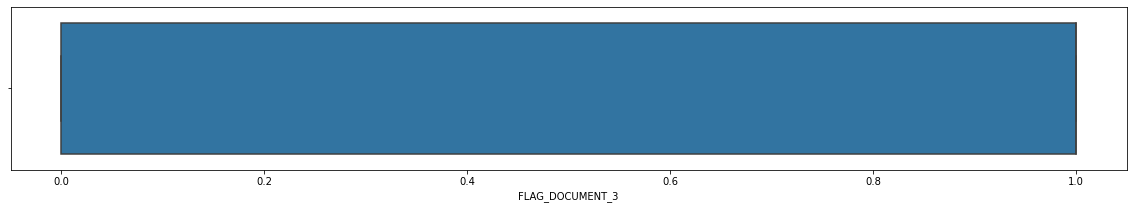

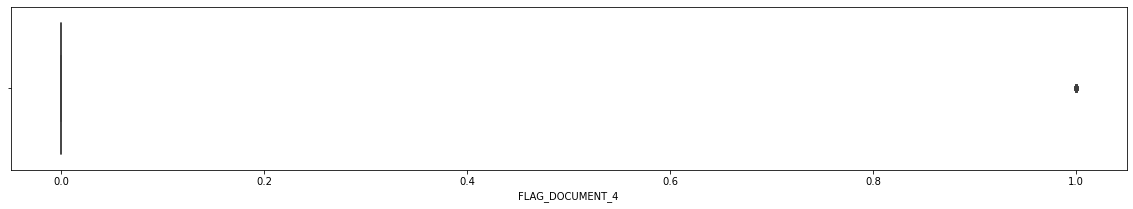

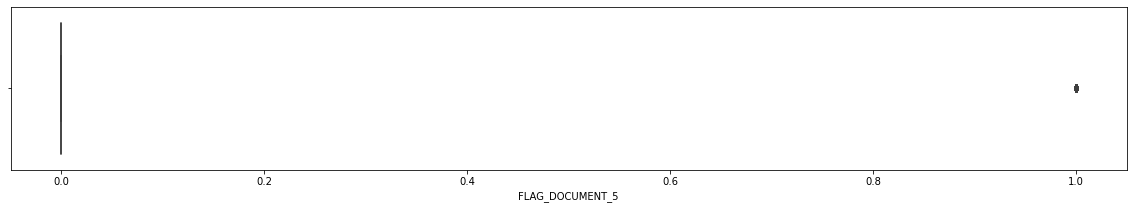

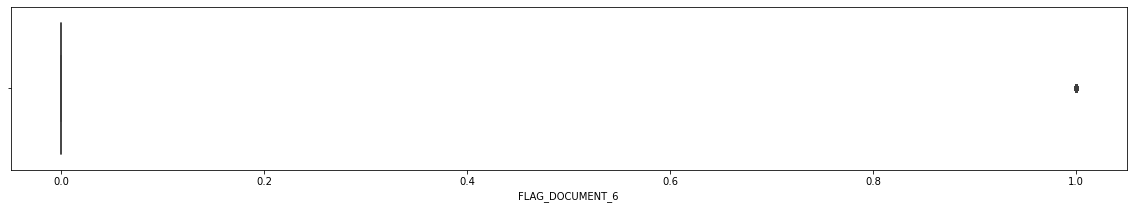

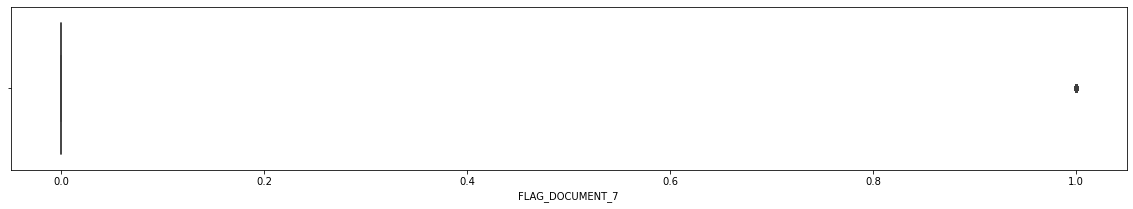

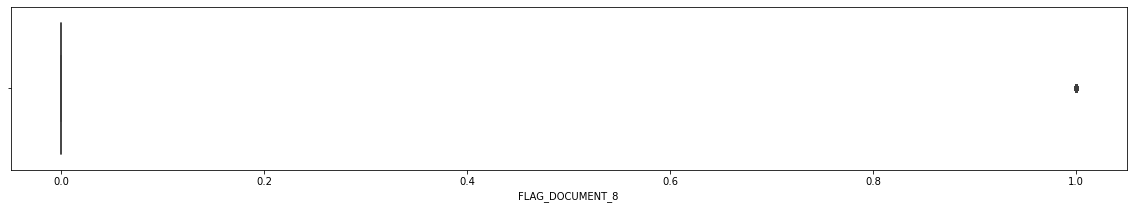

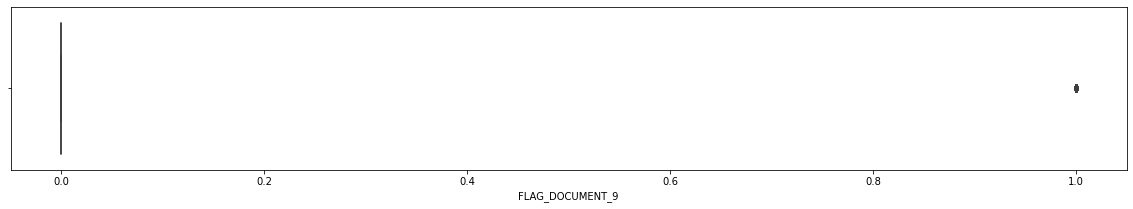

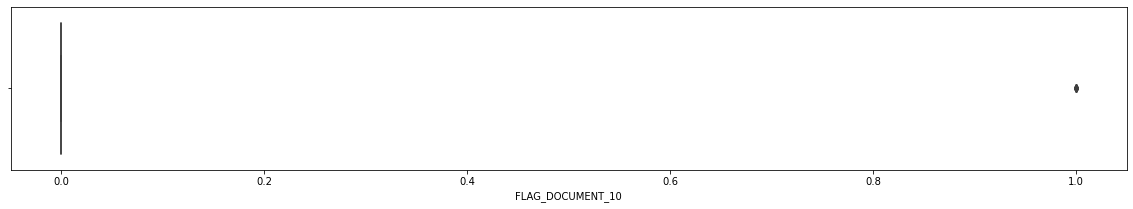

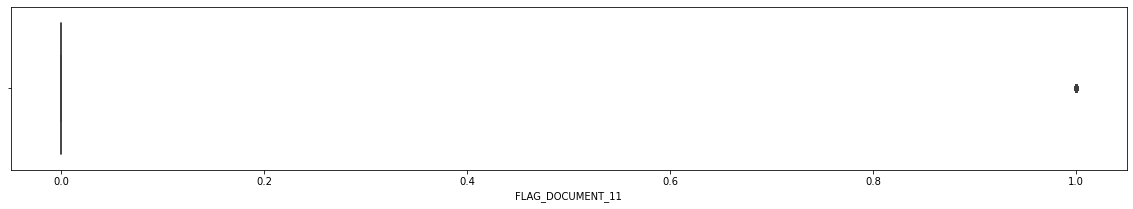

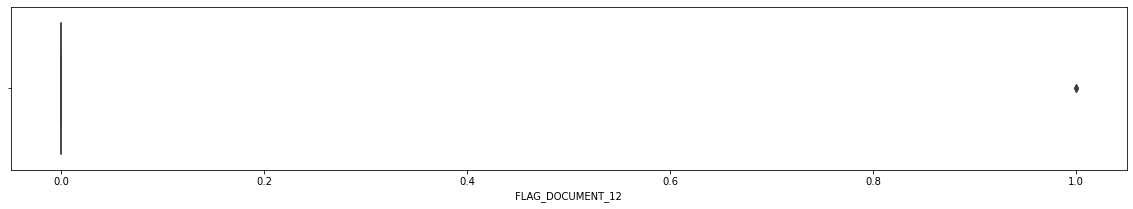

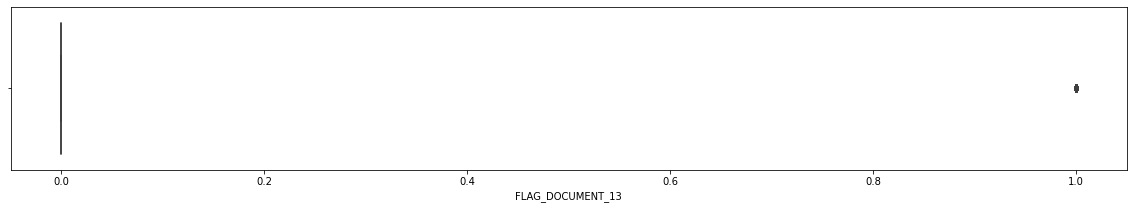

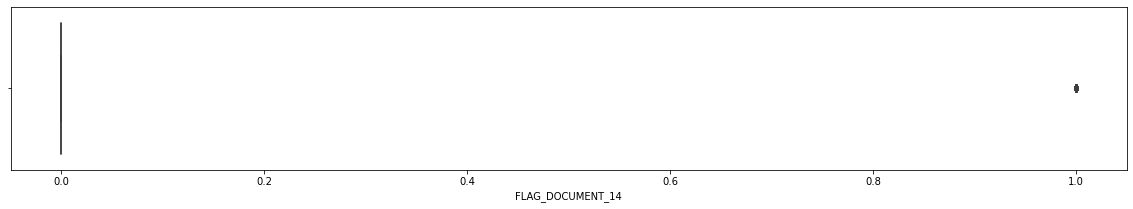

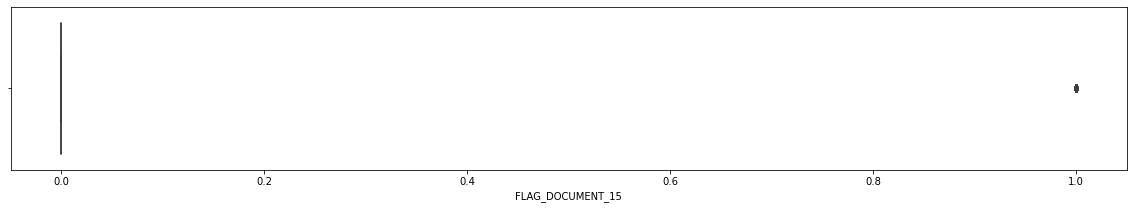

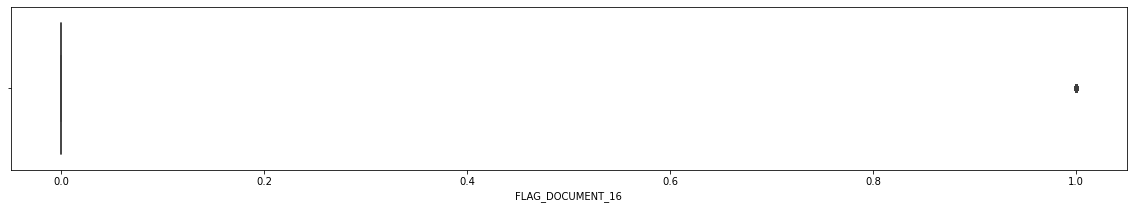

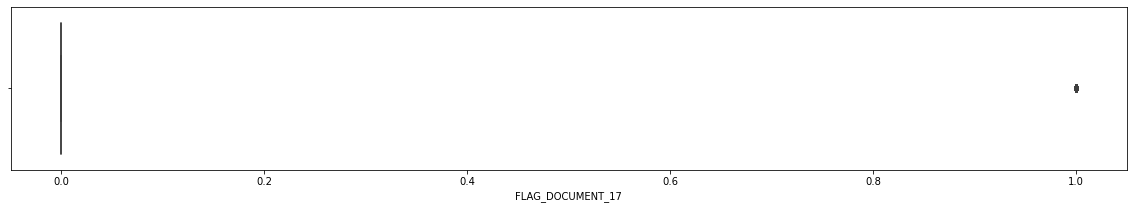

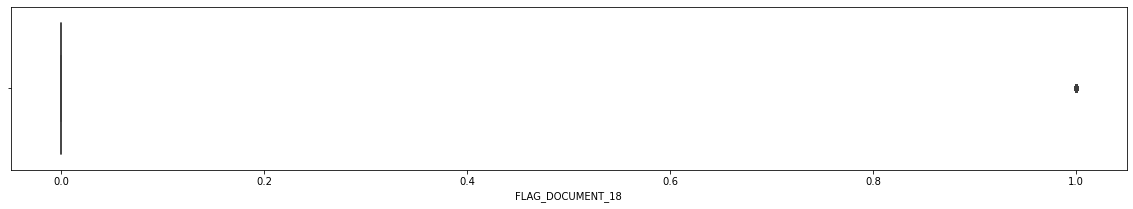

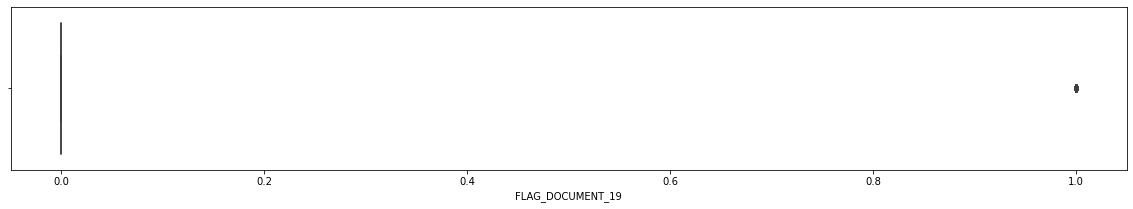

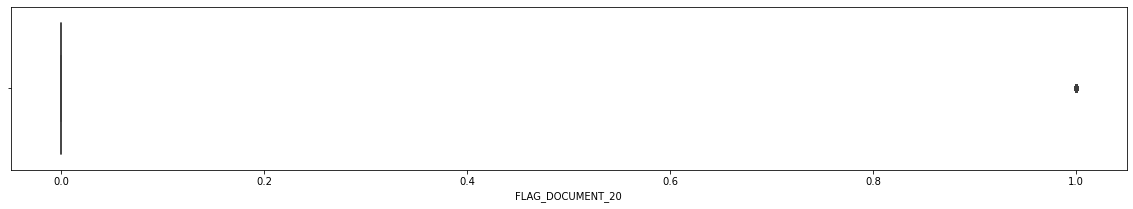

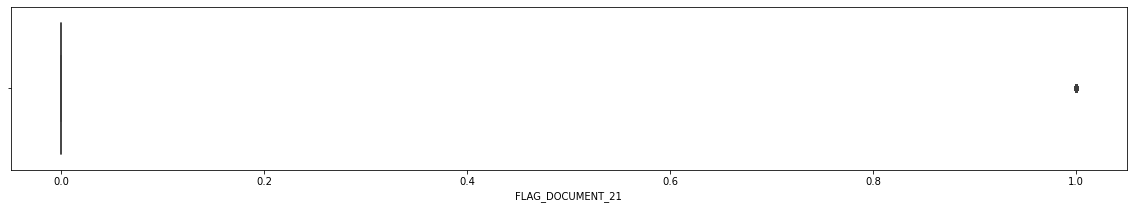

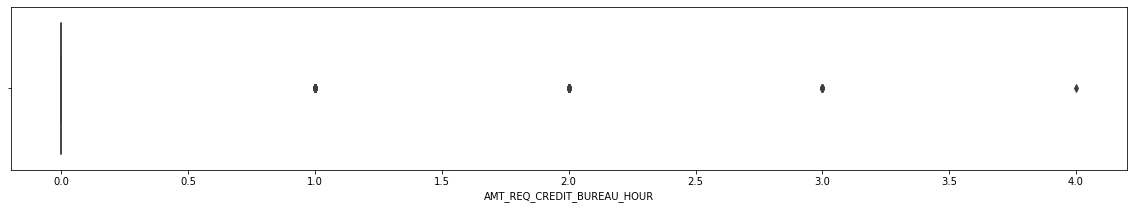

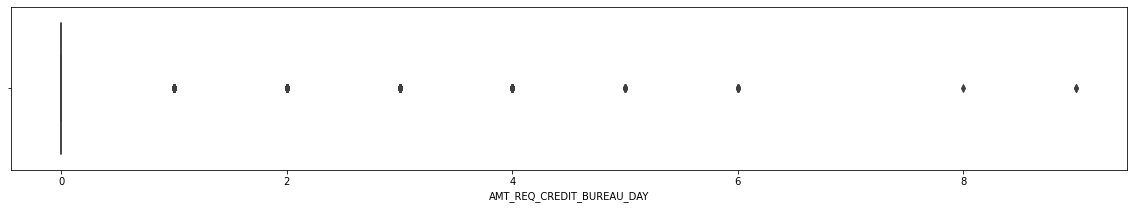

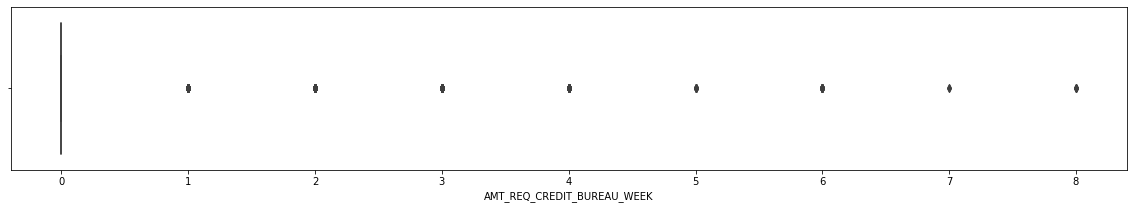

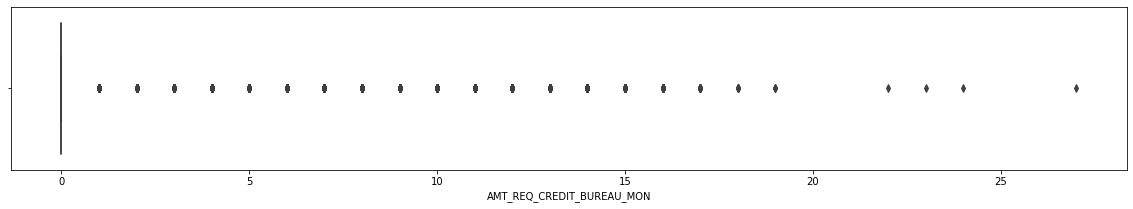

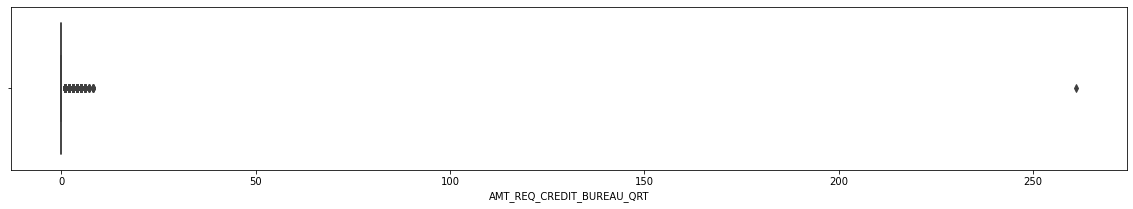

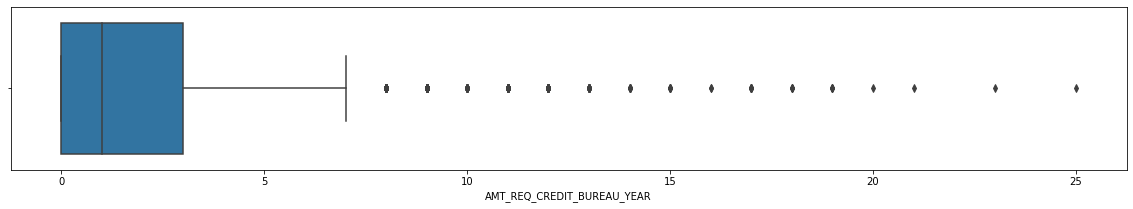

In [104]:
#For each numeric column in df_0 Dataframe draw a boxplot to perform univariate analysis
for column in num_cols:
    plt.figure(figsize=[20,3])
#     df_1.boxplot([column])
    sns.boxplot(df_0[column])
    plt.show()

## THAT COMPLETES UNIVARIATE ANALYSIS

Next lets perform bivariate analysis on both defaulter and non defaulter data sets and try to get more insights.

## Bivariate Analysis
### Numeric-Numeric Analysis:

#### Correlation Heatmaps and Pair Plots
Lets find the 5 most important Numeric Variables that play a deciding factor on defaulters vs non defaulters

In [105]:
print(num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [106]:
num_cols.shape

(61,)

In [107]:
#plot the correlation matrix of salary, balance and age in df_1 dataframe.
res=df_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED']].corr()
res

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL            1.000000          0.038131    0.046421      
AMT_CREDIT                  0.038131          1.000000    0.752195      
AMT_ANNUITY                 0.046421          0.752195    1.000000      
AMT_GOODS_PRICE             0.037583          0.983103    0.752699      
REGION_POPULATION_RELATIVE  0.009135          0.069161    0.071690      
DAYS_BIRTH                 -0.003096          0.135316    0.014303      
DAYS_EMPLOYED              -0.014977          0.001930   -0.081207      

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
AMT_INCOME_TOTAL            0.037583         0.009135                     
AMT_CREDIT                  0.983103         0.069161                     
AMT_ANNUITY                 0.752699         0.071690                     
AMT_GOODS_PRICE             1.000000         0.076049                     
REGION_POPULATION_RELATIVE  0.076049         1.000000                     
DAYS_BIRTH                  0.135810         0.048190                     
DAYS_EMPLOYED               0.006642         0.015532                     

                            DAYS_BIRTH  DAYS_EMPLOYED  
AMT_INCOME_TOTAL           -0.003096   -0.014977       
AMT_CREDIT                  0.135316    0.001930       
AMT_ANNUITY                 0.014303   -0.081207       
AMT_GOODS_PRICE             0.135810    0.006642       
REGION_POPULATION_RELATIVE  0.048190    0.015532       
DAYS_BIRTH                  1.000000    0.582185       
DAYS_EMPLOYED               0.582185    1.000000

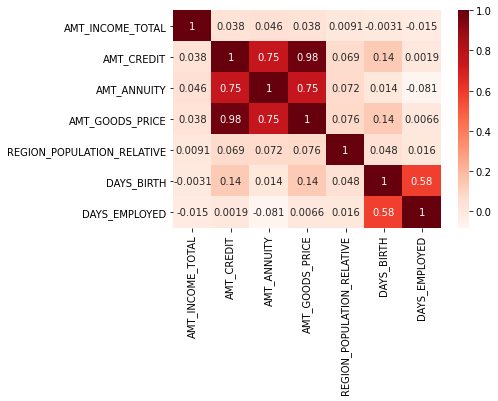

In [108]:
sns.heatmap(res, annot=True, cmap='Reds')
plt.show()

In [109]:
res=df_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']].corr()
res

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL            1.000000          0.038131    0.046421      
AMT_CREDIT                  0.038131          1.000000    0.752195      
AMT_ANNUITY                 0.046421          0.752195    1.000000      
AMT_GOODS_PRICE             0.037583          0.983103    0.752699      
REGION_POPULATION_RELATIVE  0.009135          0.069161    0.071690      

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  
AMT_INCOME_TOTAL            0.037583         0.009135                    
AMT_CREDIT                  0.983103         0.069161                    
AMT_ANNUITY                 0.752699         0.071690                    
AMT_GOODS_PRICE             1.000000         0.076049                    
REGION_POPULATION_RELATIVE  0.076049         1.000000

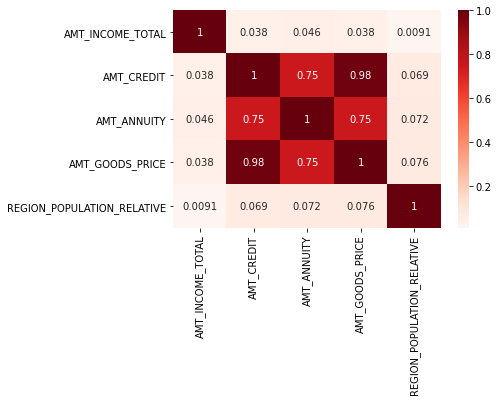

In [110]:
sns.heatmap(res, annot=True, cmap='Reds')
plt.show()

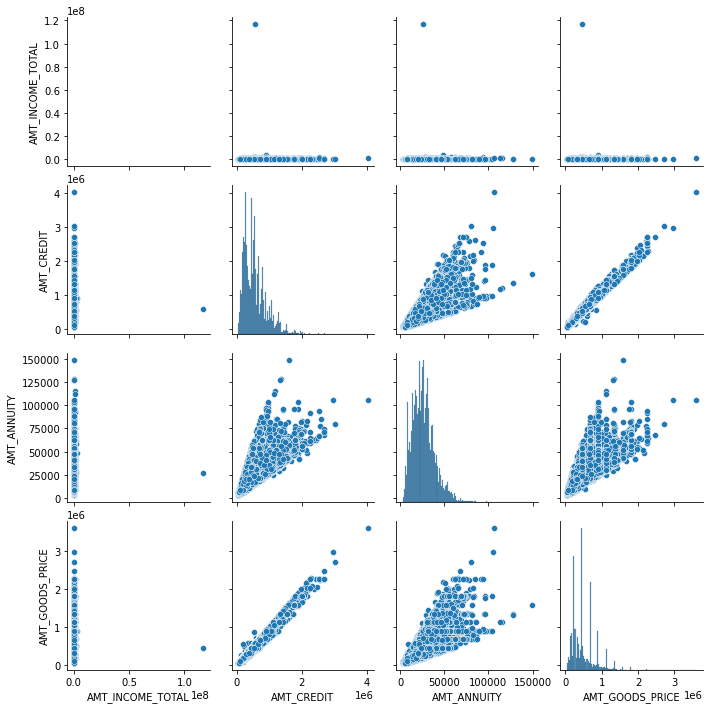

In [111]:
#plot the pair plot of 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' in df_1 dataframe.
sns.pairplot(data=df_1, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

#### INFERENCE For Defaulters:
From the above Heatmap and Pairplots we can draw the top 2 correlations. They are:
1. As AMT_CREDIT increases , the capacity to go for higher consumer loans(AMT_GOODS_PRICE) also increases.
2. As AMT_CREDIT increases, the 'AMT_ANNUITY' the capacity to go for higher installments in loan payback also increases.

#### The same above analysis now done for df_0 which is people who have not defaulted:

In [112]:
res=df_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']].corr()
res

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL            1.000000          0.342799    0.418953      
AMT_CREDIT                  0.342799          1.000000    0.771309      
AMT_ANNUITY                 0.418953          0.771309    1.000000      
AMT_GOODS_PRICE             0.349462          0.987250    0.776686      
REGION_POPULATION_RELATIVE  0.167851          0.100604    0.120988      

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  
AMT_INCOME_TOTAL            0.349462         0.167851                    
AMT_CREDIT                  0.987250         0.100604                    
AMT_ANNUITY                 0.776686         0.120988                    
AMT_GOODS_PRICE             1.000000         0.103827                    
REGION_POPULATION_RELATIVE  0.103827         1.000000

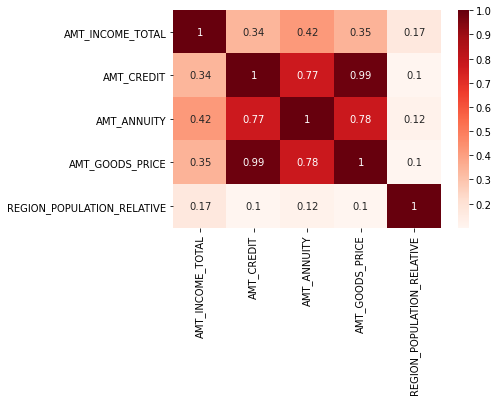

In [113]:
sns.heatmap(res, annot=True, cmap='Reds')
plt.show()

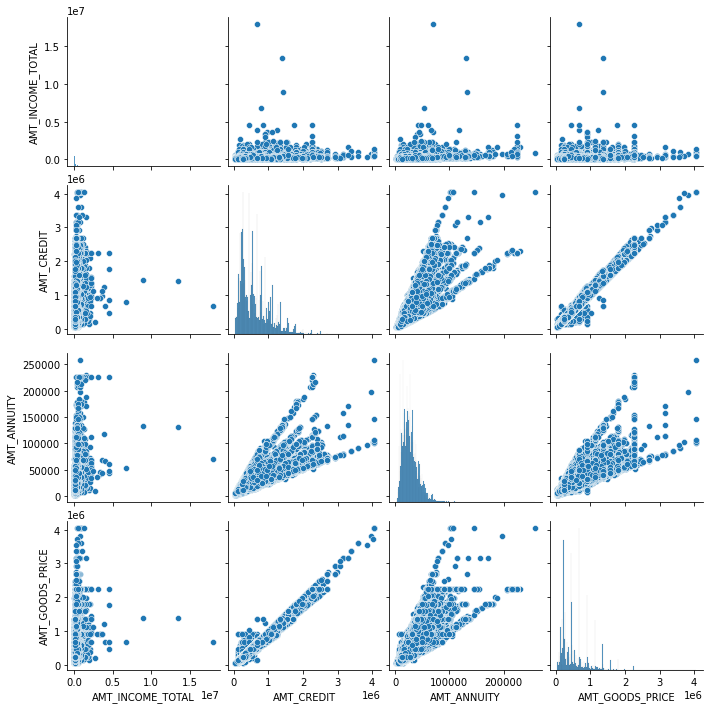

In [114]:
sns.pairplot(data=df_0, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

#### INFERENCE For Non Defaulters:
From the above Heatmap and Pairplots we can draw the top 3 correlations. They are:
1. As AMT_CREDIT increases , the capacity to go for higher consumer loans(AMT_GOODS_PRICE) also increases.
2. As AMT_CREDIT increases, the 'AMT_ANNUITY' the capacity to go for higher installments in loan payback also increases.
3. As AMT_INCOME_TOTAL increases, 'AMT_ANNUITY' and 'AMT_CREDIT' also increases.

#### We can see that correlation matrix values for both defaulters and non defaulters is the "Same"

### Categorical-Numeric Analysis:

In [115]:
####################################LOAD PREVIOUS DATA SET ########################################

In [116]:
# Load the previous application data and check for null values and drop the columns with >40% of null values
df_pd = pd.read_csv(r'./../data/raw/previous_application.csv')
df_pd.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0  2030495     271877      Consumer loans     1730.430     17145.0           
1  2802425     108129      Cash loans         25188.615    607500.0          
2  2523466     122040      Cash loans         15060.735    112500.0          
3  2819243     176158      Cash loans         47041.335    450000.0          
4  1784265     202054      Cash loans         31924.395    337500.0          

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0     0.0               17145.0          SATURDAY                    
1  679671.0   NaN                607500.0         THURSDAY                    
2  136444.5   NaN                112500.0         TUESDAY                     
3  470790.0   NaN                450000.0         MONDAY                      
4  404055.0   NaN                337500.0         THURSDAY                    

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0  15                       Y                            
1  11                       Y                            
2  11                       Y                            
3  7                        Y                            
4  9                        Y                            

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0  1                       0.0                0.182832                
1  1                      NaN                NaN                      
2  1                      NaN                NaN                      
3  1                      NaN                NaN                      
4  1                      NaN                NaN                      

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0  0.867336                  XAP                    Approved              
1 NaN                        XNA                    Approved              
2 NaN                        XNA                    Approved              
3 NaN                        XNA                    Approved              
4 NaN                        Repairs                Refused               

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0 -73             Cash through the bank  XAP                NaN               
1 -164            XNA                    XAP                Unaccompanied     
2 -301            Cash through the bank  XAP                Spouse, partner   
3 -512            Cash through the bank  XAP                NaN               
4 -781            Cash through the bank  HC                 NaN               

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0  Repeater         Mobile              POS            XNA                
1  Repeater         XNA                 Cash           x-sell             
2  Repeater         XNA                 Cash           x-sell             
3  Repeater         XNA                 Cash           x-sell             
4  Repeater         XNA                 Cash           walk-in            

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Country-wide             35                Connectivity          
1  Contact center          -1                 XNA                   
2  Credit and cash offices -1                 XNA                   
3  Credit and cash offices -1                 XNA                   
4  Credit and cash offices -1                 XNA                   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0  12.0         middle           POS mobile with interest  365243.0             
1  36.0         low_action       Cash X-Sell: low          365243.0             
2  12.0         high             Cash X-Sell: high         365243.0             
3  12.0         middle           Cash X-Sell: middle       365243.0             
4  24.0         high             Cash Street: high        NaN                   

   D

In [117]:
# Checking for null values and percentage null values in previous application dataset

percent_missing = df_pd.isnull().sum() * 100 / len(df_pd)
missing_value_df_pd = pd.DataFrame({'column_name': df_pd.columns, 'No of Nulls':df_pd.isnull().sum(),'percent_missing': percent_missing})
missing_value_df_pd.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df_pd

column_name  No of Nulls  \
RATE_INTEREST_PRIVILEGED     RATE_INTEREST_PRIVILEGED     1664263       
RATE_INTEREST_PRIMARY        RATE_INTEREST_PRIMARY        1664263       
AMT_DOWN_PAYMENT             AMT_DOWN_PAYMENT             895844        
RATE_DOWN_PAYMENT            RATE_DOWN_PAYMENT            895844        
NAME_TYPE_SUITE              NAME_TYPE_SUITE              820405        
NFLAG_INSURED_ON_APPROVAL    NFLAG_INSURED_ON_APPROVAL    673065        
DAYS_TERMINATION             DAYS_TERMINATION             673065        
DAYS_LAST_DUE                DAYS_LAST_DUE                673065        
DAYS_LAST_DUE_1ST_VERSION    DAYS_LAST_DUE_1ST_VERSION    673065        
DAYS_FIRST_DUE               DAYS_FIRST_DUE               673065        
DAYS_FIRST_DRAWING           DAYS_FIRST_DRAWING           673065        
AMT_GOODS_PRICE              AMT_GOODS_PRICE              385515        
AMT_ANNUITY                  AMT_ANNUITY                  372235        
CNT_PAYMENT                  CNT_PAYMENT                  372230        
PRODUCT_COMBINATION          PRODUCT_COMBINATION          346           
AMT_CREDIT                   AMT_CREDIT                   1             
NAME_YIELD_GROUP             NAME_YIELD_GROUP             0             
NAME_PORTFOLIO               NAME_PORTFOLIO               0             
NAME_SELLER_INDUSTRY         NAME_SELLER_INDUSTRY         0             
SELLERPLACE_AREA             SELLERPLACE_AREA             0             
CHANNEL_TYPE                 CHANNEL_TYPE                 0             
NAME_PRODUCT_TYPE            NAME_PRODUCT_TYPE            0             
SK_ID_PREV                   SK_ID_PREV                   0             
NAME_GOODS_CATEGORY          NAME_GOODS_CATEGORY          0             
NAME_CLIENT_TYPE             NAME_CLIENT_TYPE             0             
CODE_REJECT_REASON           CODE_REJECT_REASON           0             
SK_ID_CURR                   SK_ID_CURR                   0             
DAYS_DECISION                DAYS_DECISION                0             
NAME_CONTRACT_STATUS         NAME_CONTRACT_STATUS         0             
NAME_CASH_LOAN_PURPOSE       NAME_CASH_LOAN_PURPOSE       0             
NFLAG_LAST_APPL_IN_DAY       NFLAG_LAST_APPL_IN_DAY       0             
FLAG_LAST_APPL_PER_CONTRACT  FLAG_LAST_APPL_PER_CONTRACT  0             
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START      0             
WEEKDAY_APPR_PROCESS_START   WEEKDAY_APPR_PROCESS_START   0             
AMT_APPLICATION              AMT_APPLICATION              0             
NAME_CONTRACT_TYPE           NAME_CONTRACT_TYPE           0             
NAME_PAYMENT_TYPE            NAME_PAYMENT_TYPE            0             

                             percent_missing  
RATE_INTEREST_PRIVILEGED     99.643698        
RATE_INTEREST_PRIMARY        99.643698        
AMT_DOWN_PAYMENT             53.636480        
RATE_DOWN_PAYMENT            53.636480        
NAME_TYPE_SUITE              49.119754        
NFLAG_INSURED_ON_APPROVAL    40.298129        
DAYS_TERMINATION             40.298129        
DAYS_LAST_DUE                40.298129        
DAYS_LAST_DUE_1ST_VERSION    40.298129        
DAYS_FIRST_DUE               40.298129        
DAYS_FIRST_DRAWING           40.298129        
AMT_GOODS_PRICE              23.081773        
AMT_ANNUITY                  22.286665        
CNT_PAYMENT                  22.286366        
PRODUCT_COMBINATION          0.020716         
AMT_CREDIT                   0.000060         
NAME_YIELD_GROUP             0.000000         
NAME_PORTFOLIO               0.000000         
NAME_SELLER_INDUSTRY         0.000000         
SELLERPLACE_AREA             0.000000         
CHANNEL_TYPE                 0.000000         
NAME_PRODUCT_TYPE            0.000000         
SK_ID_PREV                   0.000000         
NAME_GOODS_CATEGORY          0.000000         
NAME_CLIENT_TYPE             0.000000         
CODE_REJECT_REASON           0.000000         
S

In [118]:
missing_value_df_pd.shape

(37, 3)

In [119]:
#Obtain records(dataframe) columns which have greater than or equal to 45% null values and drop them for further analysis.
missing_value_40_df_pd=missing_value_df_pd[missing_value_df_pd.percent_missing>=40]
missing_value_40_df_pd

column_name  No of Nulls  \
RATE_INTEREST_PRIVILEGED   RATE_INTEREST_PRIVILEGED   1664263       
RATE_INTEREST_PRIMARY      RATE_INTEREST_PRIMARY      1664263       
AMT_DOWN_PAYMENT           AMT_DOWN_PAYMENT           895844        
RATE_DOWN_PAYMENT          RATE_DOWN_PAYMENT          895844        
NAME_TYPE_SUITE            NAME_TYPE_SUITE            820405        
NFLAG_INSURED_ON_APPROVAL  NFLAG_INSURED_ON_APPROVAL  673065        
DAYS_TERMINATION           DAYS_TERMINATION           673065        
DAYS_LAST_DUE              DAYS_LAST_DUE              673065        
DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE_1ST_VERSION  673065        
DAYS_FIRST_DUE             DAYS_FIRST_DUE             673065        
DAYS_FIRST_DRAWING         DAYS_FIRST_DRAWING         673065        

                           percent_missing  
RATE_INTEREST_PRIVILEGED   99.643698        
RATE_INTEREST_PRIMARY      99.643698        
AMT_DOWN_PAYMENT           53.636480        
RATE_DOWN_PAYMENT          53.636480        
NAME_TYPE_SUITE            49.119754        
NFLAG_INSURED_ON_APPROVAL  40.298129        
DAYS_TERMINATION           40.298129        
DAYS_LAST_DUE              40.298129        
DAYS_LAST_DUE_1ST_VERSION  40.298129        
DAYS_FIRST_DUE             40.298129        
DAYS_FIRST_DRAWING         40.298129

In [120]:
# no of columns to be dropped.
missing_value_40_df_pd.shape

(11, 3)

In [121]:
df_pd.shape

(1670214, 37)

In [122]:
#Code to drop columns which have missing percentage greater than or equal to 40%
toRemove = set()
percent_missing = (df_pd.isnull().sum() * 100 / len(df_pd) )
for i in percent_missing.index:
    if(percent_missing[i]>=40):
         toRemove.add(i)
for i in toRemove:
    df_pd.drop(i, axis=1, inplace=True)

In [123]:
#Note no of columns reduce from 37 to 26(37-26=11)
df_pd.shape

(1670214, 26)

### Check for outliers in all numeric columns in Previous Application Data set----->

In [124]:
# Find columns with numeric dtypes and store in variable which is a column list, used to subset and get a new dataframe
num_cols_pd = df_pd.select_dtypes([np.number]).columns
print (num_cols_pd)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')


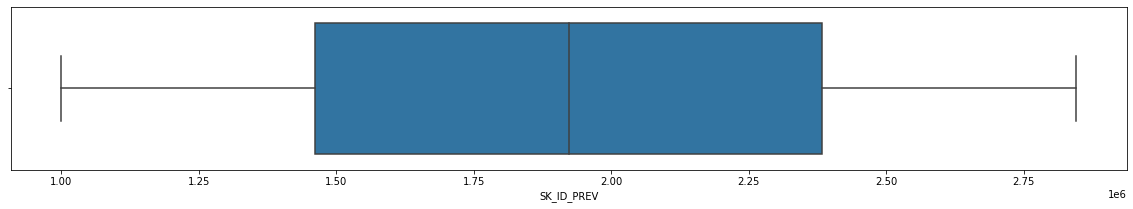

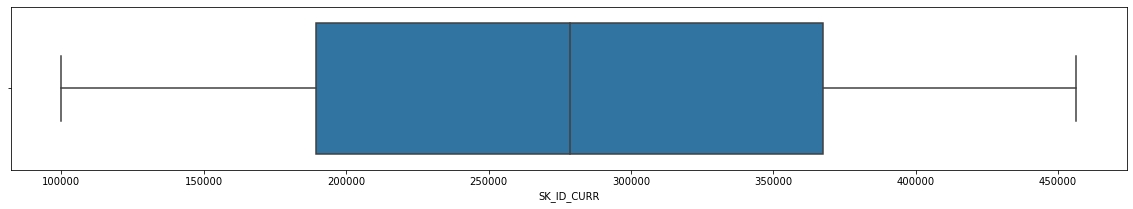

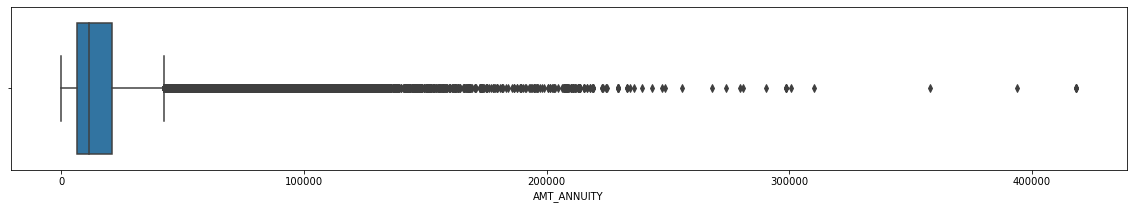

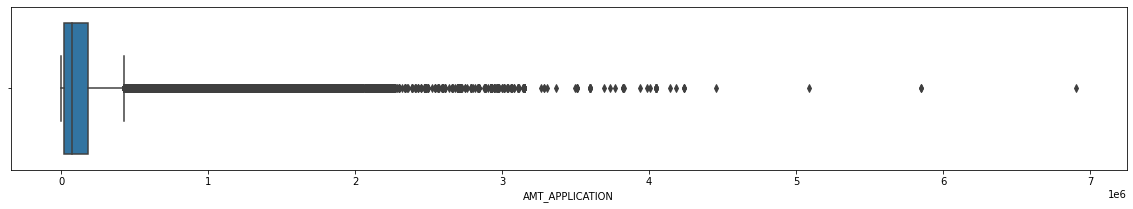

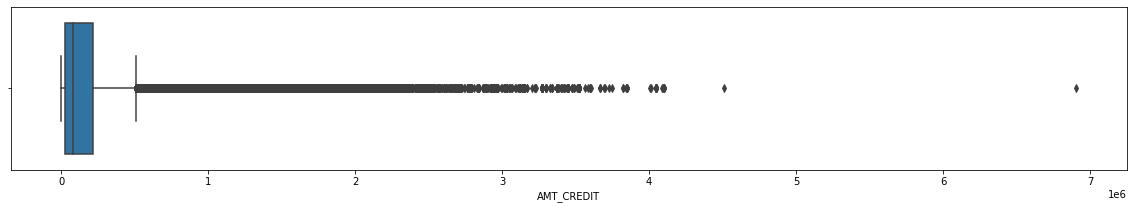

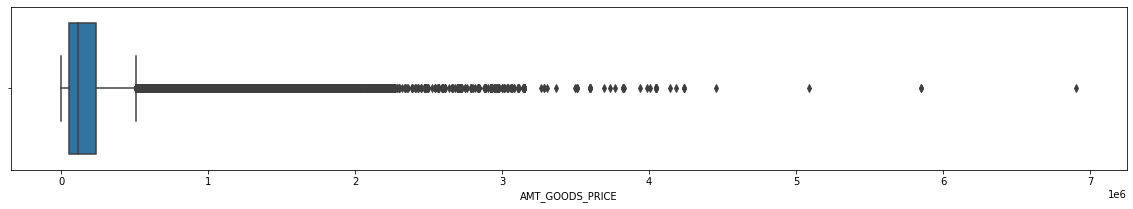

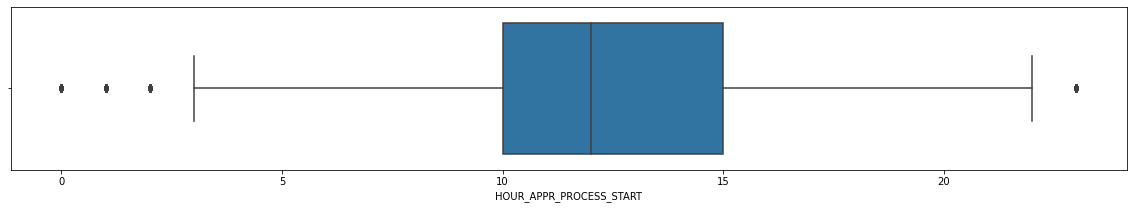

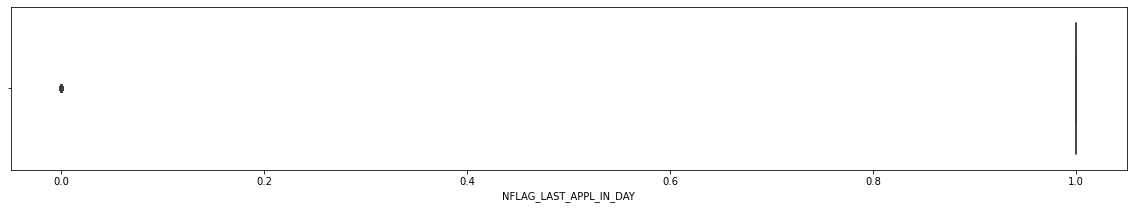

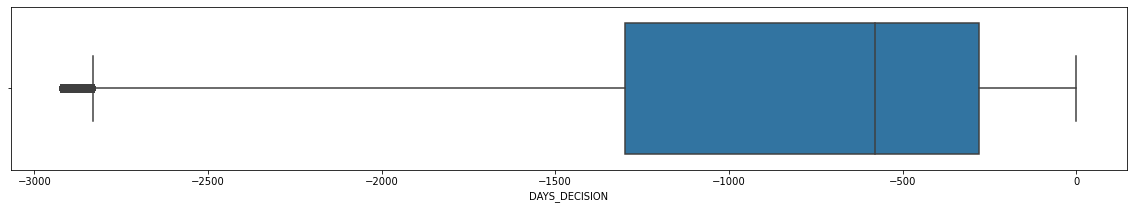

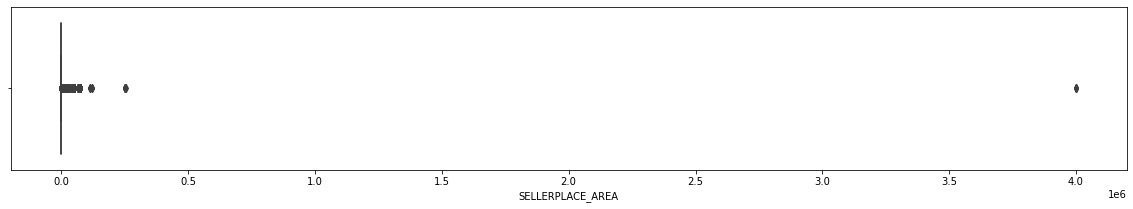

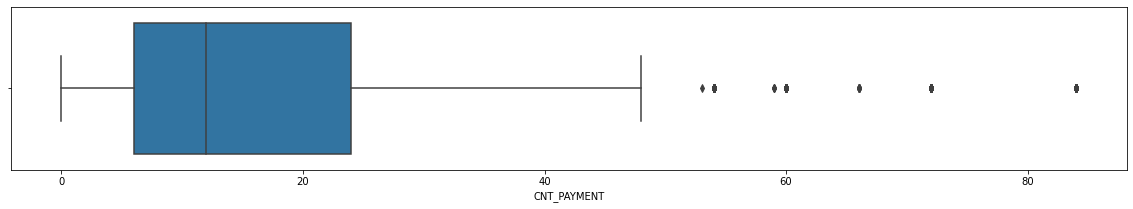

In [125]:
#For each numeric column in 'df_pd' dataframe draw a boxplot:
for column in num_cols_pd:
    plt.figure(figsize=[20,3])
#     df_ad.boxplot([column])
    sns.boxplot(df_pd[column])
    plt.show()

### Inference for Outliers using Box Plots In Previous Data Set- and Reporting Them
1. The Following columns have outliers and need to dealt with accordingly:
1. AMT_ANNUITY
2. AMT_APPLICATION
3. AMT_CREDIT
4. AMT_GOODS_PRICE
6. HOUR_APPR_PROCESS_START
7. DAYS_DECISION
8. SELLERPLACE_AREA
9. CNT_PAYMENT


Out of the Above columns below are the most important columns where we can drop rows with high outliers and further streamline our dataset for analysis. Such columns are:(atleast five colums to be reported):
1. AMT_ANNUITY
2. AMT_APPLICATION
3. AMT_CREDIT
4. AMT_GOODS_PRICE
5. CNT_PAYMENT

### Merging the application data(df_ad) with previous application data(df_pd) set for further insights--->

In [126]:
df_ad.shape

(307511, 79)

In [127]:
df_pd.shape

(1670214, 26)

In [128]:
# Join previous and application data (merge around 20-30% of rows)

df_merge = df_ad.merge(df_pd, on = 'SK_ID_CURR' , how = 'inner')
df_merge.shape

(1413701, 104)

In [129]:
# Merge inp0 with inp1 into inp0. this is also called left merge. Do this operation only once--->
# inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
# inp0.head()

In [130]:
#Observing Application Data again:
df_ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461        637            3648.0              
1  0.003541                    16765       1188           1186.0              
2  0.010032                    19046       225            4260.0              
3  0.008019                    19005       3039           9833.0              
4  0.028663                    19932       3038           4311.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  2531             1           1               1                 
3  2437             1           1               0                 
4  3458             1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  1                 1           0           Laborers        1.0               
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               
3  1                 0           0           Laborers        2.0               
4  1                 0           0           Core staff      1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0          

In [131]:
#Observing Previous Application Data again:
df_pd.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0  2030495     271877      Consumer loans     1730.430     17145.0           
1  2802425     108129      Cash loans         25188.615    607500.0          
2  2523466     122040      Cash loans         15060.735    112500.0          
3  2819243     176158      Cash loans         47041.335    450000.0          
4  1784265     202054      Cash loans         31924.395    337500.0          

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0     17145.0          SATURDAY                    
1  679671.0    607500.0         THURSDAY                    
2  136444.5    112500.0         TUESDAY                     
3  470790.0    450000.0         MONDAY                      
4  404055.0    337500.0         THURSDAY                    

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0  15                       Y                            
1  11                       Y                            
2  11                       Y                            
3  7                        Y                            
4  9                        Y                            

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0  1                       XAP                    Approved              
1  1                       XNA                    Approved              
2  1                       XNA                    Approved              
3  1                       XNA                    Approved              
4  1                       Repairs                Refused               

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0 -73             Cash through the bank  XAP                Repeater          
1 -164            XNA                    XAP                Repeater          
2 -301            Cash through the bank  XAP                Repeater          
3 -512            Cash through the bank  XAP                Repeater          
4 -781            Cash through the bank  HC                 Repeater          

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0  Mobile              POS            XNA                
1  XNA                 Cash           x-sell             
2  XNA                 Cash           x-sell             
3  XNA                 Cash           x-sell             
4  XNA                 Cash           walk-in            

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Country-wide             35                Connectivity          
1  Contact center          -1                 XNA                   
2  Credit and cash offices -1                 XNA                   
3  Credit and cash offices -1                 XNA                   
4  Credit and cash offices -1                 XNA                   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0  12.0         middle           POS mobile with interest  
1  36.0         low_action       Cash X-Sell: low          
2  12.0         high             Cash X-Sell: high         
3  12.0         middle           Cash X-Sell: middle       
4  24.0         high             Cash Street: high

In [132]:
df_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 104 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE               object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  D

#### Drop junk values like XNA XAP---->

In [133]:
df_merge.CODE_REJECT_REASON.value_counts()

XAP       1145533
HC        145984 
LIMIT     47773  
SCO       32636  
CLIENT    22771  
SCOFR     10875  
XNA       4378   
VERIF     3079   
SYSTEM    672    
Name: CODE_REJECT_REASON, dtype: int64

In [134]:
#Remove the rows with values which are junk, i.e is XNA and XAP
df_merge=df_merge[~df_merge['CODE_REJECT_REASON'].isin(["XAP","XNA"])]
df_merge.shape

(263790, 104)

In [135]:
# Verify whether XNA and XAP are not seen in value_counts:
df_merge.CODE_REJECT_REASON.value_counts()

HC        145984
LIMIT     47773 
SCO       32636 
CLIENT    22771 
SCOFR     10875 
VERIF     3079  
SYSTEM    672   
Name: CODE_REJECT_REASON, dtype: int64

#### Univariate Analysis eg :- Channel Type,contract status

In [136]:
# Finding percentage of value counts in variable 'CHANNEL_TYPE'
df_merge.CHANNEL_TYPE.value_counts(normalize=True)

Credit and cash offices       0.471038
Country-wide                  0.284359
Stone                         0.073771
AP+ (Cash loan)               0.072850
Contact center                0.048512
Regional / Local              0.037894
Channel of corporate sales    0.011164
Car dealer                    0.000413
Name: CHANNEL_TYPE, dtype: float64

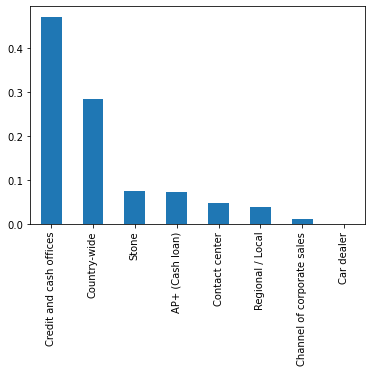

In [137]:
df_merge.CHANNEL_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

In [138]:
# Finding percentage of value counts in variable 'CONTRACT_STATUS'
df_merge.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Refused         0.913678
Unused offer    0.086322
Name: NAME_CONTRACT_STATUS, dtype: float64

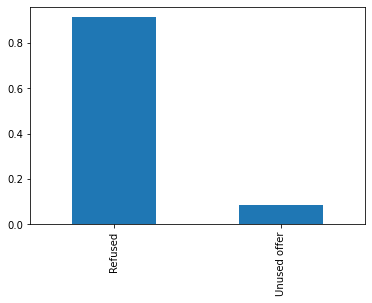

In [139]:
df_merge.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()

#### Multivariate Analysis eg :- education type vs contract status vs TARGET



In [140]:
df_merge.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    191329
Higher education                 59792 
Incomplete higher                9496  
Lower secondary                  3077  
Academic degree                  96    
Name: NAME_EDUCATION_TYPE, dtype: int64

In [141]:
df_merge.NAME_CONTRACT_STATUS.value_counts()

Refused         241019
Unused offer    22771 
Name: NAME_CONTRACT_STATUS, dtype: int64

In [142]:
df_merge.TARGET.value_counts()

0    232915
1    30875 
Name: TARGET, dtype: int64

In [143]:
#mean of TARGET variable is 11.7%
df_merge.TARGET.value_counts(normalize=True)

0    0.882956
1    0.117044
Name: TARGET, dtype: float64

In [144]:
#Note here the mean of 'TARGET' is nothing but the total percentage of people who have DEFAULTED in the loan uptill now
df_merge.TARGET.mean()

0.11704386064672656

In [145]:
res=pd.pivot_table(data=df_merge,index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_STATUS',values='TARGET')
res

NAME_CONTRACT_STATUS            Refused  Unused offer
NAME_EDUCATION_TYPE                                  
Academic degree                0.011111  0.500000    
Higher education               0.085635  0.066687    
Incomplete higher              0.116880  0.099695    
Lower secondary                0.141827  0.115152    
Secondary / secondary special  0.130601  0.087992

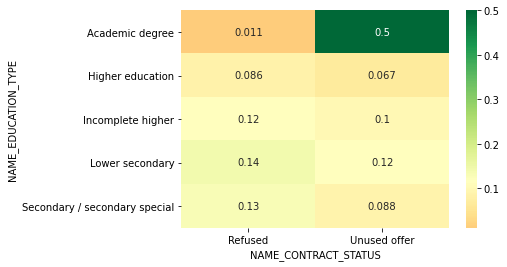

In [146]:
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Inference from above plot:
It can be seen that people who have not taken the loan in the previous appliation and with an academic degree are the ones defaulting on loan.

In [147]:
df_merge.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263790 entries, 13 to 1413698
Data columns (total 104 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE               object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  D

In [148]:
res=pd.pivot_table(data=df_merge,index='NAME_EDUCATION_TYPE',columns='OCCUPATION_TYPE',values='TARGET')
res

OCCUPATION_TYPE                Accountants  Cleaning staff  Cooking staff  \
NAME_EDUCATION_TYPE                                                         
Academic degree                0.571429     0.000000       NaN              
Higher education               0.078892     0.095436        0.109920        
Incomplete higher              0.080597     0.160714        0.123188        
Lower secondary                0.153846     0.231481        0.130435        
Secondary / secondary special  0.095861     0.117034        0.152811        

OCCUPATION_TYPE                Core staff   Drivers  HR staff  \
NAME_EDUCATION_TYPE                                             
Academic degree                0.000000   NaN       NaN         
Higher education               0.073430    0.105789  0.090196   
Incomplete higher              0.123881    0.180921  0.078947   
Lower secondary                0.105882    0.112150 NaN         
Secondary / secondary special  0.109047    0.165431  0.149351   

OCCUPATION_TYPE                High skill tech staff  IT staff  Laborers  \
NAME_EDUCATION_TYPE                                                        
Academic degree                0.000000              NaN        0.000000   
Higher education               0.064496               0.053254  0.116012   
Incomplete higher              0.110375               0.111111  0.130212   
Lower secondary                0.343750              NaN        0.186010   
Secondary / secondary special  0.102840               0.185185  0.154021   

OCCUPATION_TYPE                Low-skill Laborers  Managers  Medicine staff  \
NAME_EDUCATION_TYPE                                                           
Academic degree               NaN                  0.000000 NaN               
Higher education               0.327273            0.077395  0.094737         
Incomplete higher              0.166667            0.100664  0.023256         
Lower secondary                0.300971            0.000000  0.230769         
Secondary / secondary special  0.240424            0.122954  0.109079         

OCCUPATION_TYPE                Private service staff  Realty agents  \
NAME_EDUCATION_TYPE                                                   
Academic degree                0.000000              NaN              
Higher education               0.039080               0.013245        
Incomplete higher              0.042105               0.229167        
Lower secondary                0.000000               0.000000        
Secondary / secondary special  0.077465               0.201327        

OCCUPATION_TYPE                Sales staff  Secretaries  Security staff  \
NAME_EDUCATION_TYPE                                                       
Academic degree                0.000000    NaN           0.000000         
Higher education               0.099169     0.119534     0.130827         
Incomplete higher              0.126628     0.046154     0.148936         
Lower secondary                0.147541     0.000000     0.175824         
Secondary / secondary special  0.129573     0.134981     0.172462         

OCCUPATION_TYPE                Waiters/barmen staff  
NAME_EDUCATION_TYPE                                  
Academic degree               NaN                    
Higher education               0.133803              
Incomplete higher              0.028986              
Lower secondary                0.000000              
Secondary / secondary special  0.146288

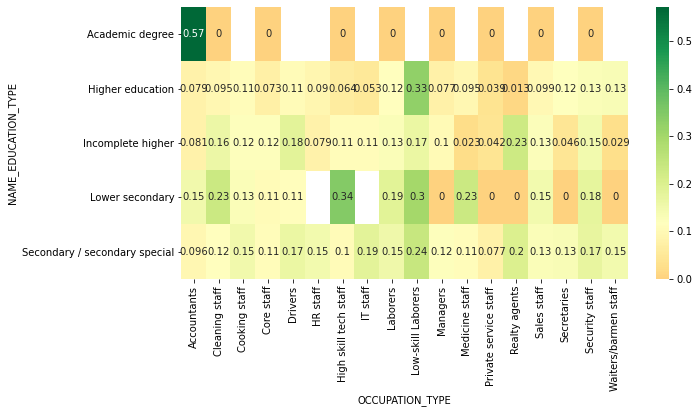

In [149]:
plt.figure(figsize=[10,5])
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Inference from above plot:
Can see that Accountants will Academic degree are the highest people who have defaulted, 
Next High skill tech staff with lower secondary Education have defaulted

In [150]:
res=pd.pivot_table(data=df_merge,index='NAME_INCOME_TYPE',columns='OCCUPATION_TYPE',values='TARGET')
res

OCCUPATION_TYPE       Accountants  Cleaning staff  Cooking staff  Core staff  \
NAME_INCOME_TYPE                                                               
Commercial associate  0.086271     0.099567        0.132611       0.077645     
Maternity leave      NaN          NaN             NaN            NaN           
Pensioner            NaN           0.000000       NaN            NaN           
State servant         0.037445     0.068000        0.138095       0.069175     
Working               0.091115     0.128190        0.155181       0.111521     

OCCUPATION_TYPE        Drivers  HR staff  High skill tech staff  IT staff  \
NAME_INCOME_TYPE                                                            
Commercial associate  0.135400  0.078652  0.084707               0.088889   
Maternity leave      NaN       NaN       NaN                    NaN         
Pensioner            NaN       NaN       NaN                    NaN         
State servant         0.093645  0.045455  0.074124               0.250000   
Working               0.170535  0.146667  0.095055               0.073171   

OCCUPATION_TYPE       Laborers  Low-skill Laborers  Managers  Medicine staff  \
NAME_INCOME_TYPE                                                               
Commercial associate  0.126285  0.263844            0.098561  0.078224         
Maternity leave       1.000000 NaN                 NaN       NaN               
Pensioner             0.000000 NaN                 NaN        0.000000         
State servant         0.114441  0.250000            0.074617  0.110325         
Working               0.157835  0.241977            0.103136  0.111465         

OCCUPATION_TYPE       Private service staff  Realty agents  Sales staff  \
NAME_INCOME_TYPE                                                          
Commercial associate  0.037080               0.067416       0.118289      
Maternity leave      NaN                    NaN            NaN            
Pensioner            NaN                    NaN             0.000000      
State servant         0.347826               0.000000       0.038095      
Working               0.083333               0.225722       0.128040      

OCCUPATION_TYPE       Secretaries  Security staff  Waiters/barmen staff  
NAME_INCOME_TYPE                                                         
Commercial associate  0.109375     0.137981        0.139535              
Maternity leave      NaN          NaN             NaN                    
Pensioner            NaN          NaN             NaN                    
State servant         0.113514     0.074434        0.120000              
Working               0.133333     0.183208        0.135065

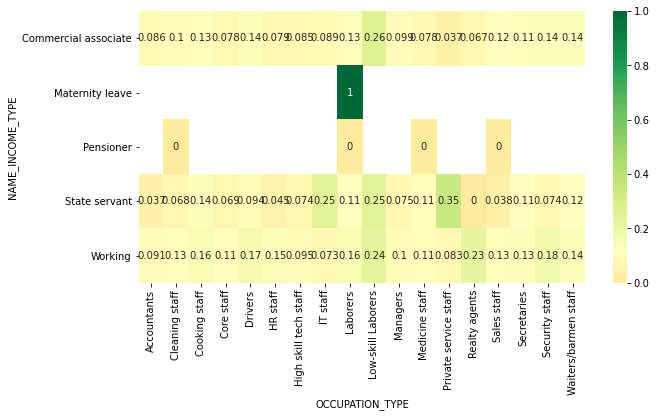

In [151]:
plt.figure(figsize=[10,5])
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Inference from above plot:
Very much evident that 'Labourers' who are not working and on maternity leave have defaulted

In [152]:
res=pd.pivot_table(data=df_merge,index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',values='TARGET')
res

CODE_GENDER                           F         M  XNA
NAME_EDUCATION_TYPE                                   
Academic degree                0.075472  0.000000 NaN 
Higher education               0.078884  0.092850  0.0
Incomplete higher              0.118158  0.111220  0.0
Lower secondary                0.113707  0.185056 NaN 
Secondary / secondary special  0.111931  0.157738  0.0

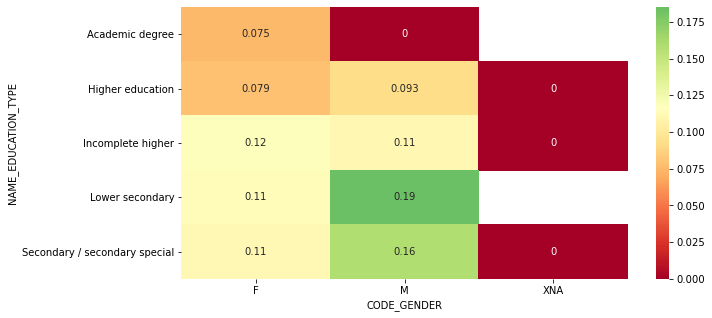

In [153]:
plt.figure(figsize=[10,5])
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Inference from above plot:
Very much evident that 'Males' with Lower Secondary and Secondary/Secondary Special Education types have defaulted

#### The Analysis can further proceed given there is enough time! :)  Thank you!

In [154]:
print("hi")

hi


#### Project Complete
- This Project is done by `Achal Kagwad`
- Contact no: +91-9108302174
- Email Id: achal.kagwad@gmail.com
- Linked in: https://www.linkedin.com/in/achalkagwad/

---